# Projet Séminaire Modélisation Statistique

Importations nécessaires:

In [1]:
library(readr)
library(readxl)
library(tidyr)
library(dplyr)
library(stringr)
library(purrr)
library(chron)

Warning message:
"le package 'readr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.1.3"

Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"le package 'chron' a été compilé avec la version R 4.1.3"


In [2]:
#Set directory
setwd("C:/Users/Pauline/Documents/Github/Seminaire-Modelisation-Stat/Data")

### Ouverture et nettoyage des données

In [3]:
data_test <- read.csv("data_test.csv")
data_train <- read.csv("data_train.csv")
benchmark <- read.csv("benchmark.csv")

In [4]:
#Drop NAs
data_test <- data_test %>% drop_na()
data_train <- data_train %>% drop_na()
benchmark <- benchmark %>% drop_na()

On crée une colonne pour l'année, le mois, le jour, le jour de la semaine et l'heure.

In [5]:
data_train = data_train %>% 
            separate(DateTime, c("Date", "Time"), sep = " ", remove = TRUE) %>% 
            separate(Date, c("Year", "Month", "Day"), sep = "-", remove = FALSE)

data_test = data_test %>% 
            separate(DateTime, c("Date", "Time"), sep = " ", remove = TRUE) %>% 
            separate(Date, c("Year", "Month", "Day"), sep = "-", remove = FALSE)

benchmark = benchmark %>% 
            separate(DateTime, c("Date", "Time"), sep = " ", remove = TRUE) %>% 
            separate(Date, c("Year", "Month", "Day"), sep = "-", remove = FALSE)

In [6]:
data_train$Date = as.Date(data_train$Date, format = "%Y-%m-%d")
data_train["Weekday"] =  weekdays(data_train$Date)

data_test$Date = as.Date(data_test$Date, format = "%Y-%m-%d")
data_test["Weekday"] =  weekdays(data_test$Date)

benchmark$Date = as.Date(benchmark$Date, format = "%Y-%m-%d")
benchmark["Weekday"] =  weekdays(benchmark$Date)

##### Ajout jour férié

In [7]:
jours_feries <- read.csv("jours_feries_metropole.csv")

In [8]:
jours_feries$date = as.Date(jours_feries$date, format = "%Y-%m-%d")
jours_feries = jours_feries %>%
    filter(format(date, format = "%Y") > 2011) %>%
    select (-zone,-annee)

In [9]:
jours_feries = rename(jours_feries,Date=date)

In [10]:
data_train = left_join(data_train,jours_feries)

data_test = left_join(data_test,jours_feries)

benchmark = left_join(benchmark,jours_feries)

Joining, by = "Date"
Joining, by = "Date"
Joining, by = "Date"


In [11]:
data_train$nom_jour_ferie[is.character(data_train$nom_jour_ferie) & is.na(data_train$nom_jour_ferie)] = 0
data_train = rename(data_train, jour_ferie = nom_jour_ferie)

data_test$nom_jour_ferie[is.character(data_test$nom_jour_ferie) & is.na(data_test$nom_jour_ferie)] = 0
data_test = rename(data_test, jour_ferie = nom_jour_ferie)

benchmark$nom_jour_ferie[is.character(benchmark$nom_jour_ferie) & is.na(benchmark$nom_jour_ferie)] = 0
benchmark = rename(benchmark, jour_ferie = nom_jour_ferie)

##### Ajout vacances scolaires

In [202]:
holidays <- read.csv("data_holidays.csv")

In [203]:
holidays$date = as.Date(holidays$date, format = "%Y-%m-%d")
holidays = holidays %>%
    filter(format(date, format = "%Y") > 2011) %>%
    select (-nom_vacances)

In [204]:
holidays = rename(holidays,Date=date)
holidays = rename(holidays,Holidays_A=vacances_zone_a)
holidays = rename(holidays,Holidays_B=vacances_zone_b)
holidays = rename(holidays,Holidays_C=vacances_zone_c)

In [205]:
data_train = left_join(data_train,holidays,"Date")

data_test = left_join(data_test,holidays,"Date")

benchmark = left_join(benchmark,holidays,"Date")

In [206]:
data_train$Holidays_A <- as.integer(as.logical(data_train$Holidays_A))
data_train$Holidays_B <- as.integer(as.logical(data_train$Holidays_B))
data_train$Holidays_C <- as.integer(as.logical(data_train$Holidays_C))

data_test$Holidays_A <- as.integer(as.logical(data_test$Holidays_A))
data_test$Holidays_B <- as.integer(as.logical(data_test$Holidays_B))
data_test$Holidays_C <- as.integer(as.logical(data_test$Holidays_C))

benchmark$Holidays_A <- as.integer(as.logical(benchmark$Holidays_A))
benchmark$Holidays_B <- as.integer(as.logical(benchmark$Holidays_B))
benchmark$Holidays_C <- as.integer(as.logical(benchmark$Holidays_C))

In [207]:
data_train$Holidays <- 0
data_train$Holidays[data_train$Holidays_A==1 | data_train$Holidays_B==1 | data_train$Holidays_B==1] <- 1

data_test$Holidays <- 0
data_test$Holidays[data_test$Holidays_A==1 | data_test$Holidays_B==1 | data_test$Holidays_B==1] <- 1

benchmark$Holidays <- 0
benchmark$Holidays[benchmark$Holidays_A==1 | benchmark$Holidays_B==1 | benchmark$Holidays_B==1] <- 1

In [18]:
#Check
data_train
data_test
benchmark

Date,Year,Month,Day,Time,Consumption,Temperature,Nebulosity,Humidity,Weekday,jour_ferie,Holidays_A,Holidays_B,Holidays_C,Holidays
<date>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
2012-01-01,2012,01,01,00:00:00,58315,13.443860,87.50000,87.64912,dimanche,1er janvier,1,1,1,1
2012-01-01,2012,01,01,03:00:00,52496,13.370175,76.35135,88.26786,dimanche,1er janvier,1,1,1,1
2012-01-01,2012,01,01,06:00:00,45827,13.743103,78.10638,88.19298,dimanche,1er janvier,1,1,1,1
2012-01-01,2012,01,01,09:00:00,45730,13.669643,81.27660,87.80000,dimanche,1er janvier,1,1,1,1
2012-01-01,2012,01,01,12:00:00,50975,15.675439,80.00000,81.67857,dimanche,1er janvier,1,1,1,1
2012-01-01,2012,01,01,15:00:00,49148,15.442857,83.37209,80.67857,dimanche,1er janvier,1,1,1,1
2012-01-01,2012,01,01,18:00:00,54425,13.592727,86.32353,85.25455,dimanche,1er janvier,1,1,1,1
2012-01-01,2012,01,01,21:00:00,56054,12.868421,88.63636,87.61404,dimanche,1er janvier,1,1,1,1
2012-01-02,2012,01,02,00:00:00,55164,11.869091,87.61290,88.10909,lundi,0,1,1,1,1


Date,Year,Month,Day,Time,Temperature,Nebulosity,Humidity,Weekday,jour_ferie,Holidays_A,Holidays_B,Holidays_C,Holidays
<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
2021-11-01,2021,11,01,00:00:00,14.87018,90.89286,86.57895,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,03:00:00,14.10833,91.33333,88.01667,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,06:00:00,13.86949,97.00000,87.74576,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,09:00:00,14.78983,88.22581,83.57627,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,12:00:00,16.45763,91.55172,72.67797,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,15:00:00,16.09831,86.20000,72.33898,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,18:00:00,13.85690,85.22222,80.24138,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,21:00:00,13.02542,85.43478,83.06780,lundi,Toussaint,1,1,1,1
2021-11-02,2021,11,02,00:00:00,12.78833,90.92857,84.75000,mardi,0,1,1,1,1


Date,Year,Month,Day,Time,Consumption,Weekday,jour_ferie,Holidays_A,Holidays_B,Holidays_C,Holidays
<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
2021-11-01,2021,11,01,00:00:00,53512.07,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,00:30:00,51018.66,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,01:00:00,48142.49,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,01:30:00,47526.87,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,02:00:00,46981.54,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,02:30:00,46584.09,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,03:00:00,45199.19,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,03:30:00,44469.71,lundi,Toussaint,1,1,1,1
2021-11-01,2021,11,01,04:00:00,43840.57,lundi,Toussaint,1,1,1,1


### Statistiques Descriptives

In [16]:
library(ggplot2)
library(ggthemes)
library(repr)

Warning message:
"le package 'repr' a été compilé avec la version R 4.1.3"


In [20]:
summary(data_train)

      Date                Year              Month               Day           
 Min.   :2012-01-01   Length:26286       Length:26286       Length:26286      
 1st Qu.:2014-04-01   Class :character   Class :character   Class :character  
 Median :2016-06-30   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2016-07-01                                                           
 3rd Qu.:2018-10-01                                                           
 Max.   :2020-12-31                                                           
     Time            Consumption     Temperature       Nebulosity     
 Length:26286       Min.   :29482   Min.   :-0.366   Min.   :  7.667  
 Class :character   1st Qu.:44984   1st Qu.:11.207   1st Qu.: 68.000  
 Mode  :character   Median :52366   Median :14.523   Median : 80.588  
                    Mean   :54075   Mean   :14.876   Mean   : 76.117  
                    3rd Qu.:62286   3rd Qu.:18.203   3rd Qu.: 88.409  
                    M

##### Etude de la Température

`geom_smooth()` using formula 'y ~ x'



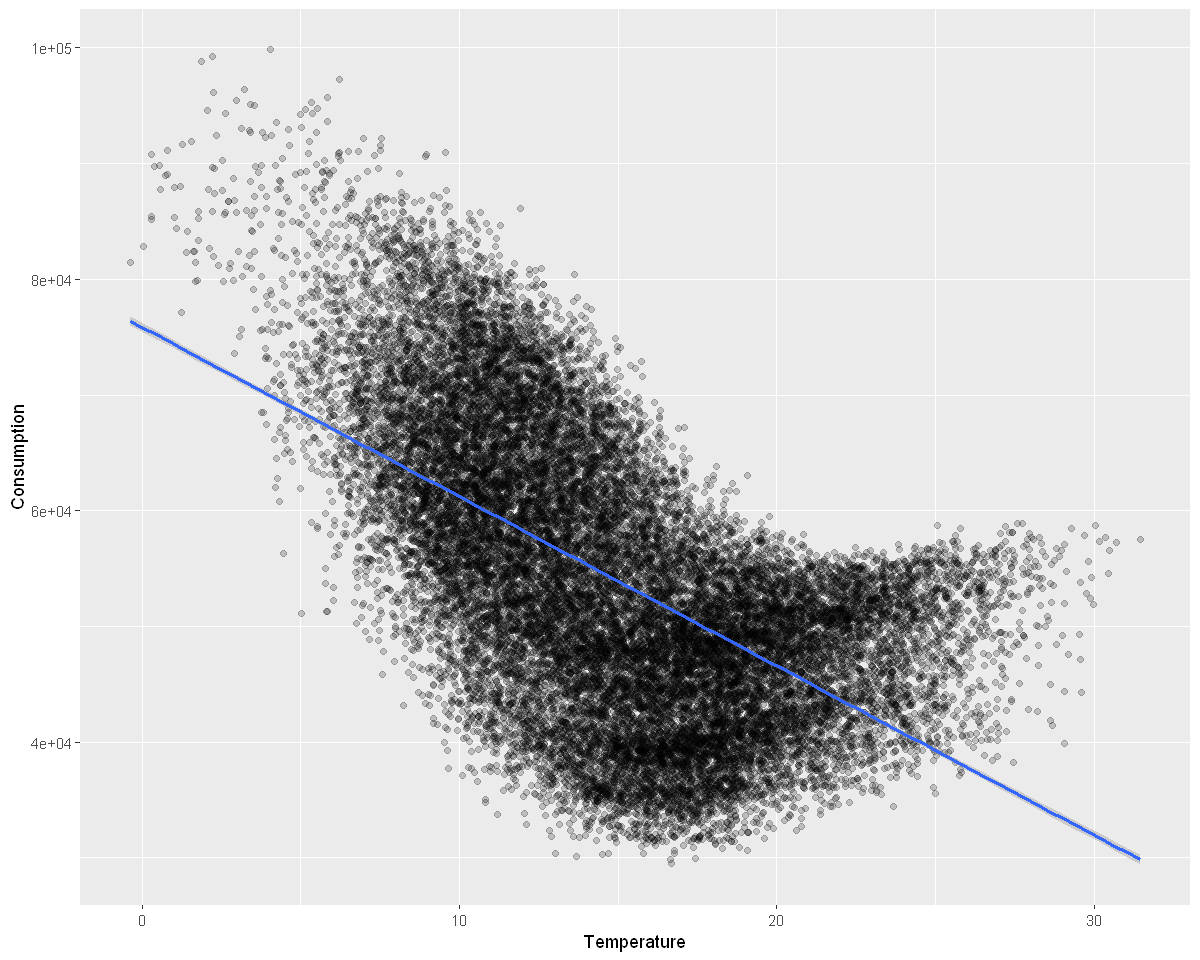

In [132]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data_train, aes(x = Temperature, y = Consumption)) +geom_point(alpha = 0.2) + geom_smooth(method = "lm")
#Corrélation clairement négative entre la Température et la Consommation

In [133]:
#Normalisation des données
data_train$Temperature_normalized <- (data_train$Temperature - mean(data_train$Temperature)) / sd(data_train$Temperature)
data_train$Consumption_normalized <- (data_train$Consumption - mean(data_train$Consumption)) / sd(data_train$Consumption)
data_train$Nebulosity_normalized <- (data_train$Nebulosity - mean(data_train$Nebulosity)) / sd(data_train$Nebulosity)
data_train$Humidity_normalized <- (data_train$Humidity - mean(data_train$Humidity)) / sd(data_train$Humidity)

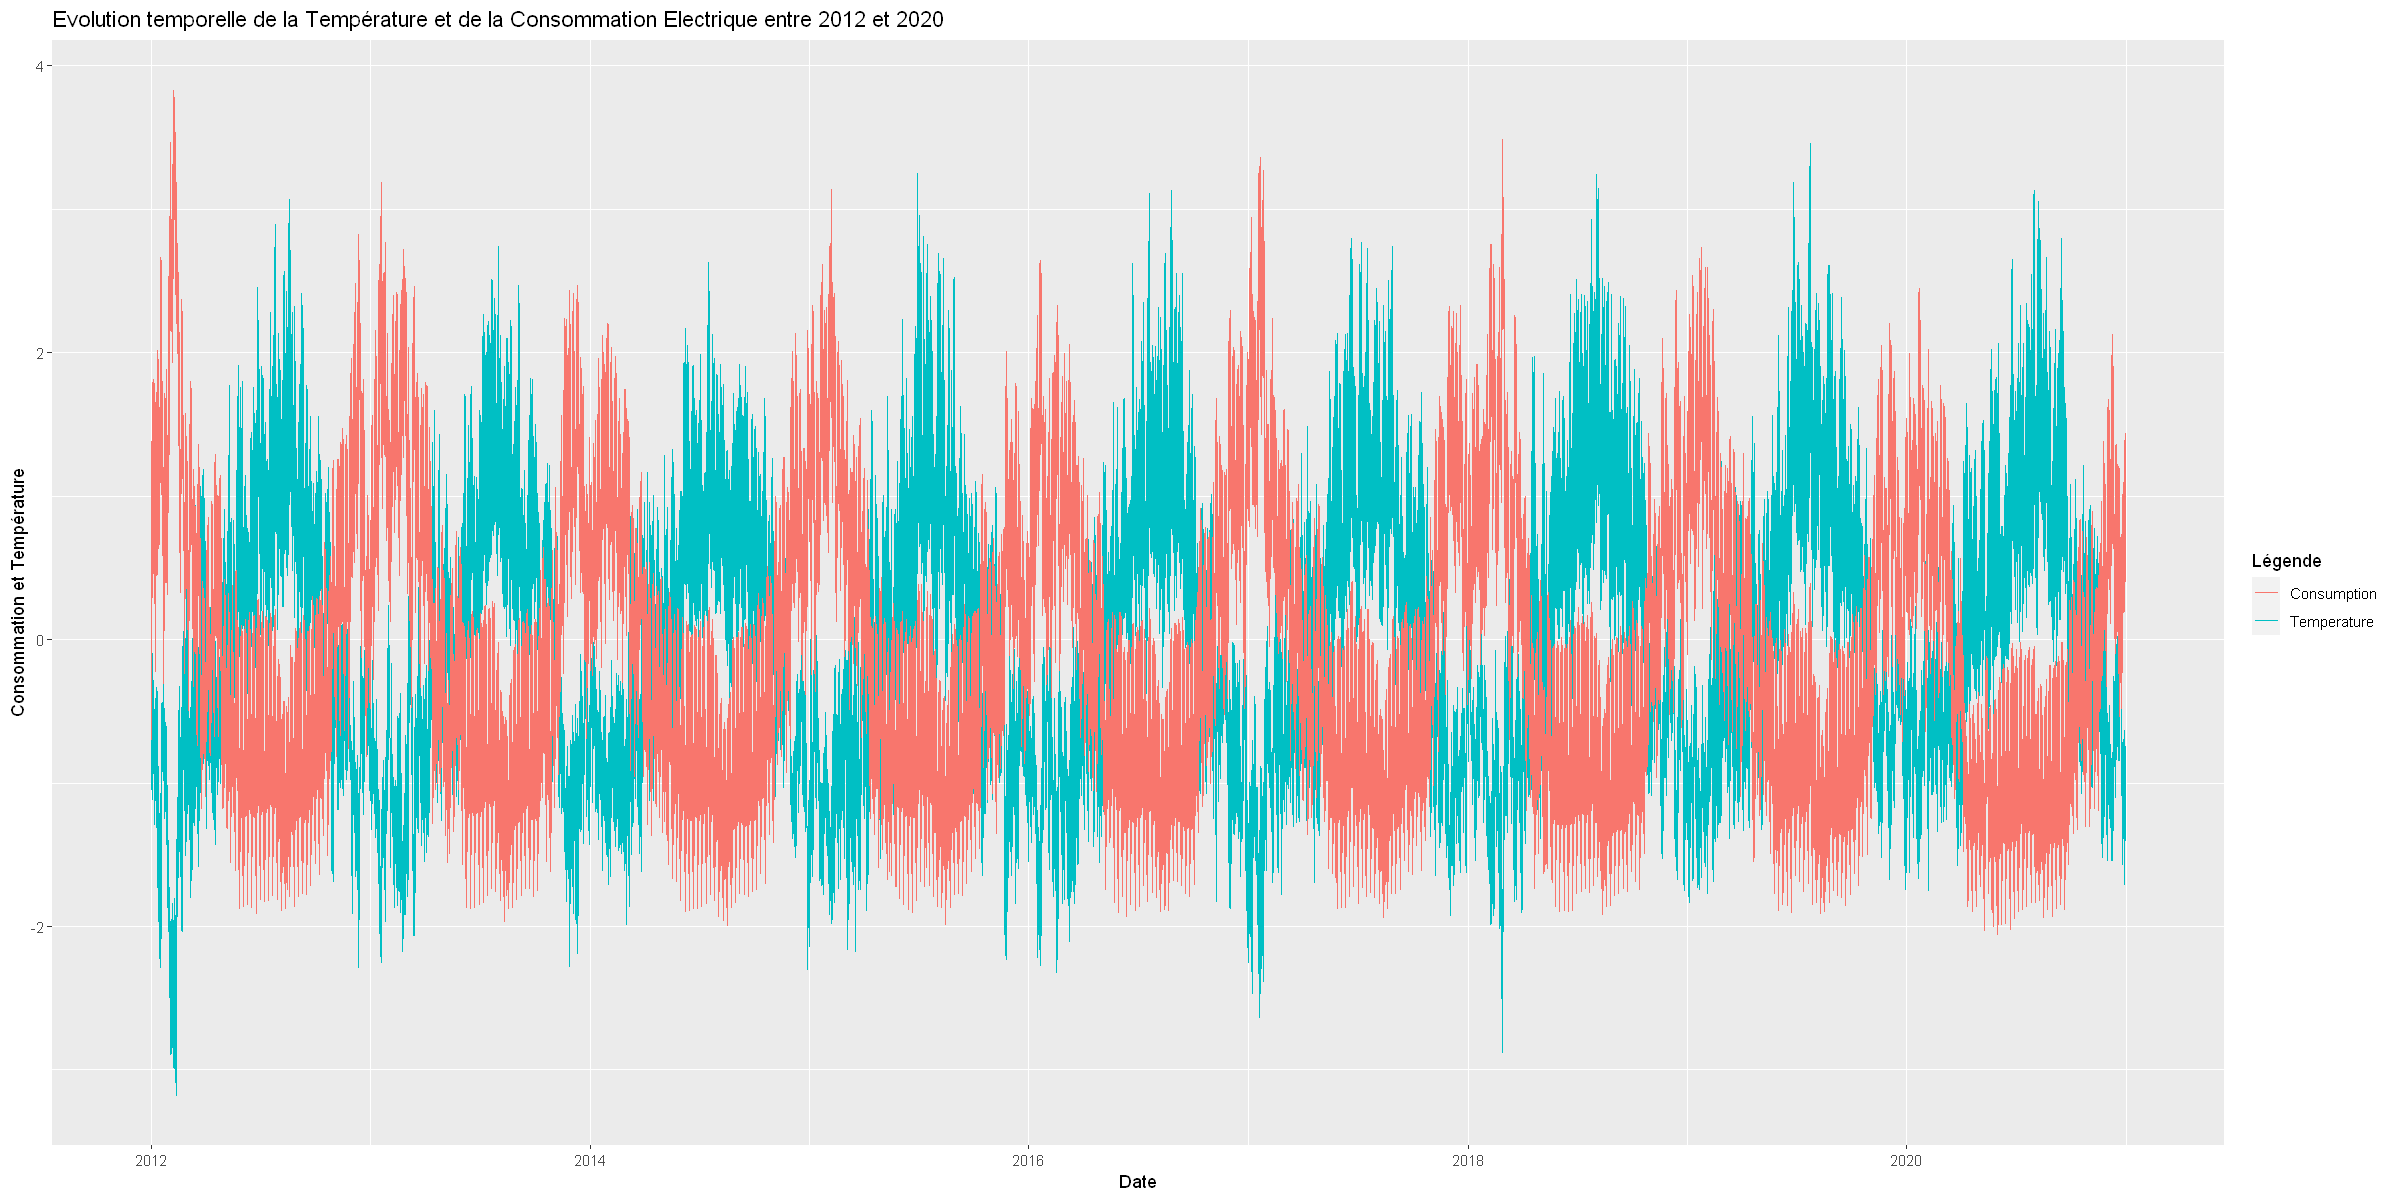

In [134]:
#Etude de l'évolution temporelle Température-Consommation entre 2012 et 2020
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train, aes(x=Date, y=Temperature_normalized, group = 1, color = 'Temperature')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consumption')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle de la Température et de la Consommation Electrique entre 2012 et 2020") +
    ylab("Consommation et Température")

In [26]:
#Etude sur une année en particulier
data_train_2012 <- subset(data_train, Year == 2012)

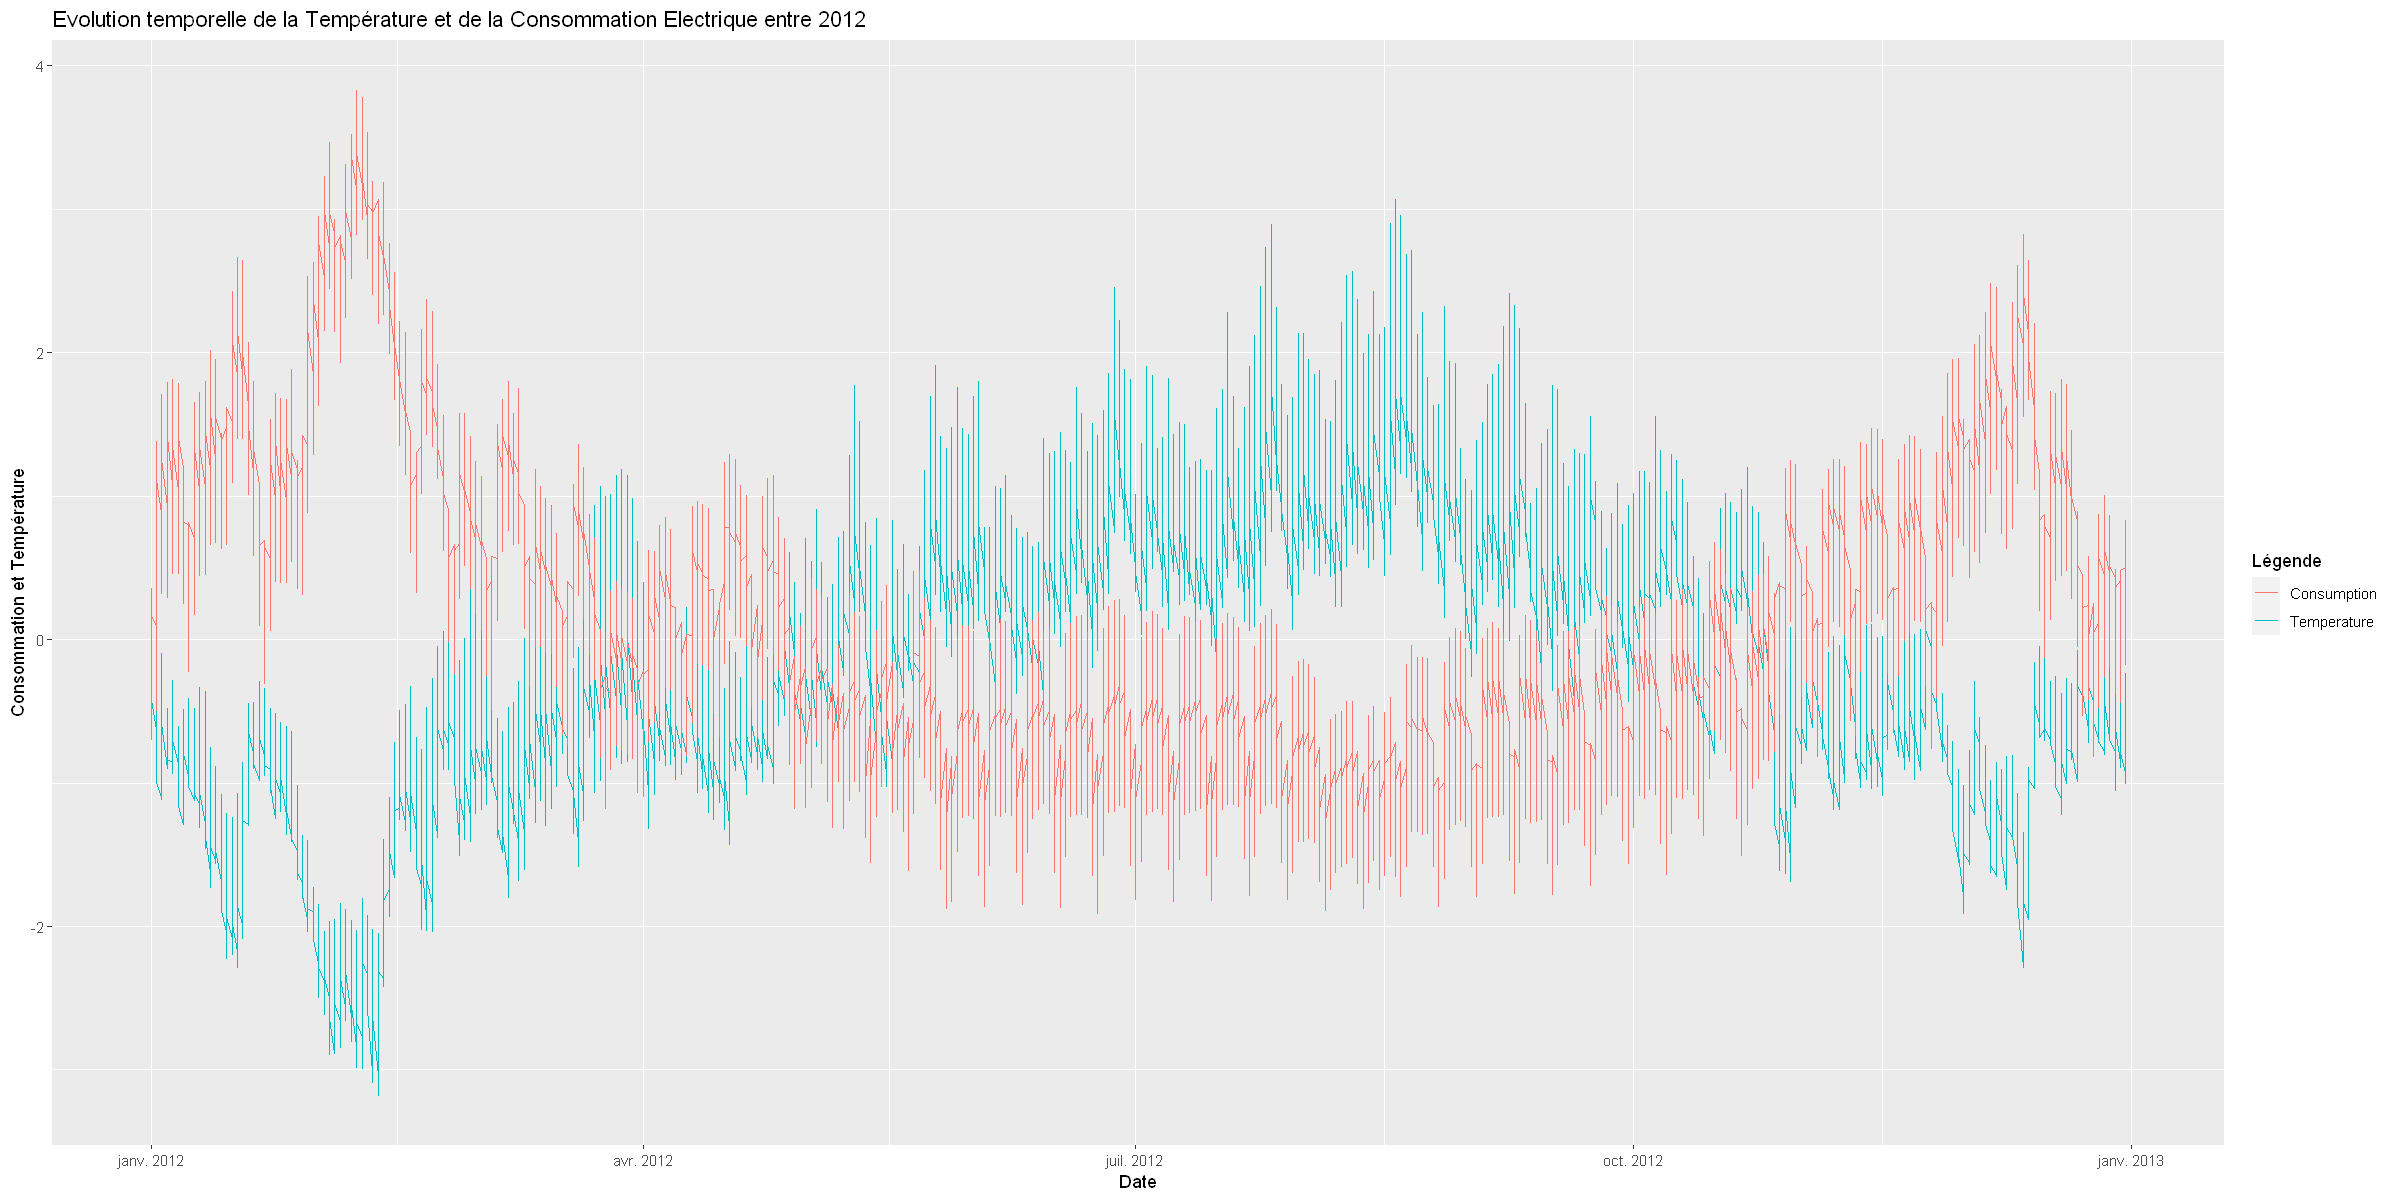

In [27]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_2012, aes(x=Date, y=Temperature_normalized, group = 1, color = 'Temperature')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consumption')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle de la Température et de la Consommation Electrique entre 2012") +
    ylab("Consommation et Température")

In [214]:
#Construction d'une base annuelle "type": moyenne de la consommation à chaque période observée sur 9 ans
data_train_type <- data_train %>%
   group_by(Month, Day, Time) %>% 
   summarise_at(vars("Consumption", "Temperature", "Nebulosity", "Humidity"), mean)

In [215]:
data_train_type$Date = paste(data_train_type$Month, data_train_type$Day, sep="-")
data_train_type$Date = as.Date(data_train_type$Date, format = "%m-%d")
data_train_type <- data_train_type %>% select(Date, everything())
data_train_type <- data_train_type %>% drop_na()

In [30]:
data_train_type$Temperature_normalized <- (data_train_type$Temperature - mean(data_train_type$Temperature)) / sd(data_train_type$Temperature)
data_train_type$Consumption_normalized <- (data_train_type$Consumption - mean(data_train_type$Consumption)) / sd(data_train_type$Consumption)
data_train_type$Nebulosity_normalized <- (data_train_type$Nebulosity - mean(data_train_type$Nebulosity)) / sd(data_train_type$Nebulosity)
data_train_type$Humidity_normalized <- (data_train_type$Humidity - mean(data_train_type$Humidity)) / sd(data_train_type$Humidity)

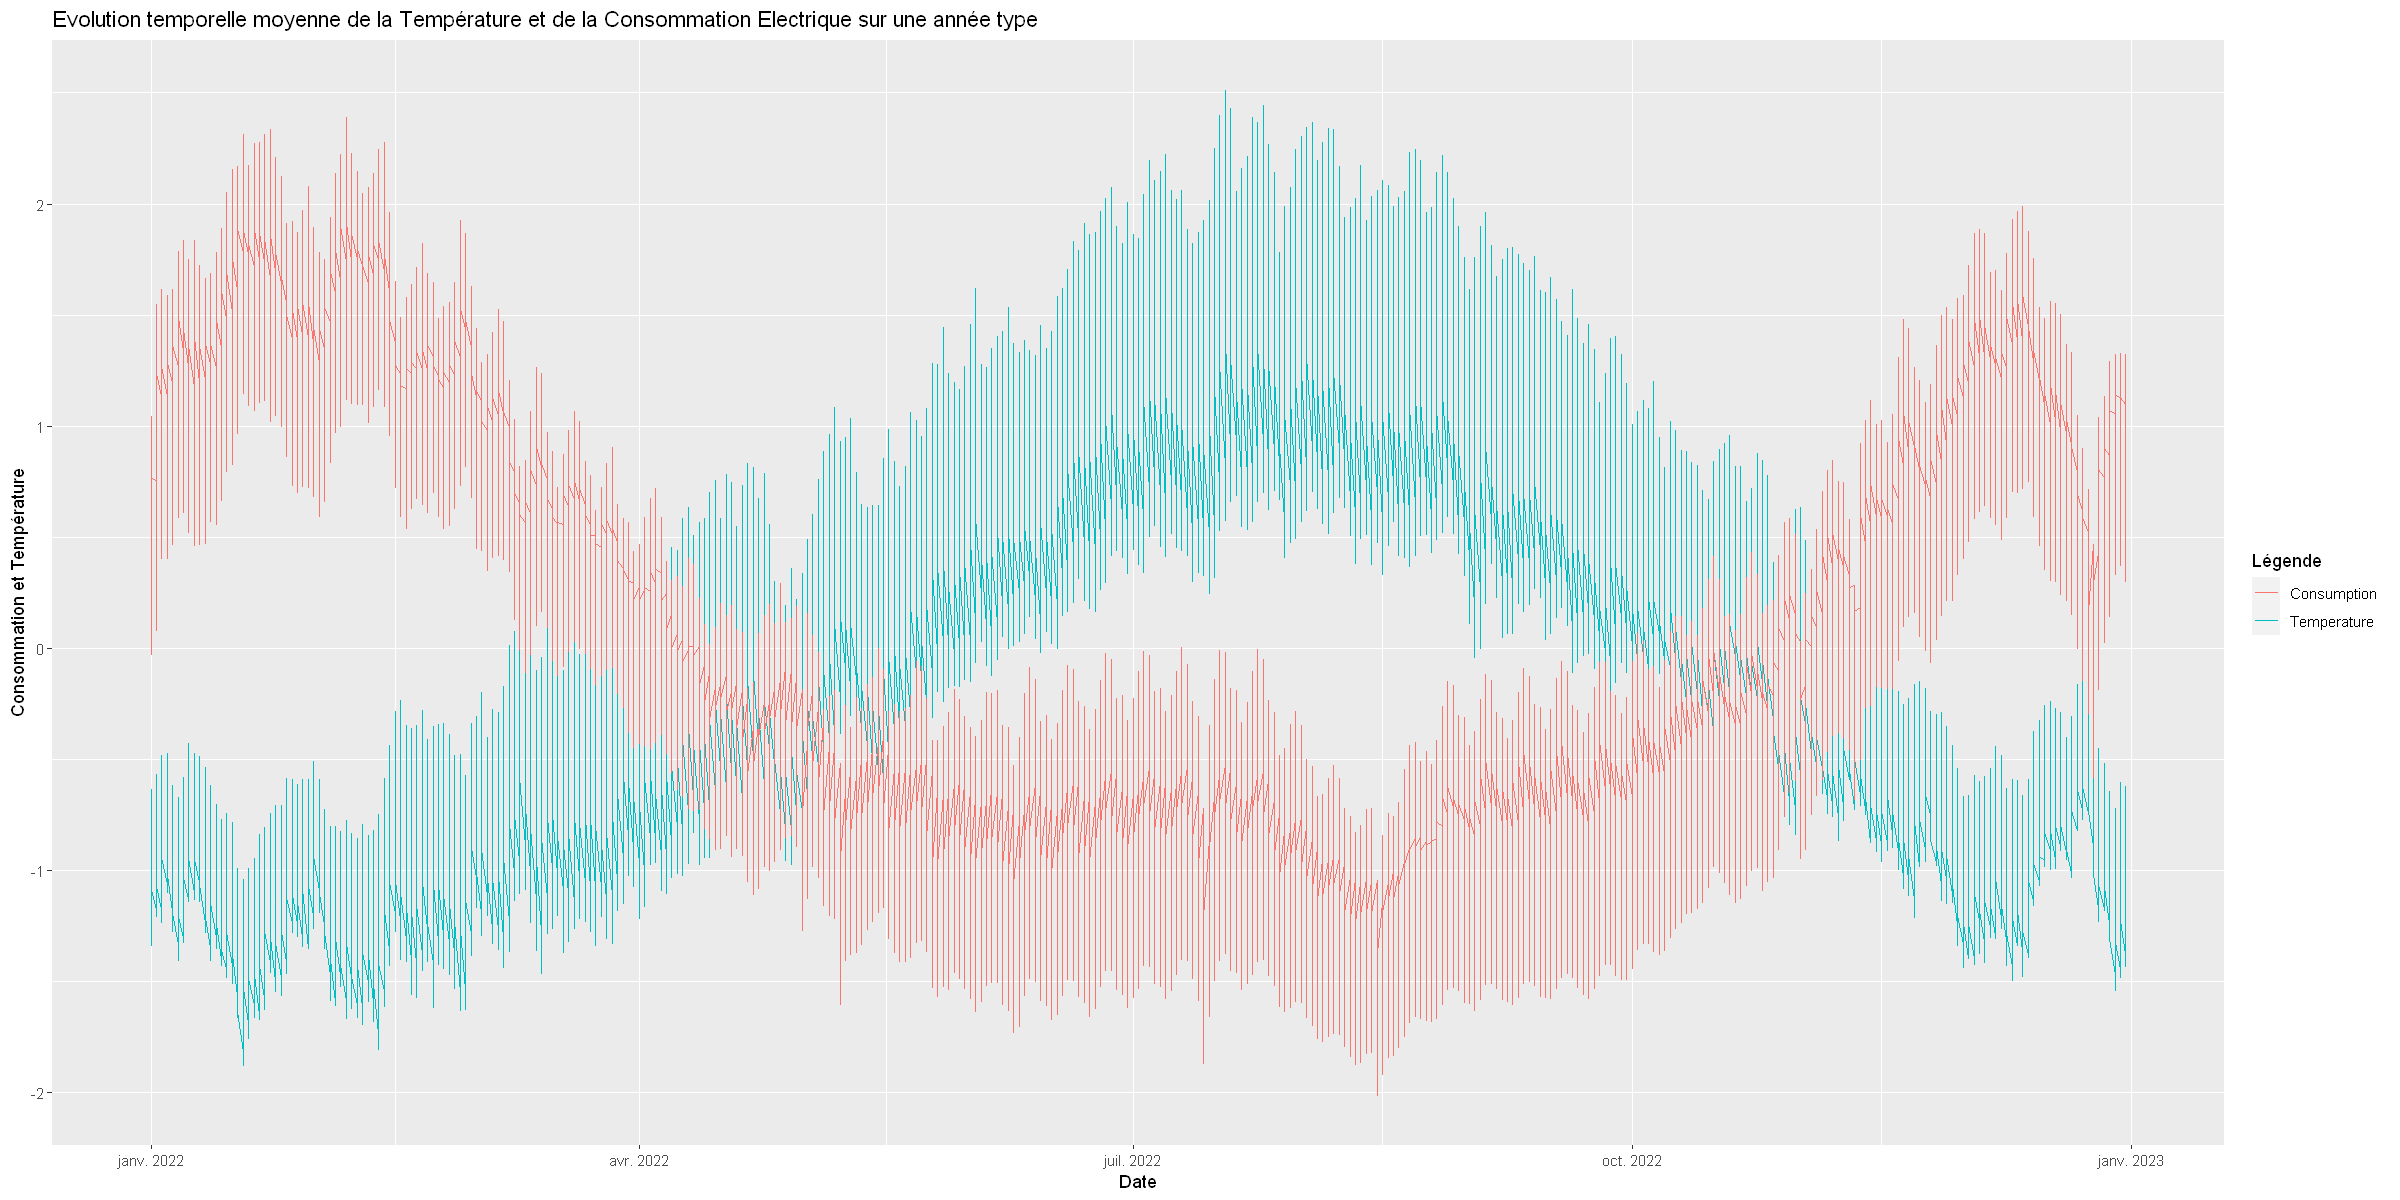

In [31]:
#Etude sur une année "type"
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_type, aes(x=Date, y=Temperature_normalized, group = 1, color = 'Temperature')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consumption')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle moyenne de la Température et de la Consommation Electrique sur une année type") +
    ylab("Consommation et Température")

In [216]:
#Aggrégation par jour pour avoir un graphique plus "aéré" (sans Time)
data_train_type_notime <- data_train_type %>%
   group_by(Date) %>% 
   summarise_at(vars("Consumption", "Temperature", "Nebulosity", "Humidity"), mean)

In [33]:
data_train_type_notime$Temperature_normalized <- (data_train_type_notime$Temperature - mean(data_train_type_notime$Temperature)) / sd(data_train_type_notime$Temperature)
data_train_type_notime$Consumption_normalized <- (data_train_type_notime$Consumption - mean(data_train_type_notime$Consumption)) / sd(data_train_type_notime$Consumption)
data_train_type_notime$Nebulosity_normalized <- (data_train_type_notime$Nebulosity - mean(data_train_type_notime$Nebulosity)) / sd(data_train_type_notime$Nebulosity)
data_train_type_notime$Humidity_normalized <- (data_train_type_notime$Humidity - mean(data_train_type_notime$Humidity)) / sd(data_train_type_notime$Humidity)

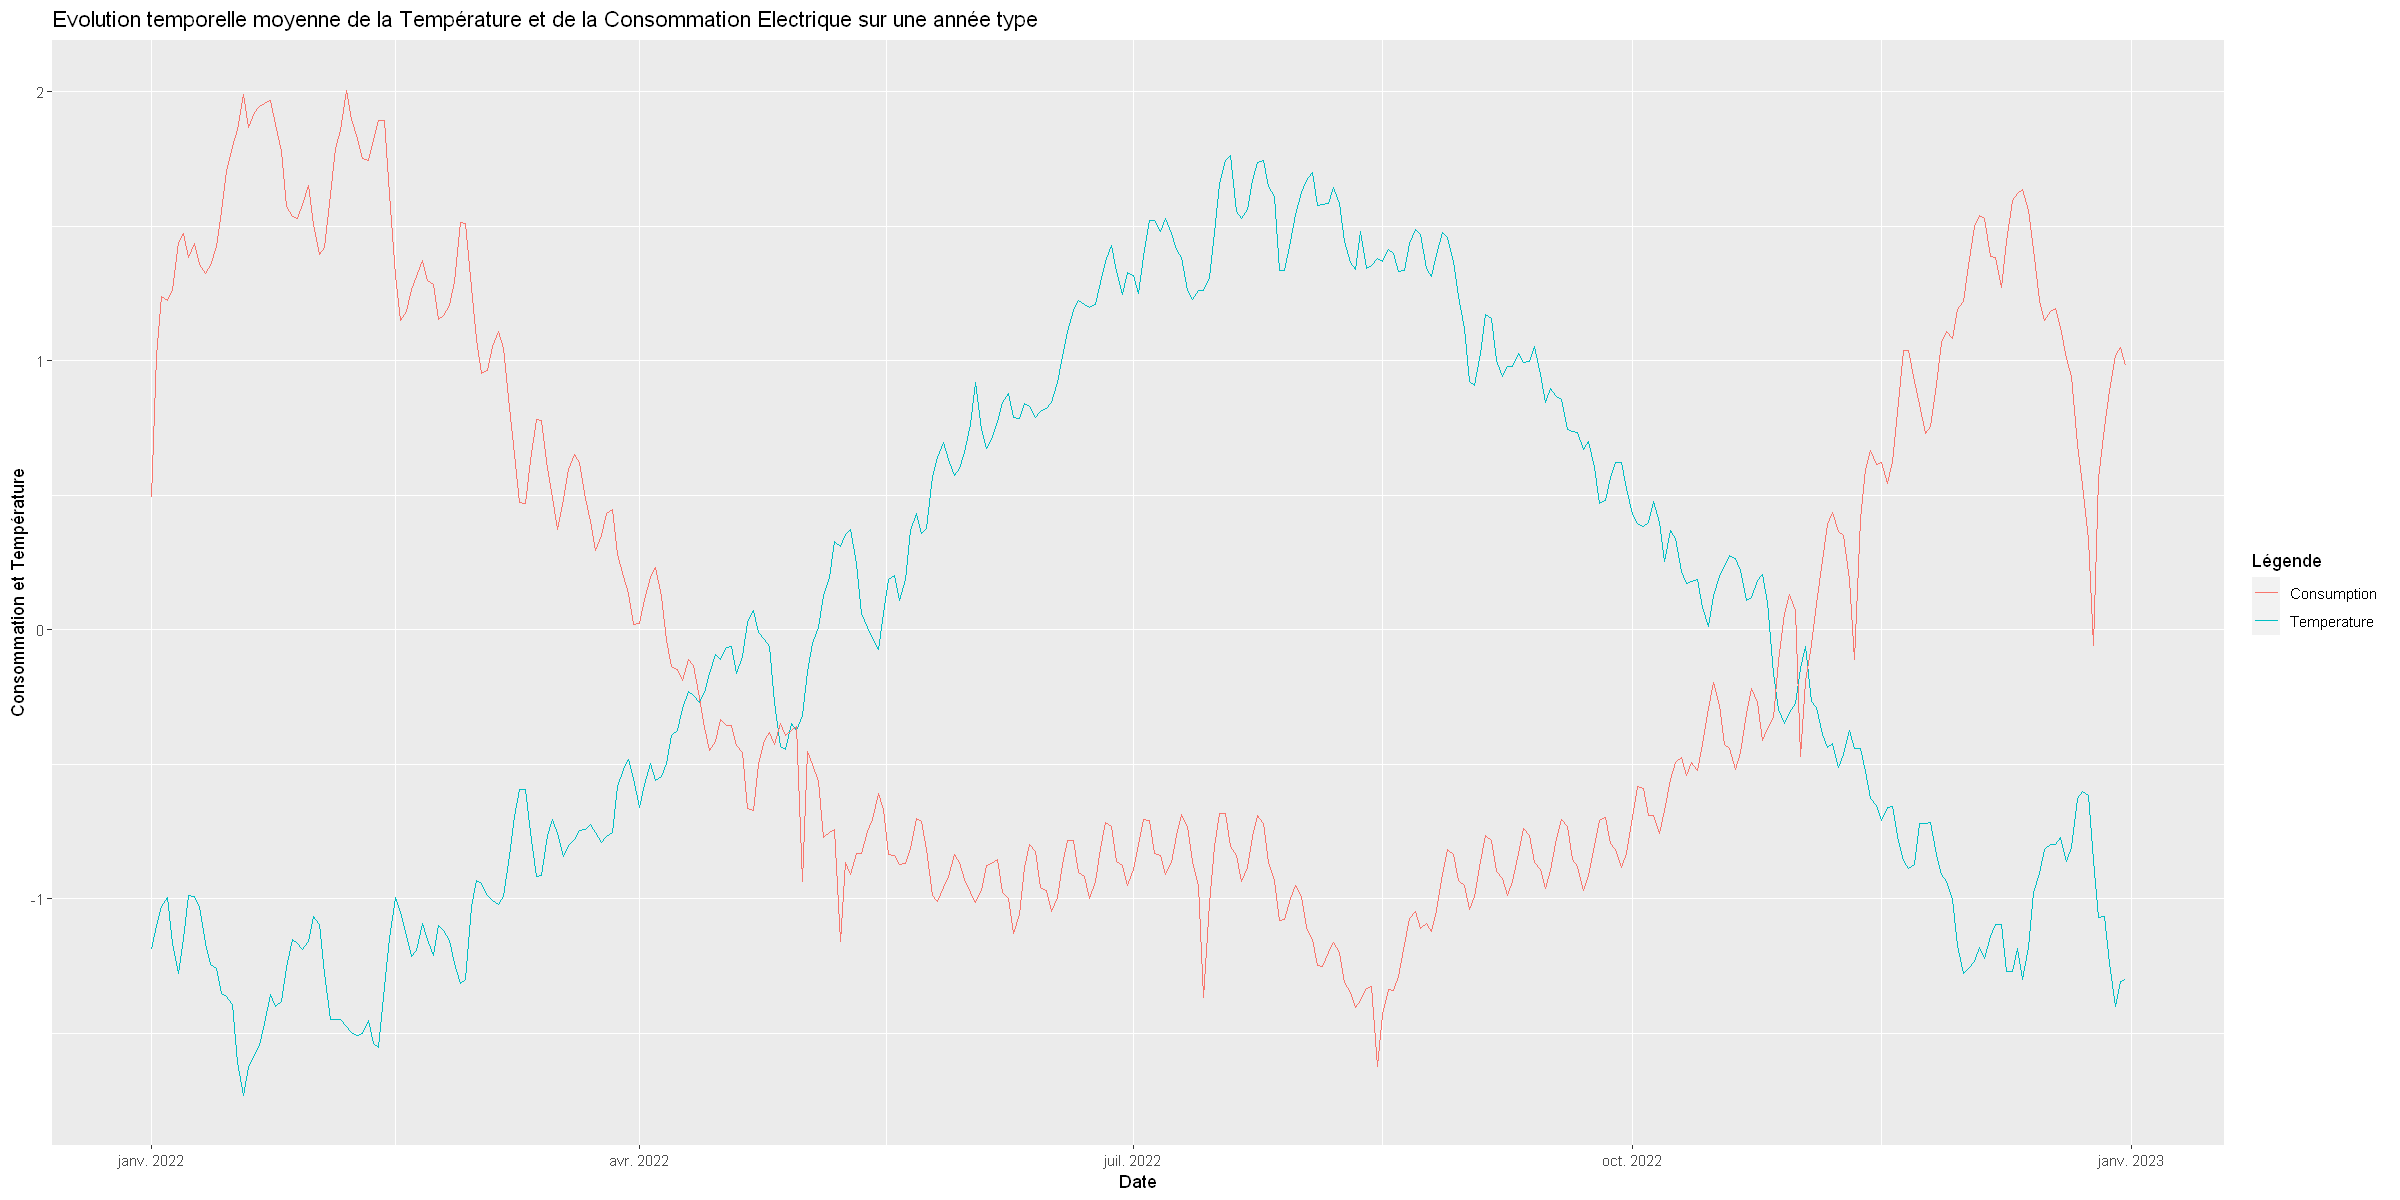

In [34]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_type_notime, aes(x=Date, y=Temperature_normalized, group = 1, color = 'Temperature')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consumption')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle moyenne de la Température et de la Consommation Electrique sur une année type") +
    ylab("Consommation et Température")

Nous constatons clairement à travers notre corrélogramme et nos différents graphiques, que la corrélation entre la température et la consommation électrique est négative. Ces 2 variables ont une évolution temporelle antagoniste sur l'année.

##### Etude de la Nébulosité 

`geom_smooth()` using formula 'y ~ x'



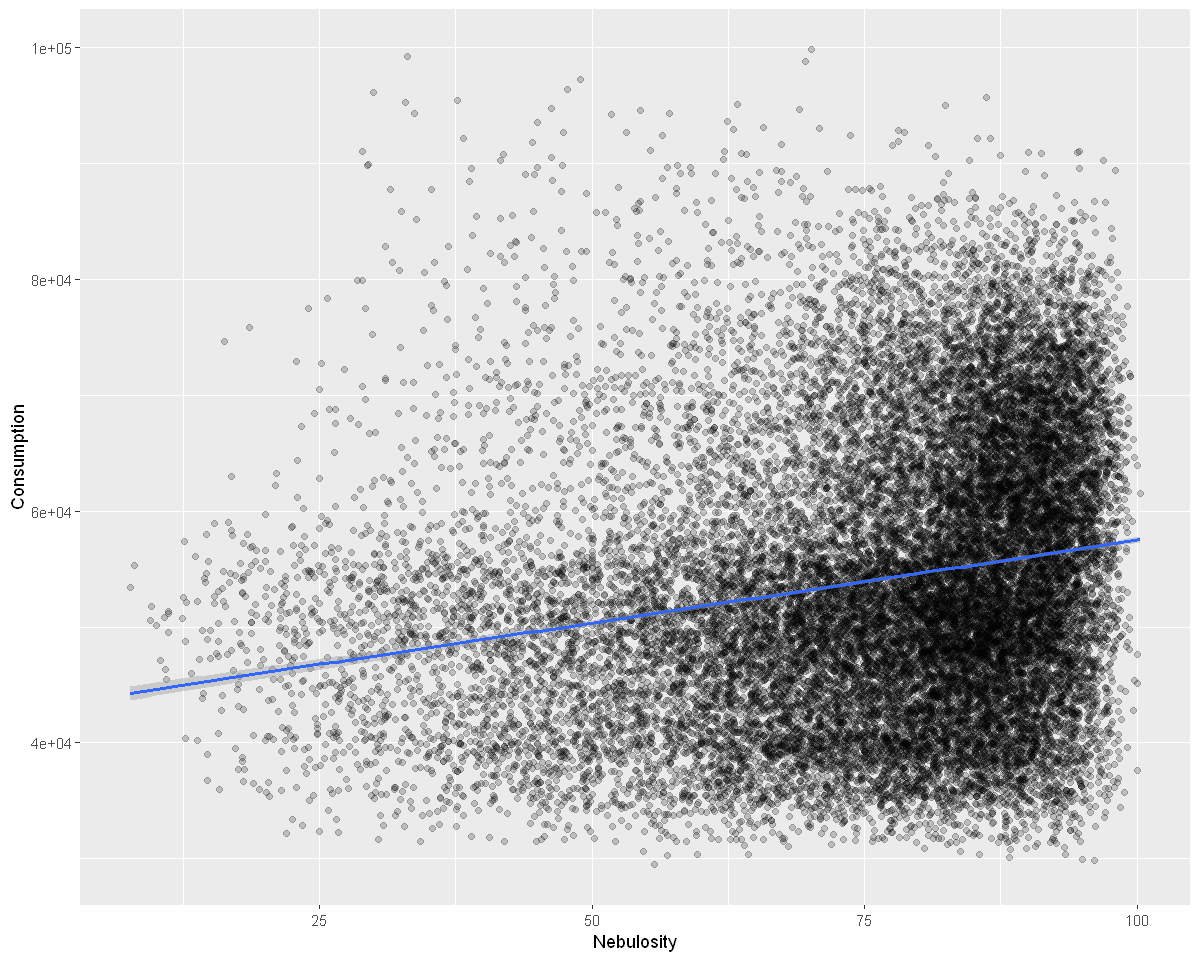

In [35]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data_train, aes(x = Nebulosity, y = Consumption)) +geom_point(alpha = 0.2) + geom_smooth(method = "lm")
#Corrélation positive

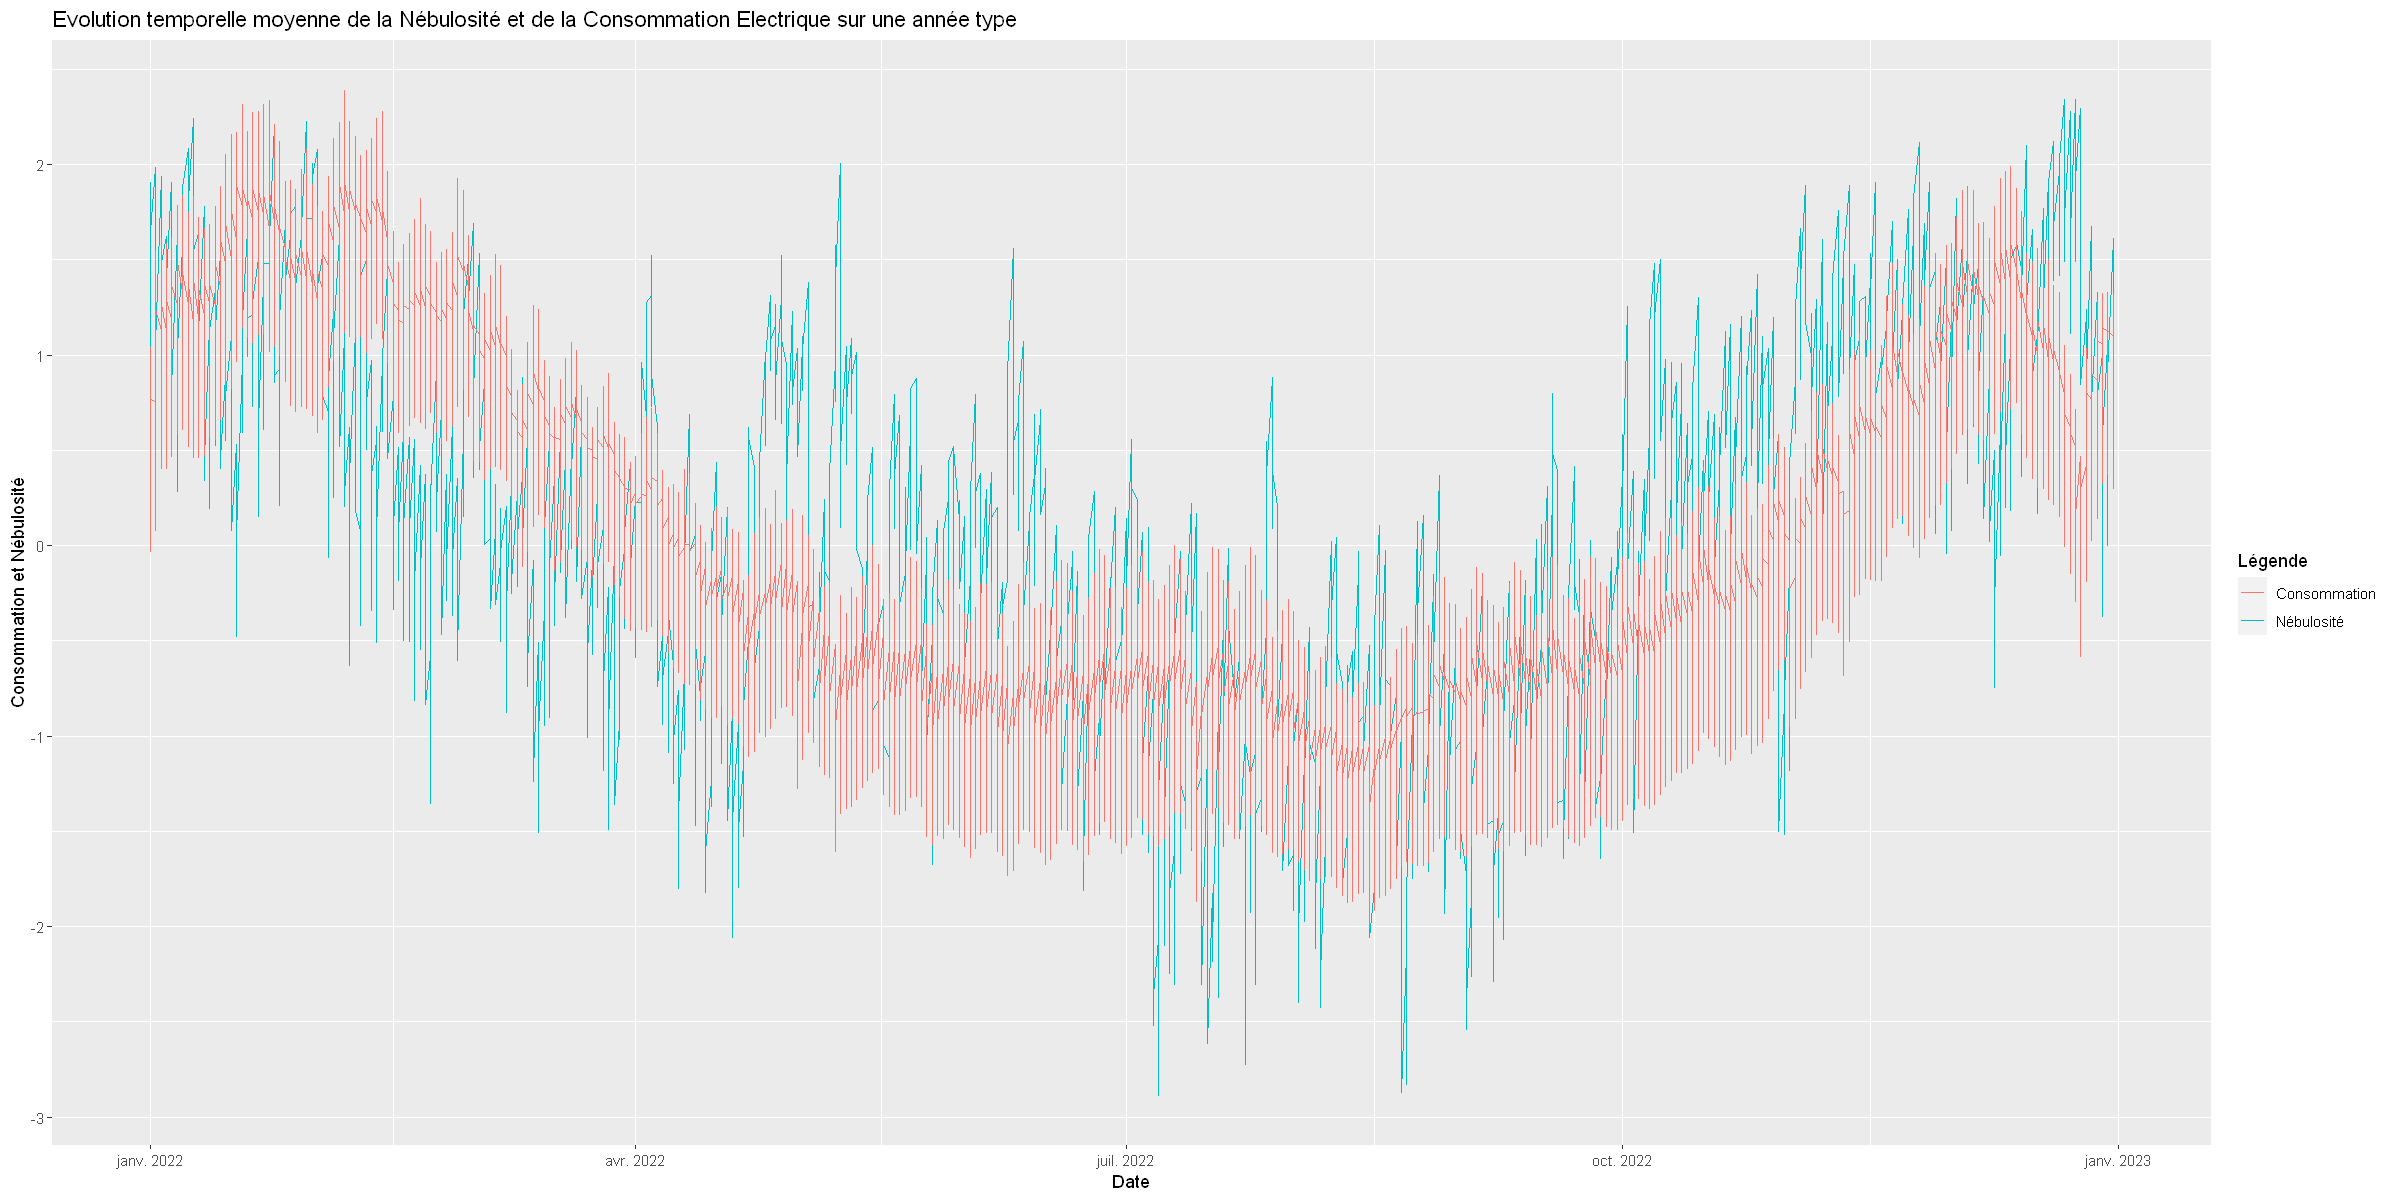

In [37]:
#Etude sur notre année type
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_type, aes(x=Date, y=Nebulosity_normalized, group = 1, color = 'Nébulosité')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consommation')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle moyenne de la Nébulosité et de la Consommation Electrique sur une année type") +
    ylab("Consommation et Nébulosité")

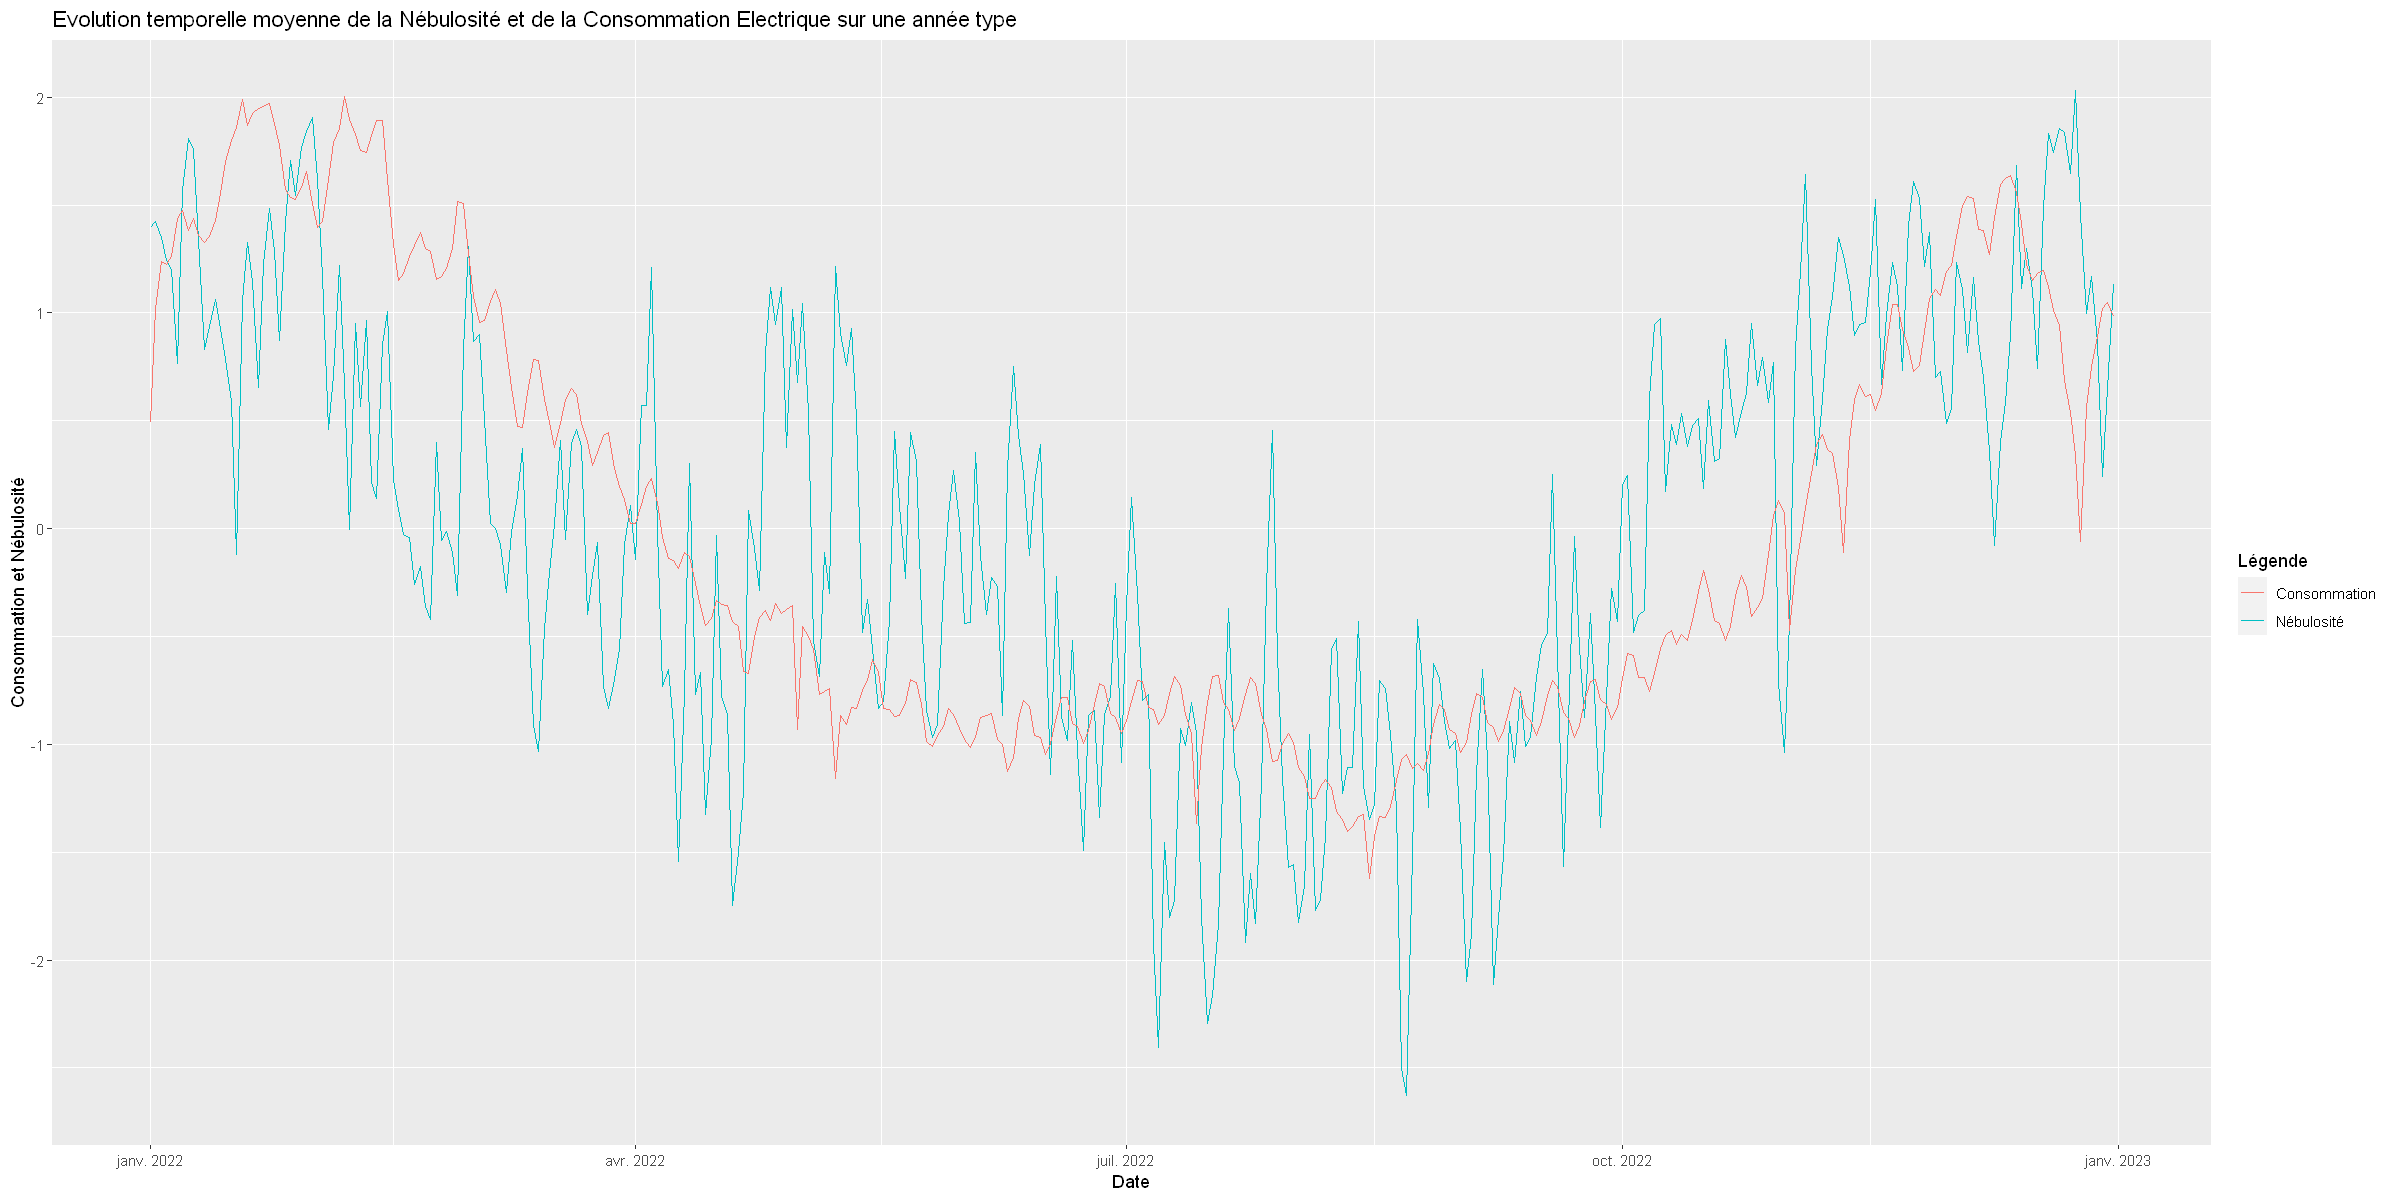

In [38]:
#Etude sur notre année type, sans Time
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_type_notime, aes(x=Date, y=Nebulosity_normalized, group = 1, color = 'Nébulosité')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consommation')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle moyenne de la Nébulosité et de la Consommation Electrique sur une année type") +
    ylab("Consommation et Nébulosité")

La nébulosité et la consommation électrique semblent avoir une corrélation positive et partager une même trajectoire temporelle

##### Etude de l'Humidité

`geom_smooth()` using formula 'y ~ x'



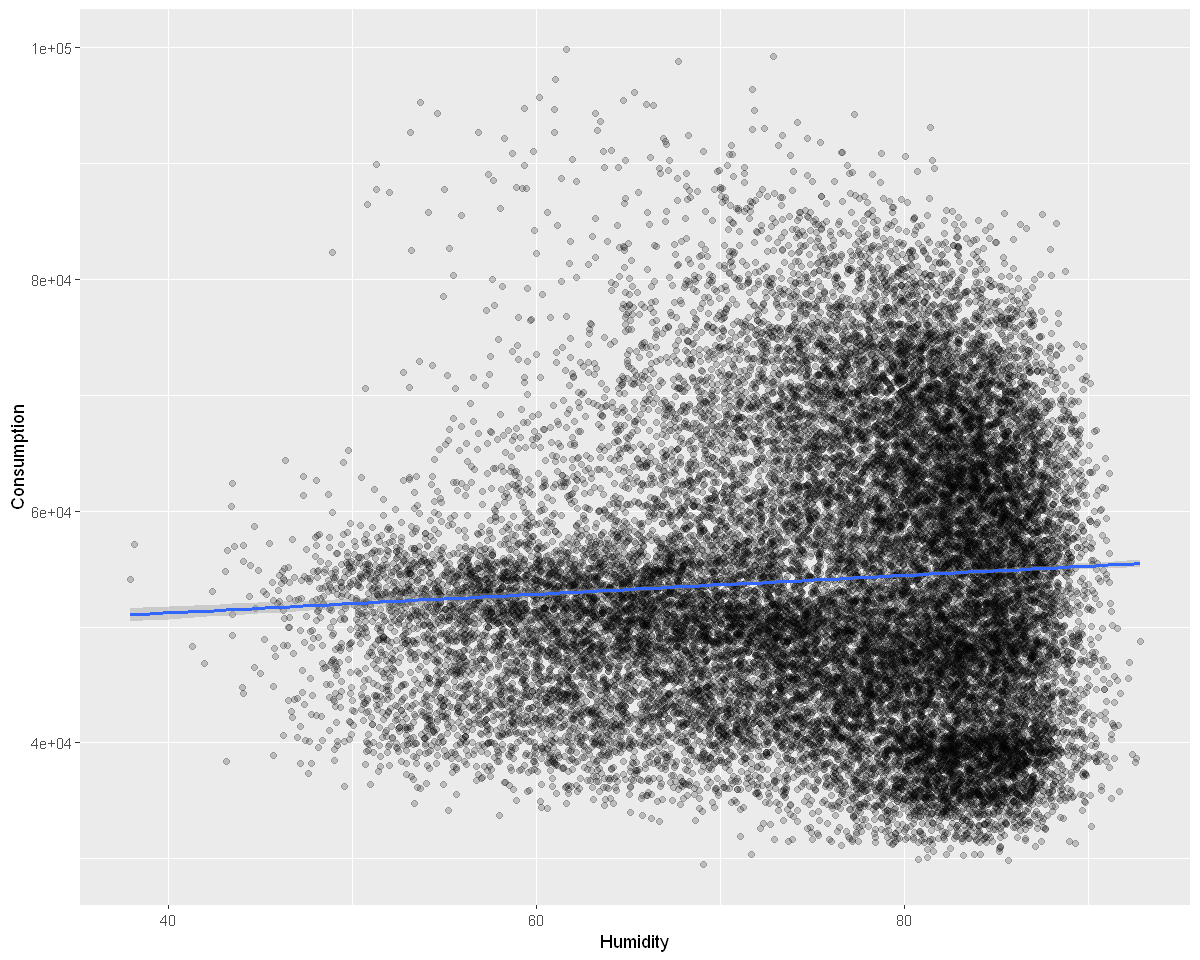

In [39]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data_train, aes(x = Humidity, y = Consumption)) +geom_point(alpha = 0.2) + geom_smooth(method = "lm")
#Très faible corrélation positive

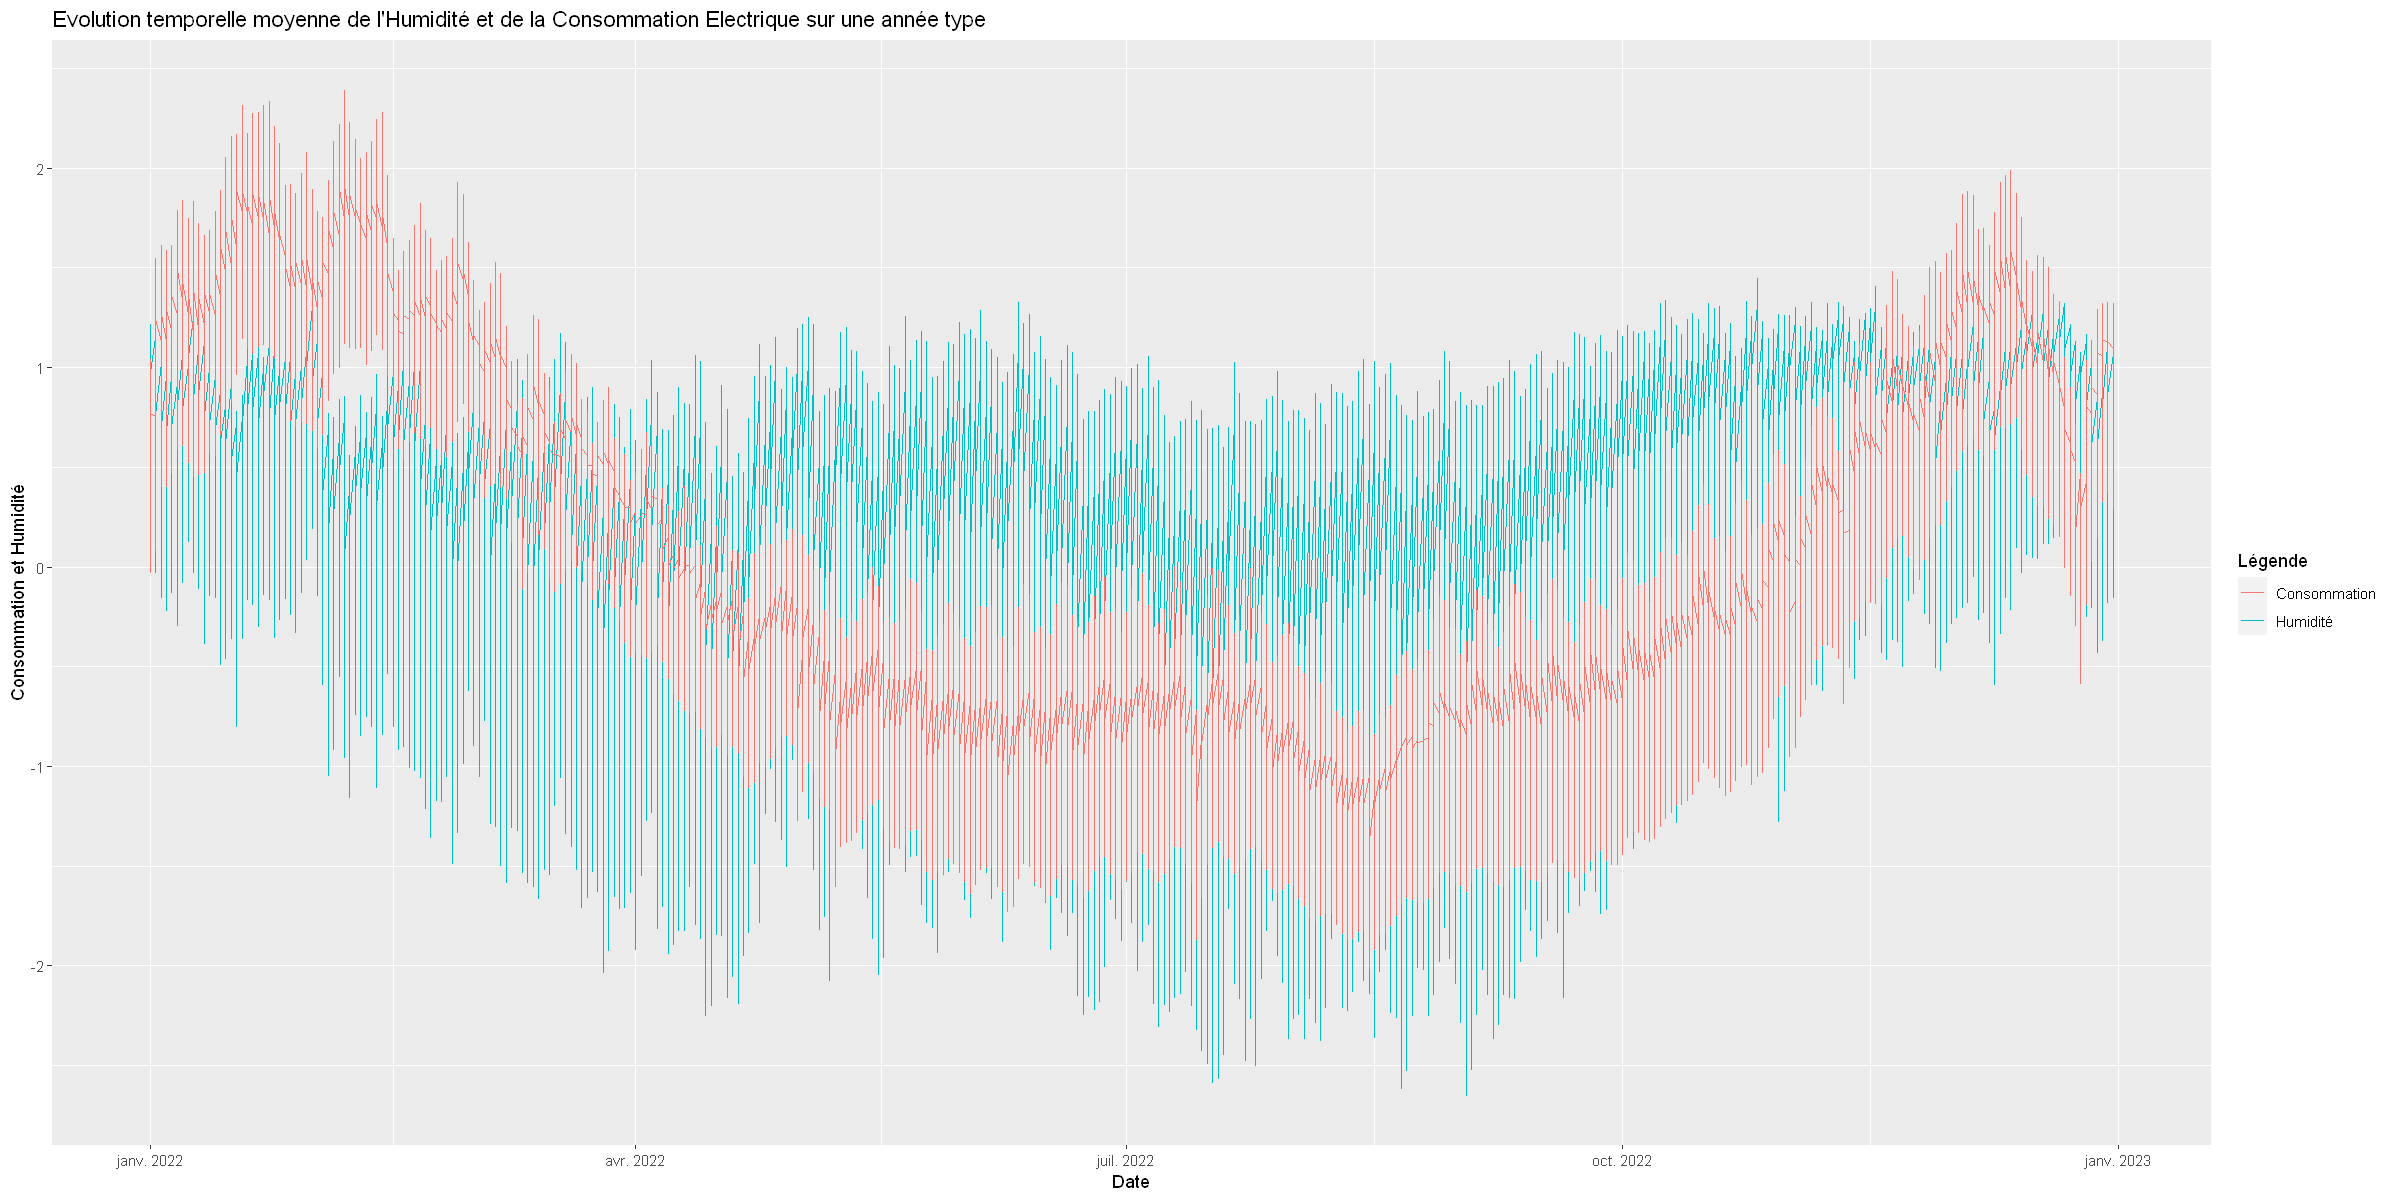

In [40]:
#Etude sur notre année type
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_type, aes(x=Date, y=Humidity_normalized, group = 1, color = 'Humidité')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consommation')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle moyenne de l'Humidité et de la Consommation Electrique sur une année type") +
    ylab("Consommation et Humidité")

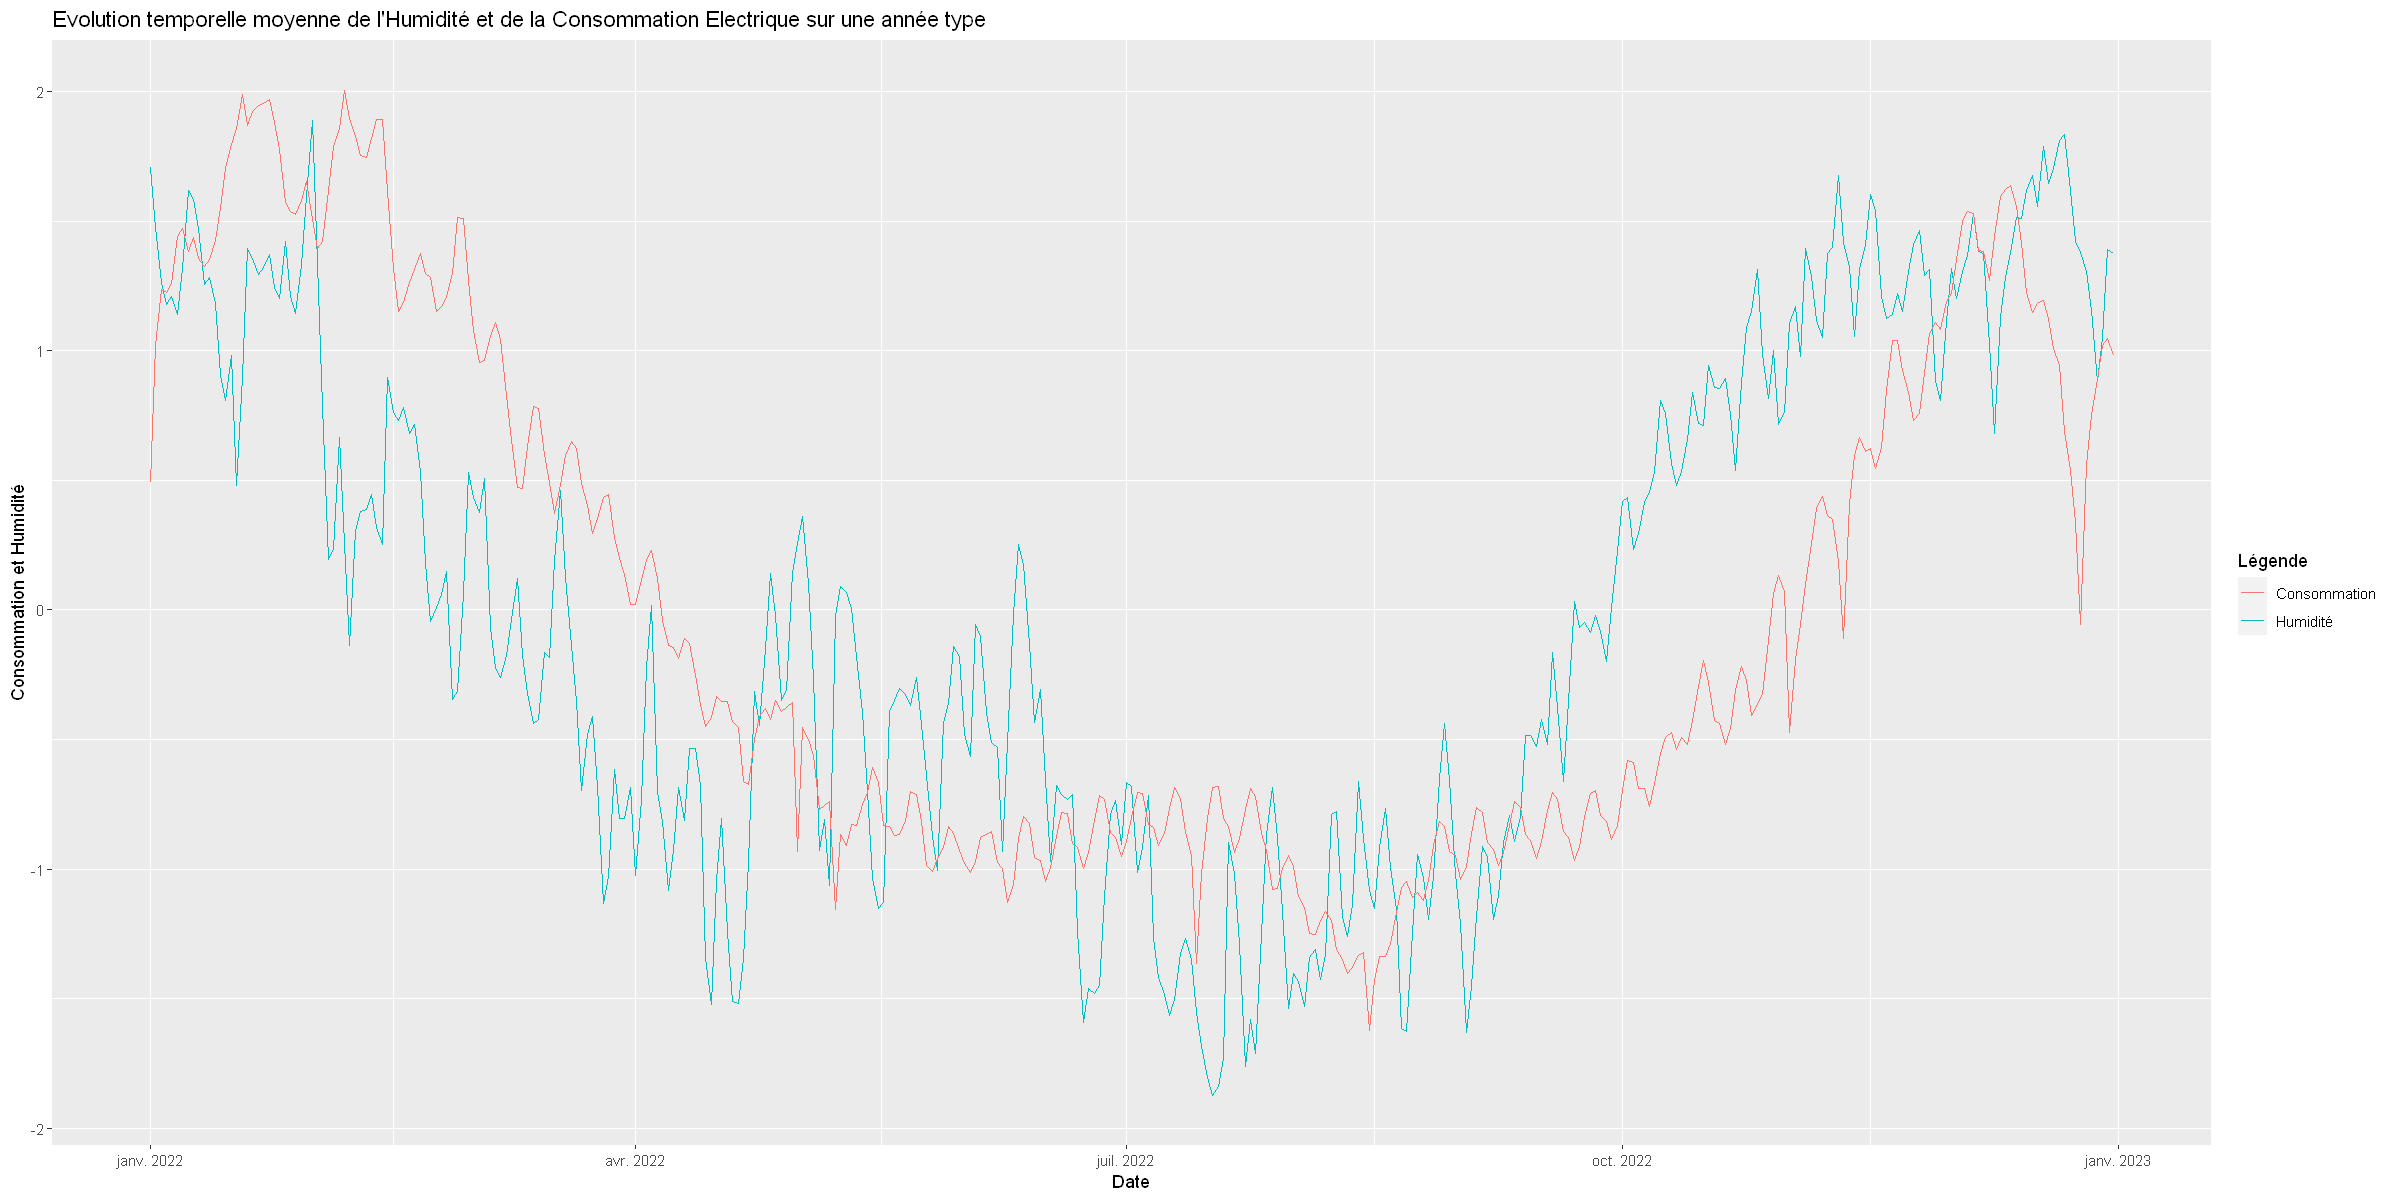

In [41]:
#Etude sur l'année type, sans Time
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_type_notime, aes(x=Date, y=Humidity_normalized, group = 1, color = 'Humidité')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_normalized, colour = 'Consommation')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle moyenne de l'Humidité et de la Consommation Electrique sur une année type") +
    ylab("Consommation et Humidité")

L'humidité et la consommation électrique semblent être corrélées positivement. L'humidité semble suivre la mêmetrajectoire temporelle que la consommation électrique, mais moins que la nébulosité.

##### Etude de la saisonnalité annuelle

In [42]:
#Aggrégation par jour dans la base de données pour avoir un graphique plus aéré (sans Time)
data_train_notime <- data_train %>%
   group_by(Date) %>% 
   summarise_at(vars("Consumption", "Temperature", "Nebulosity", "Humidity"), mean)

In [43]:
data_train_notime = data_train_notime %>% 
            separate(Date, c("Year", "Month", "Day"), sep = "-", remove = FALSE)

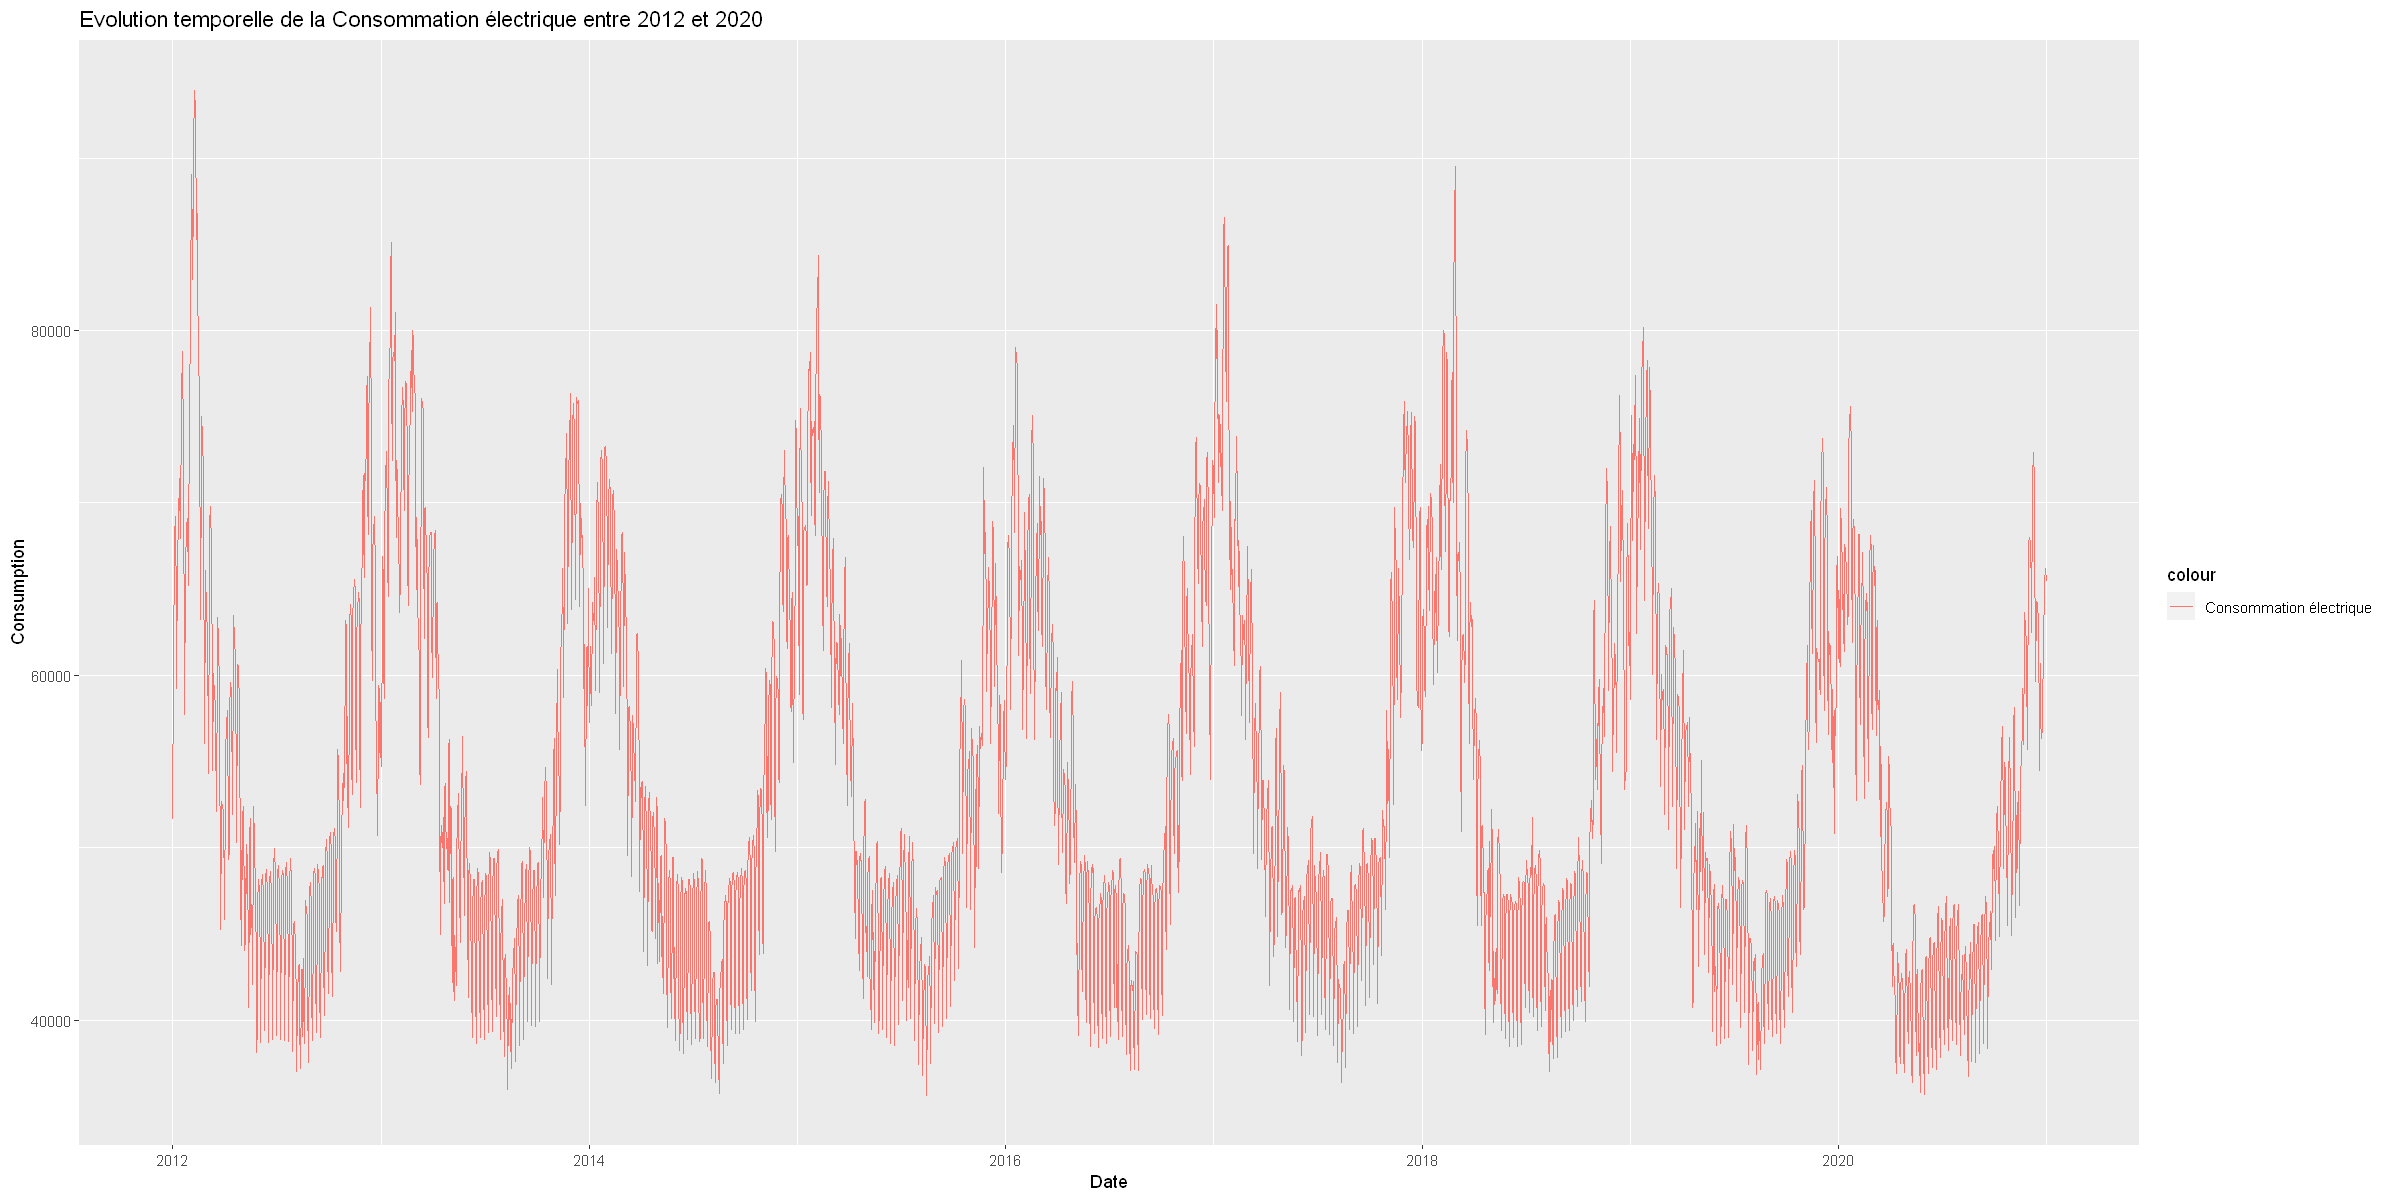

In [44]:
#Représentation de la consommation électrique par jour entre 2012 et 2020
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_notime, aes(Date, Consumption, colour="Consommation électrique")) + geom_line() + ggtitle("Evolution temporelle de la Consommation électrique entre 2012 et 2020")

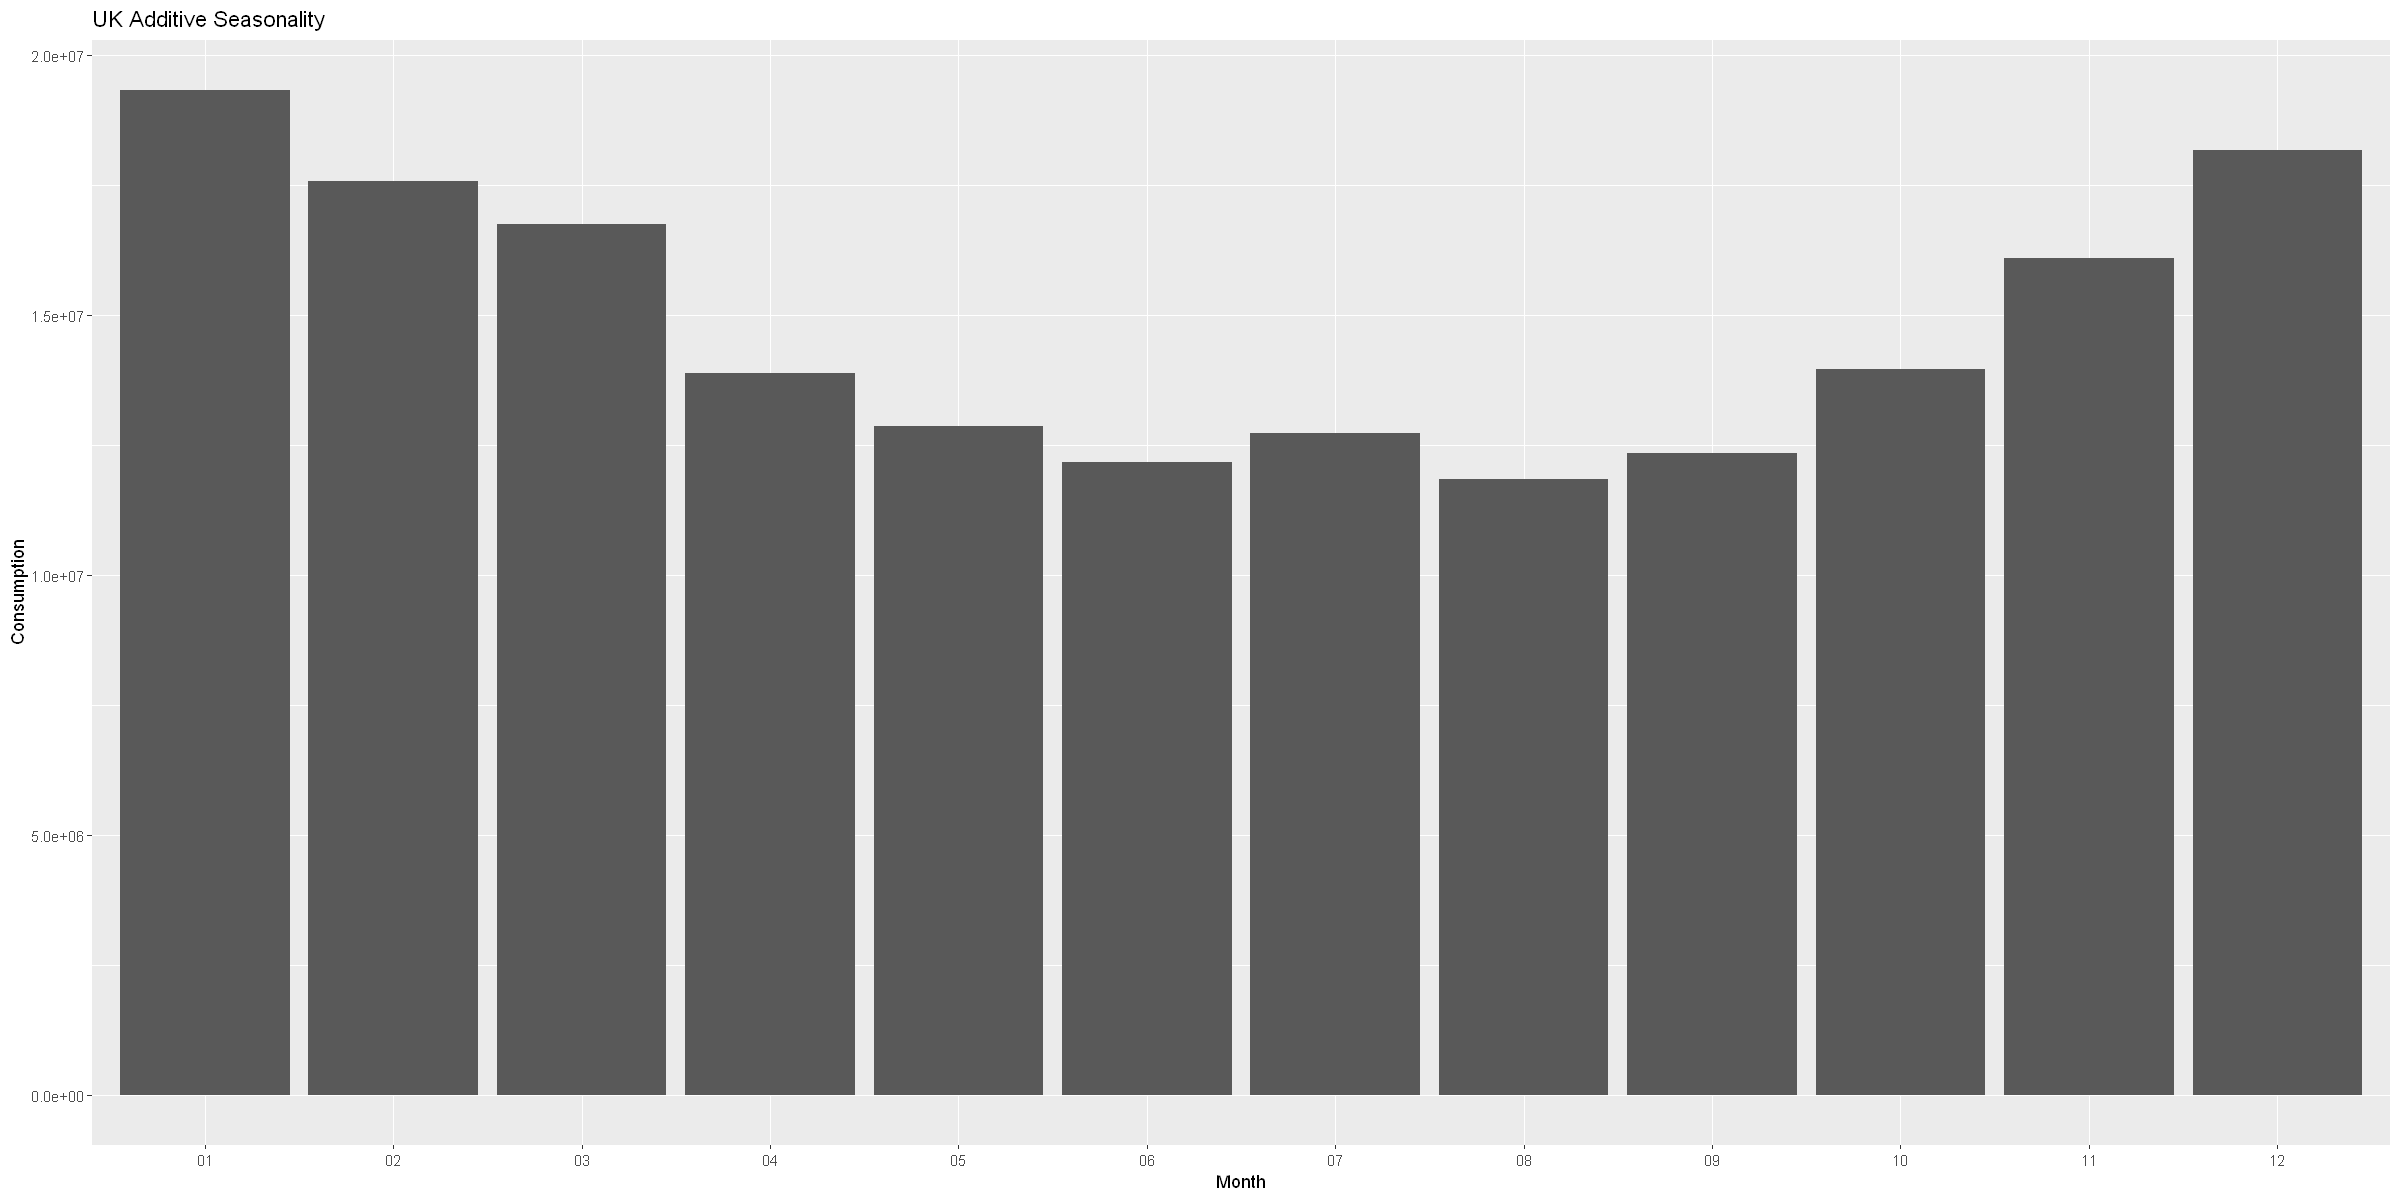

In [45]:
#Consommations électriques cumulées par mois entre 2012 et 2020
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_notime,aes(Month,Consumption)) + geom_bar(stat = "identity") + ggtitle("UK Additive Seasonality")

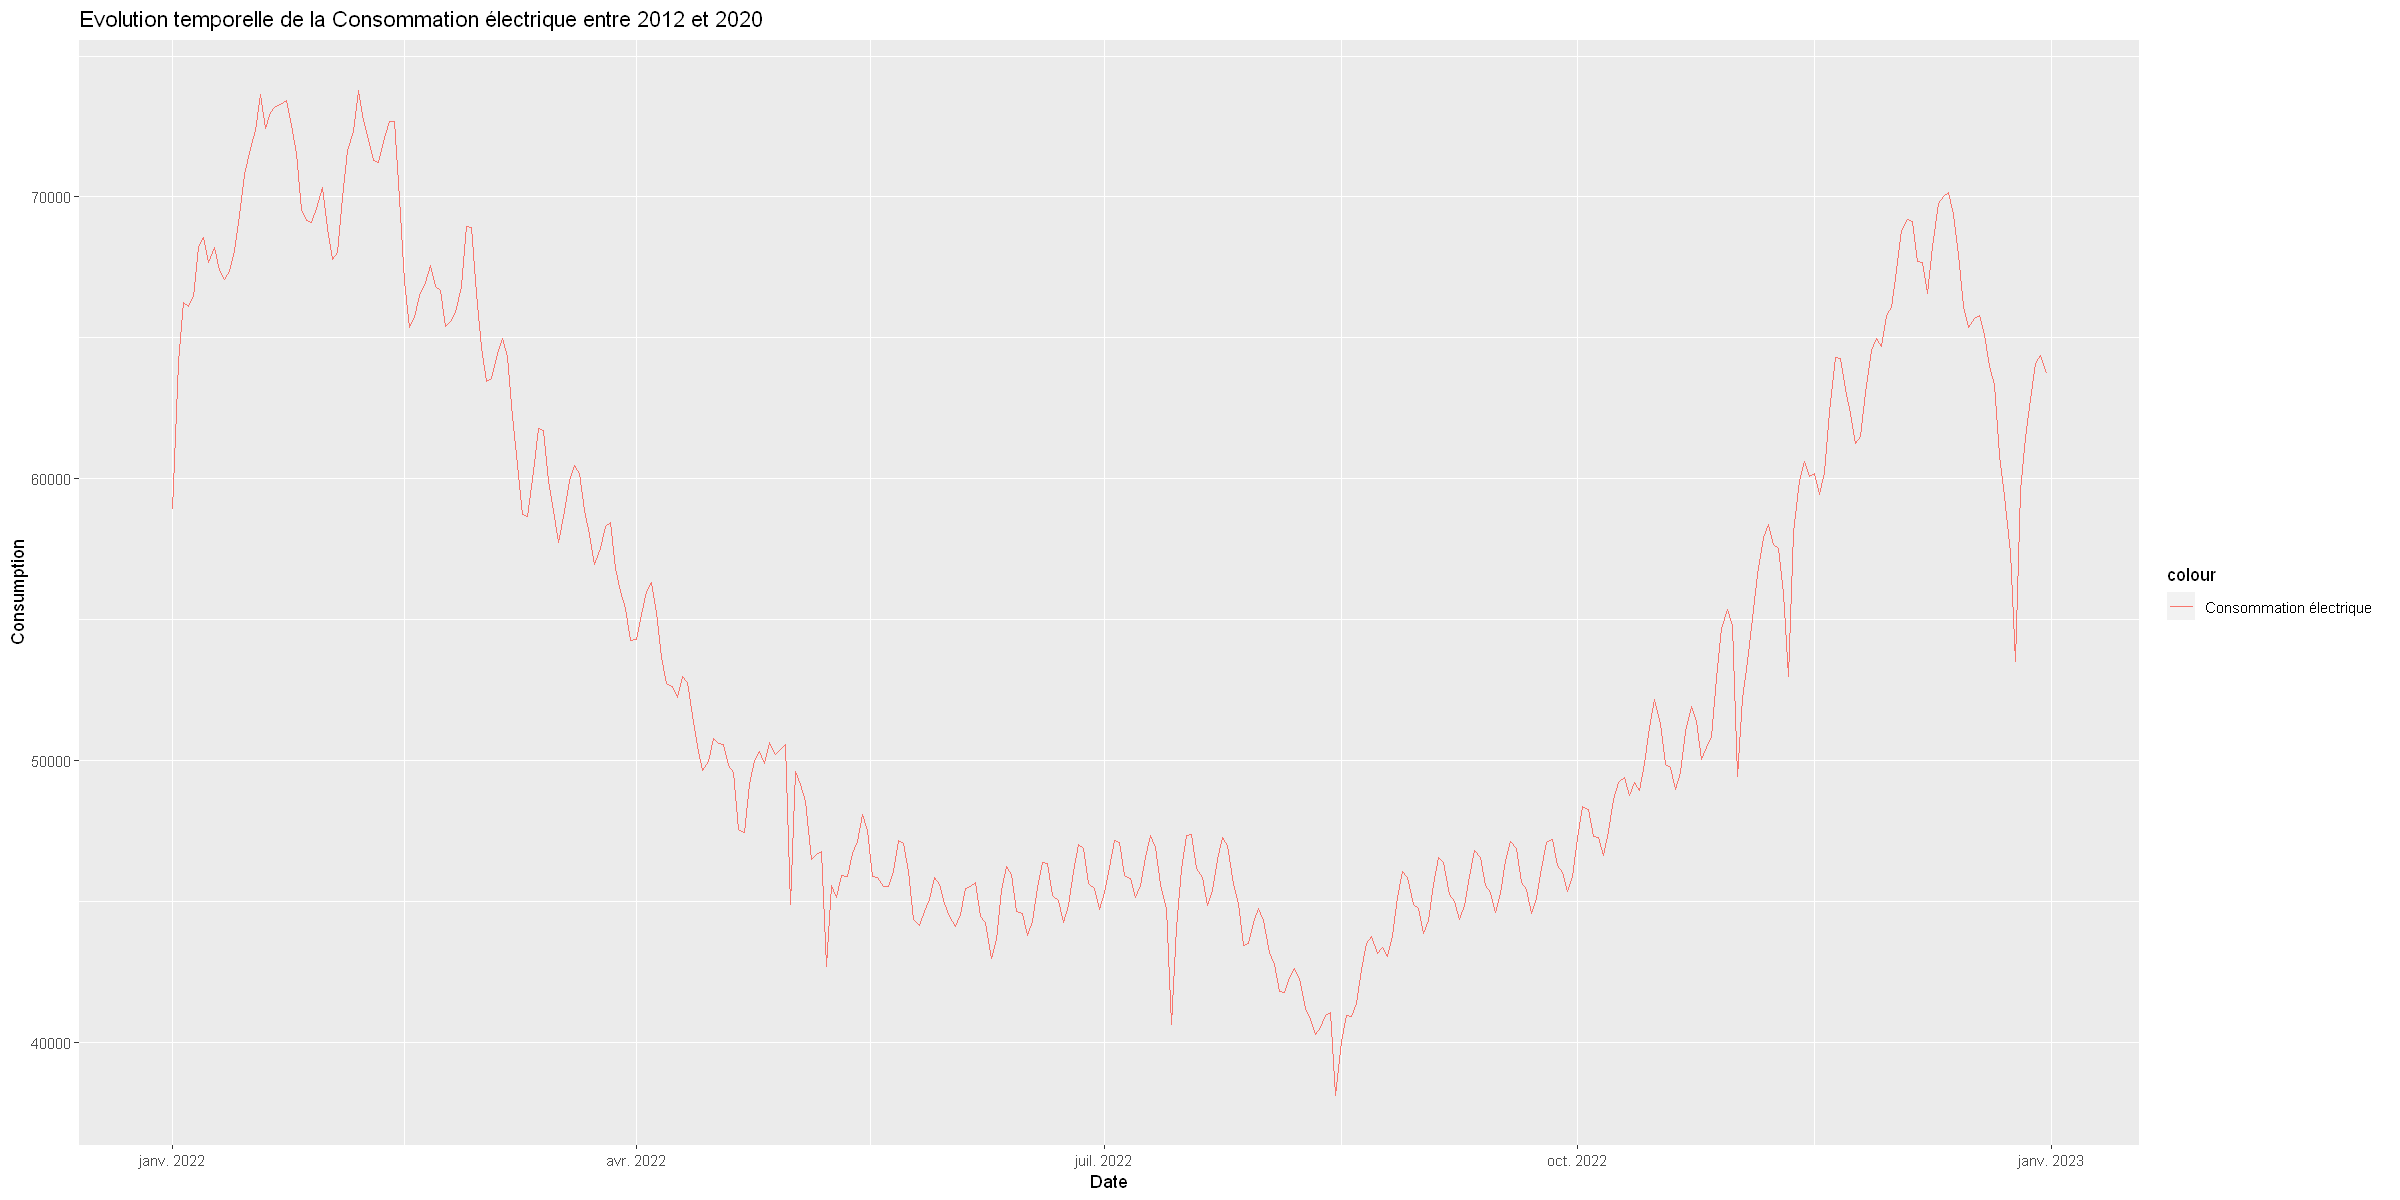

In [44]:
#Représentation de la consommation électrique sur notre année type
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_type_notime, aes(Date, Consumption, colour="Consommation électrique")) + geom_line() + ggtitle("Evolution temporelle de la Consommation électrique entre 2012 et 2020")

Nous observons clairement une saisonnalité annuelle, avec plus de consommation électrique en hiver dont un pic entre novembre et février, et moins de consommation électrique en été avec un pic observé entre juin et août

##### Etude de la saisonnalité mensuelle

In [49]:
data_train_type_notime = data_train_type_notime %>% 
            separate(Date, c("Year", "Month", "Day"), sep = "-", remove = FALSE)

In [50]:
#Création d'un mois type: aggréation par le numéro de jour du mois sur les 12 mois des 9 années
data_train_month_type <- data_train_type_notime %>%
                group_by(Day) %>%
                summarise_at(vars("Consumption"), mean)

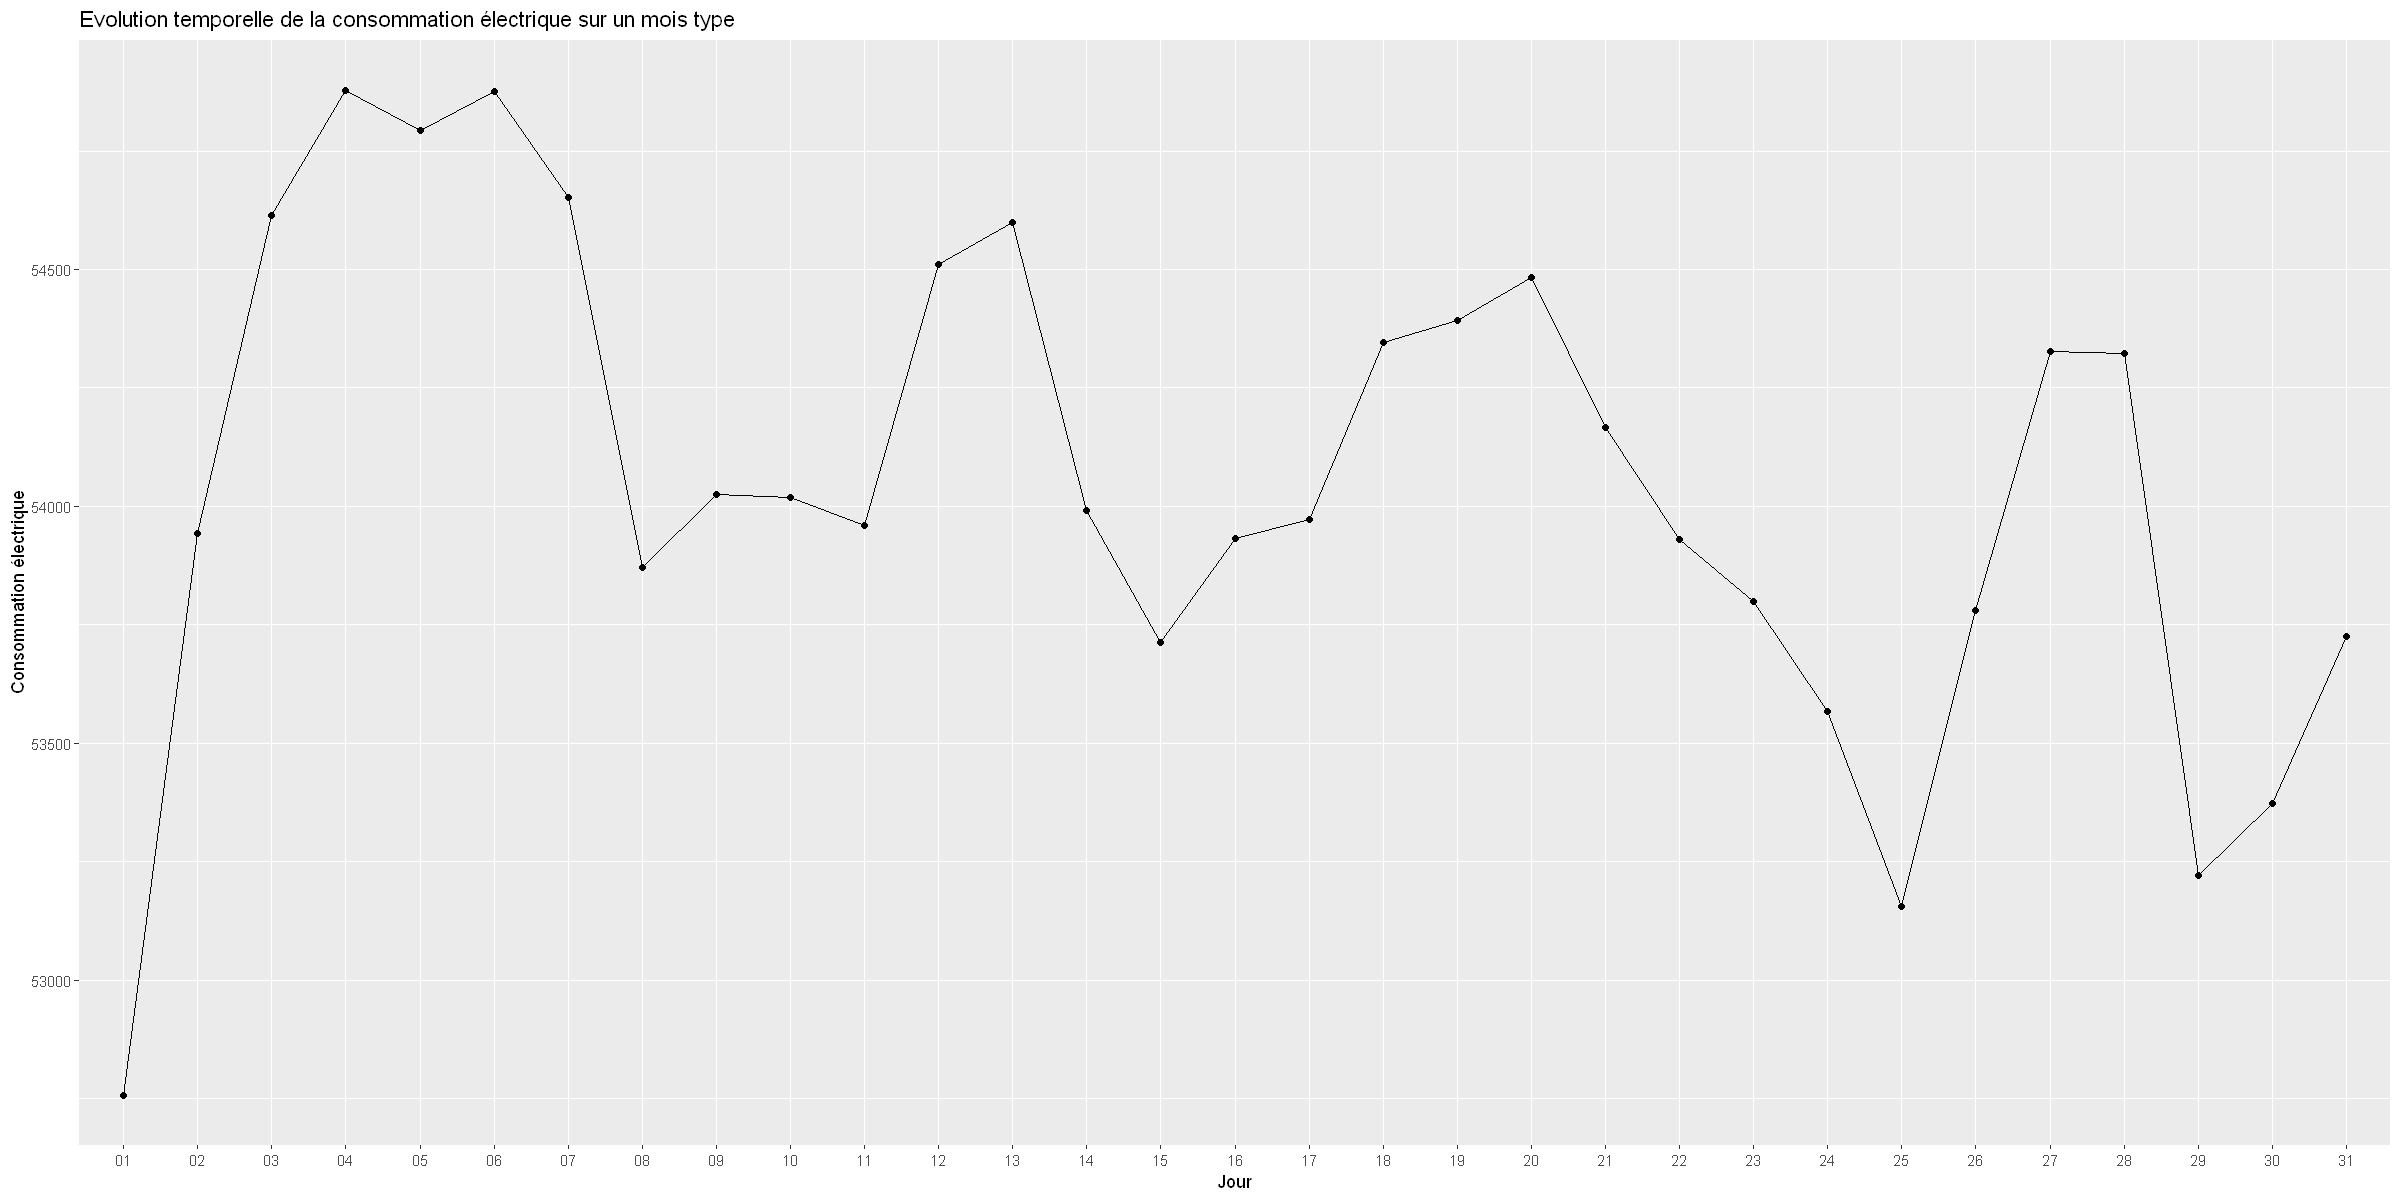

In [51]:
#Représentation graphique de la consommation électrique sur notre mois type
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_month_type, aes(Day, Consumption, group = 1)) +
         geom_point() +
         geom_line() +
         labs(x = "Jour", y = "Consommation électrique", 
              title = "Evolution temporelle de la consommation électrique sur un mois type")

On observe une forte hausse en début de mois et certains pics à certains jours du mois: pics à la hausse les 3,45, 13, 14, 20, 27 et 28 de chaque mois et pics à la baisse le 1er, 7, 8, 9, 16, 25 et 29 de chaque mois

##### Etude de la saisonnalité hebdomadaire

In [41]:
#Création d'une semaine type: aggrégation par jour de la semaine
data_train <- data_train %>%
  mutate(Day_number = case_when(
    data_train$Weekday == "lundi" ~ 1,
    data_train$Weekday == "mardi" ~ 2,
    data_train$Weekday == "mercredi" ~ 3,
    data_train$Weekday == "jeudi" ~ 4,
    data_train$Weekday == "vendredi" ~ 5,
    data_train$Weekday == "samedi" ~ 6,
    data_train$Weekday == "dimanche" ~ 7,
    ))

data_train_day_type <- data_train %>%
    group_by(Day_number) %>%
    summarise_at(vars("Consumption"), mean)

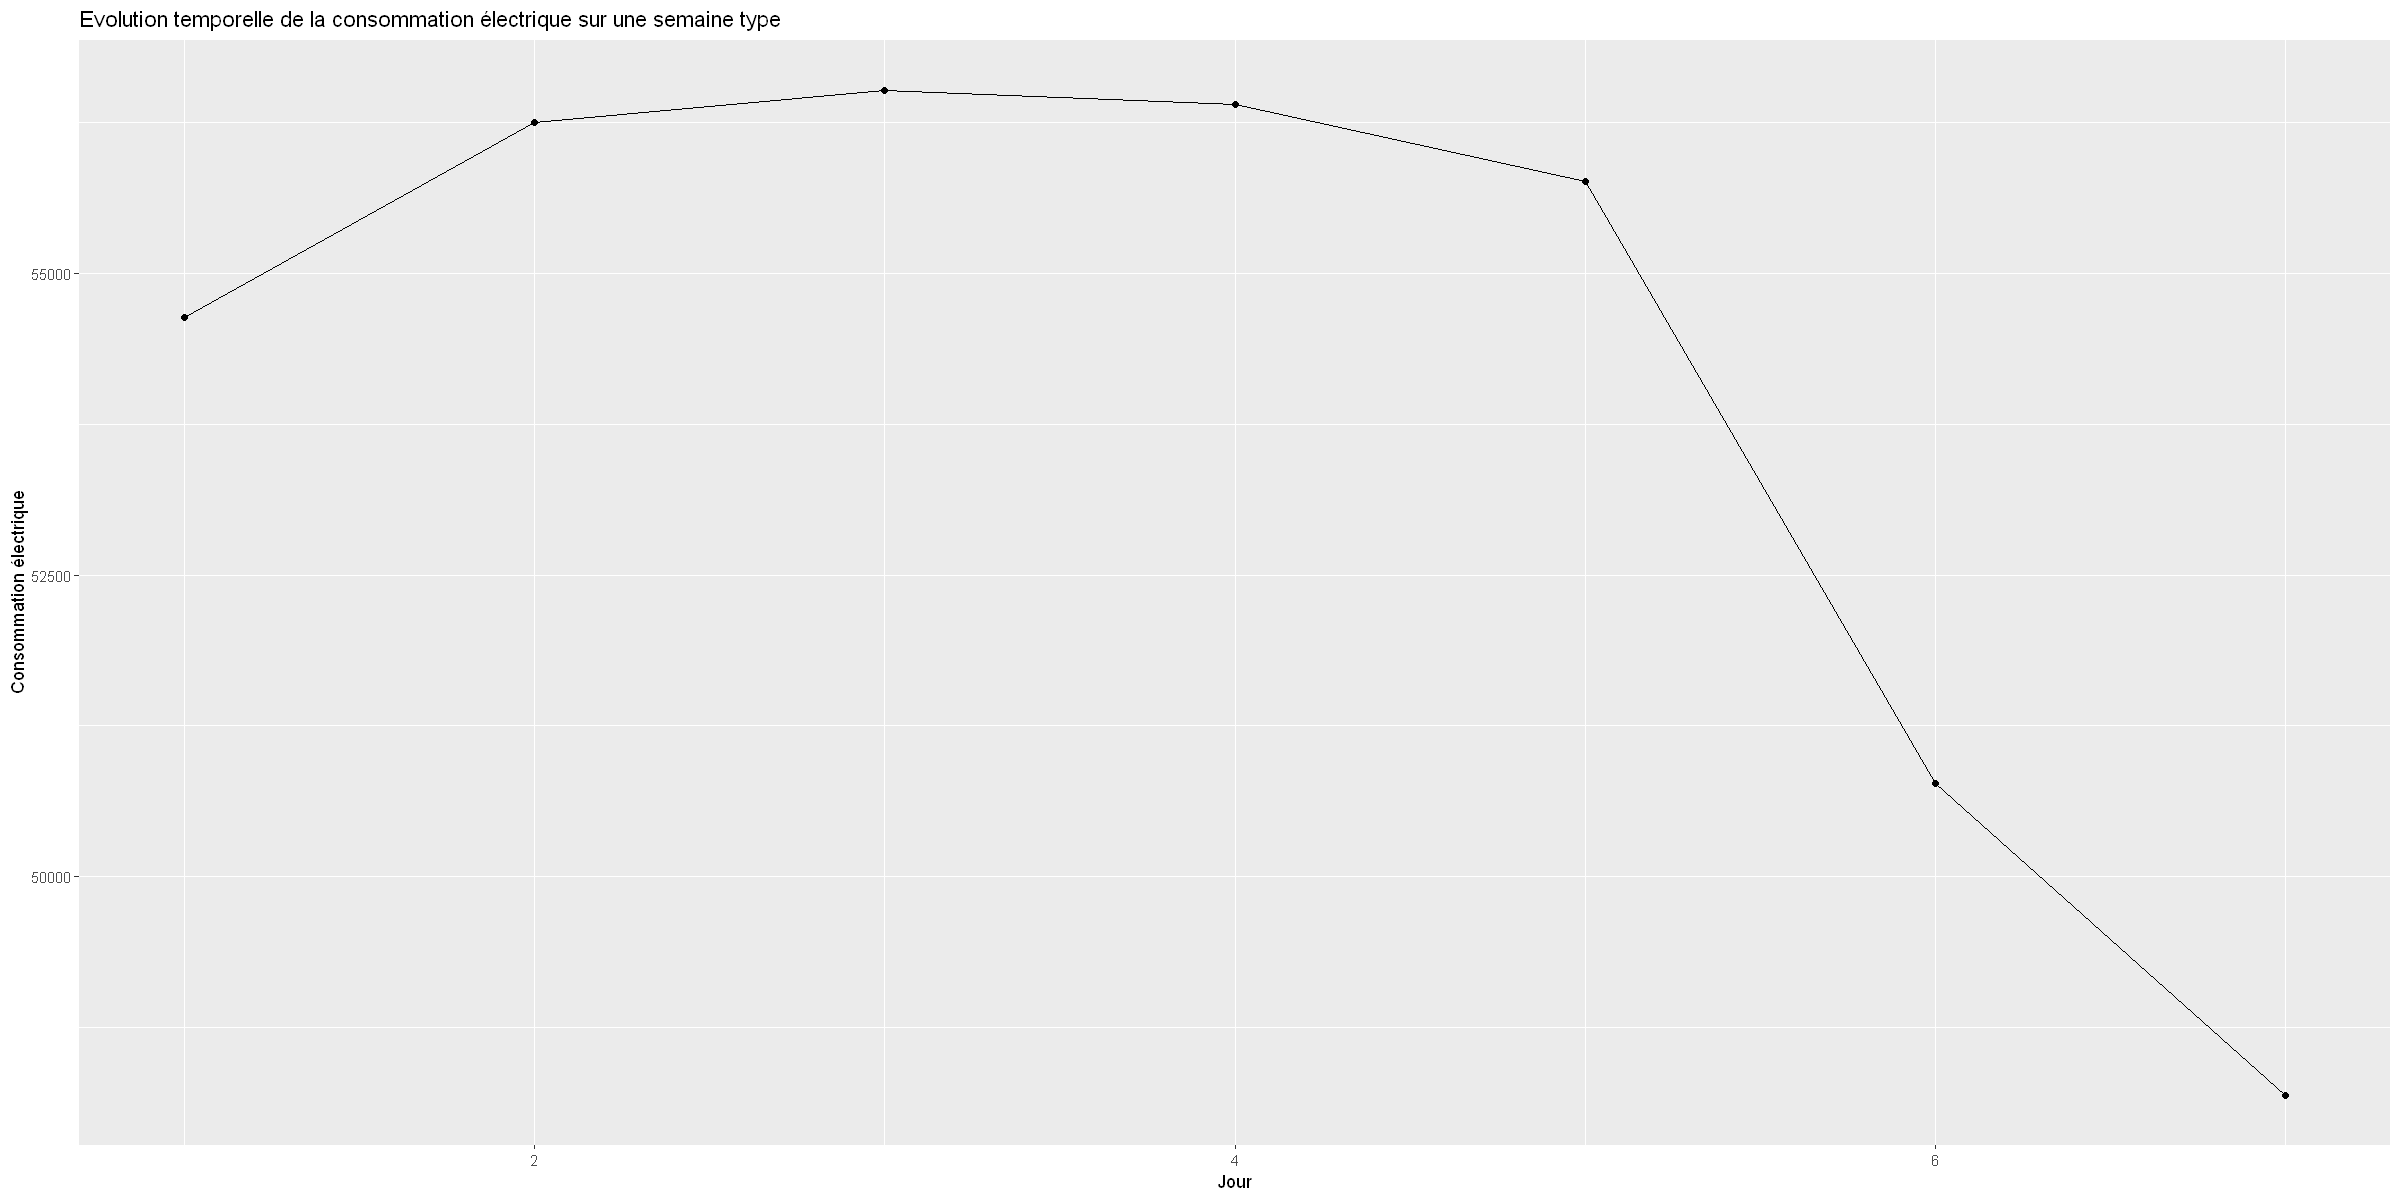

In [53]:
#Reorésentation graphique de la consommation électrique sur notre semaine type
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_day_type, aes(Day_number, Consumption, group = 1)) +
         geom_point() +
         geom_line() +
         labs(x = "Jour", y = "Consommation électrique", 
              title = "Evolution temporelle de la consommation électrique sur une semaine type")

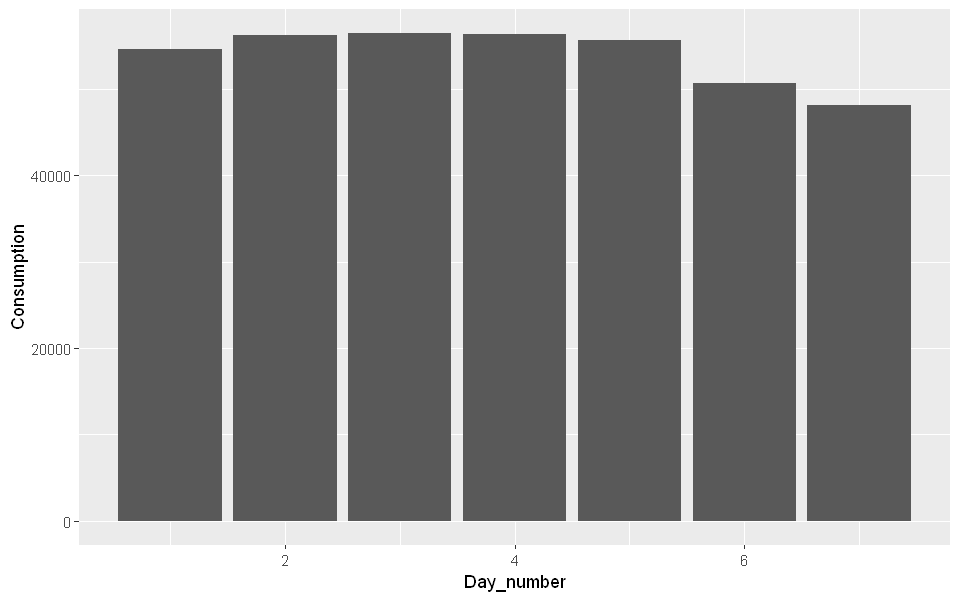

In [54]:
#Consommation électrique par jour de notre semaine type
options(repr.plot.width=8, repr.plot.height=5)
ggplot(data=data_train_day_type, aes(x=Day_number, y=Consumption)) + geom_bar(stat="identity")

Nous observons de consommation le mardi-mercredi-jeudi, une diminution le vendredi et une grande diminution le week-end. Nous observons également une plus faible consommation le lundi par rapport aux autres jours ouvrés.

##### Etude de la saisonnalité journalière

In [218]:
#Création d'une journée type: aggrégation par 'Time'
data_train_time_type <- data_train %>%
    group_by(Time) %>%
    summarise_at(vars("Consumption"), mean)

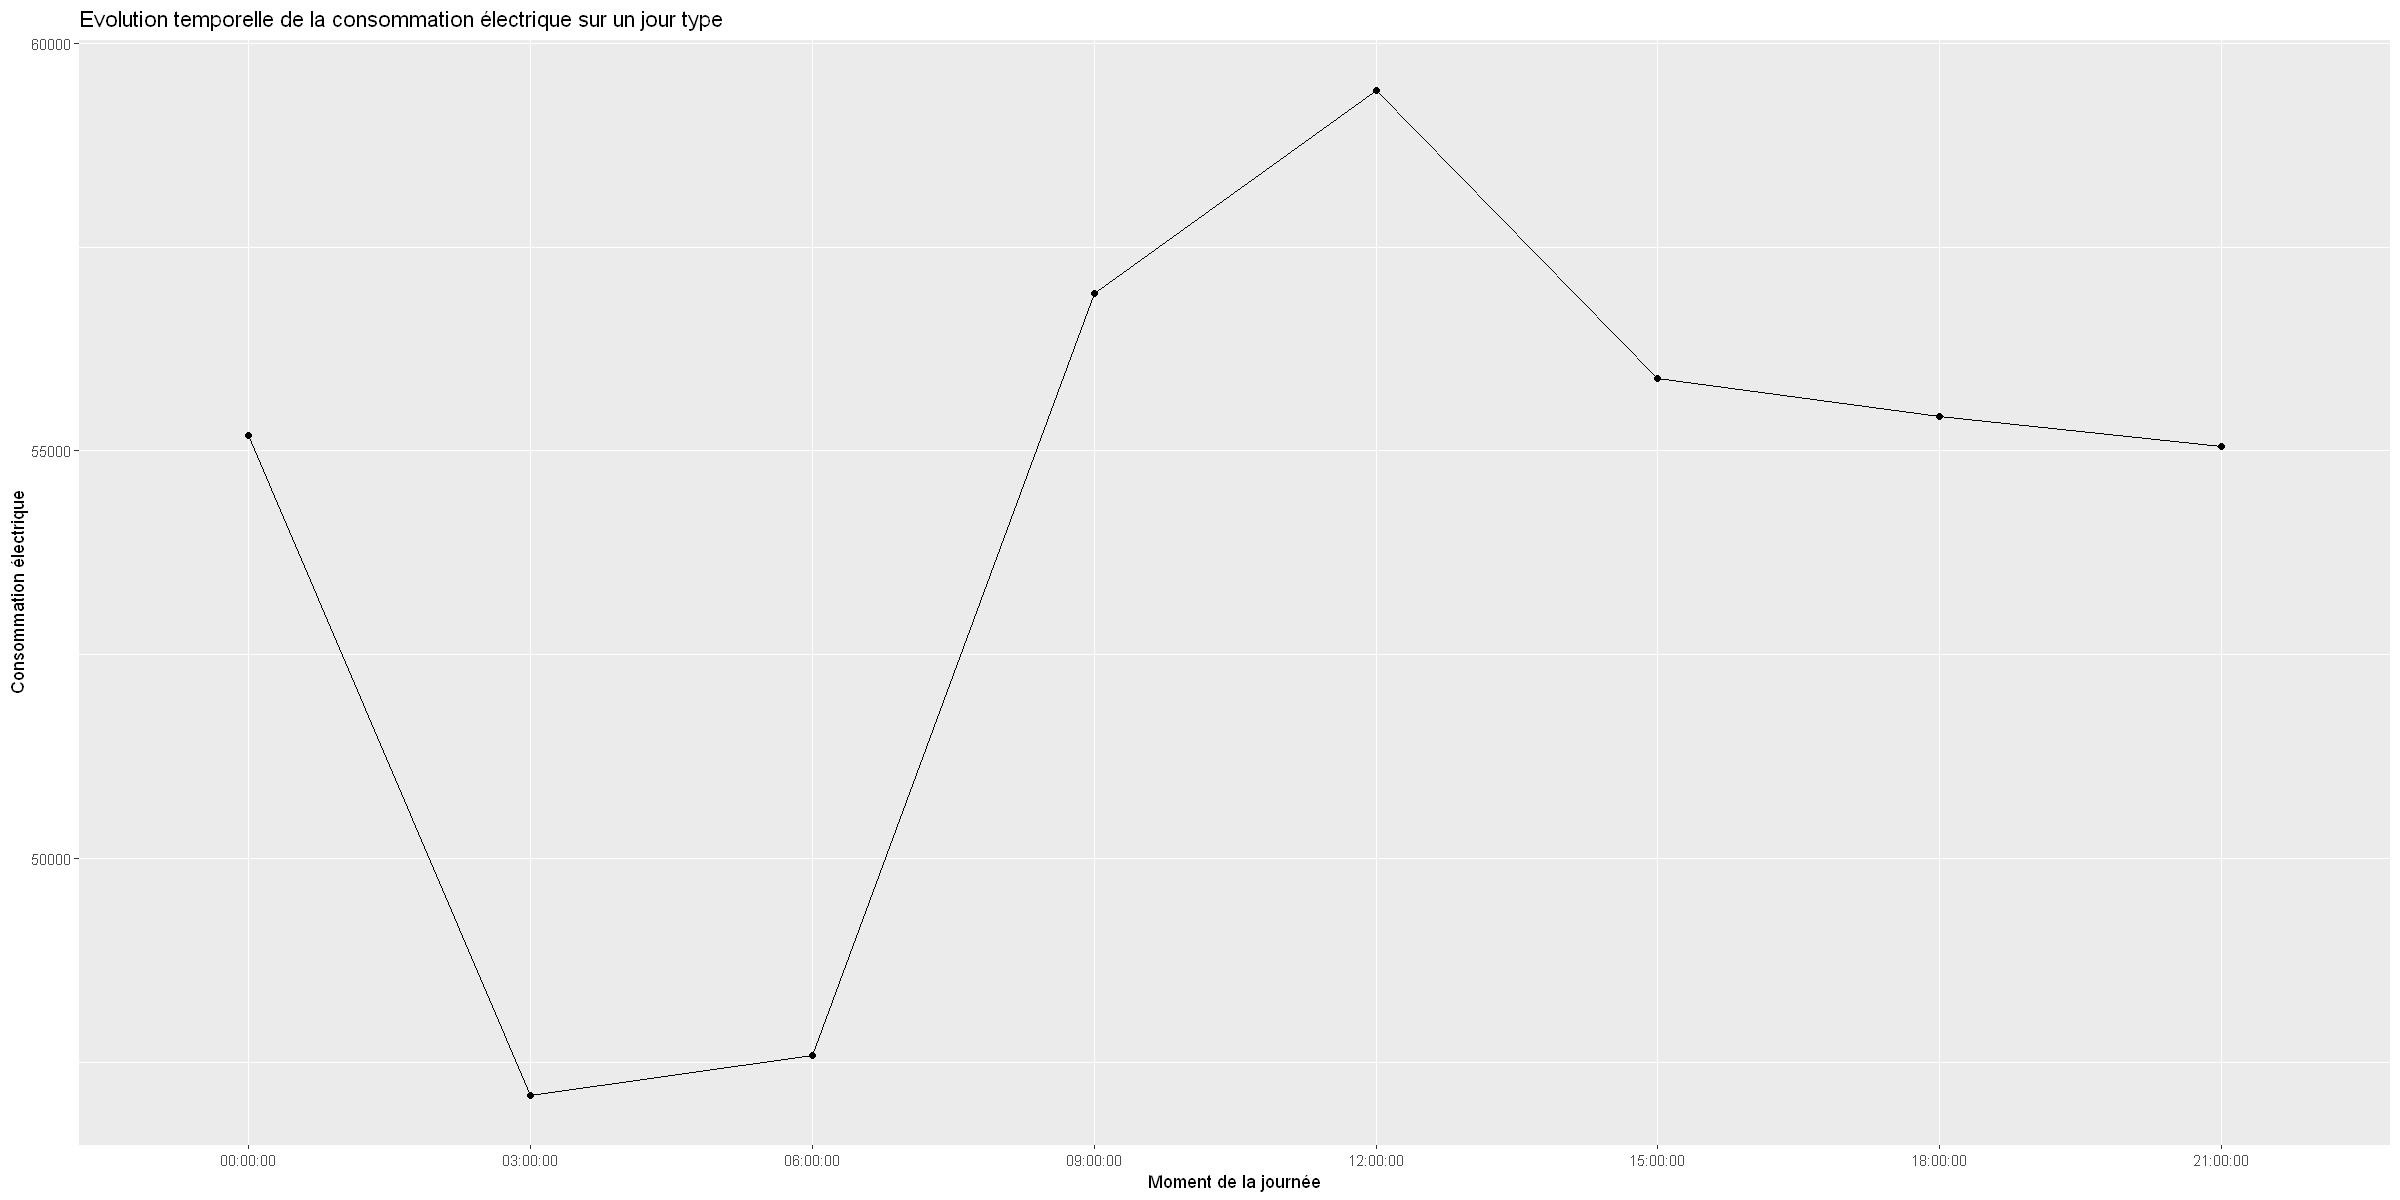

In [56]:
#Représentation graphique de la consommation électrique sur notre journée type
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_time_type, aes(Time, Consumption, group = 1)) +
         geom_point() +
         geom_line() +
         labs(x = "Moment de la journée", y = "Consommation électrique", 
              title = "Evolution temporelle de la consommation électrique sur un jour type")

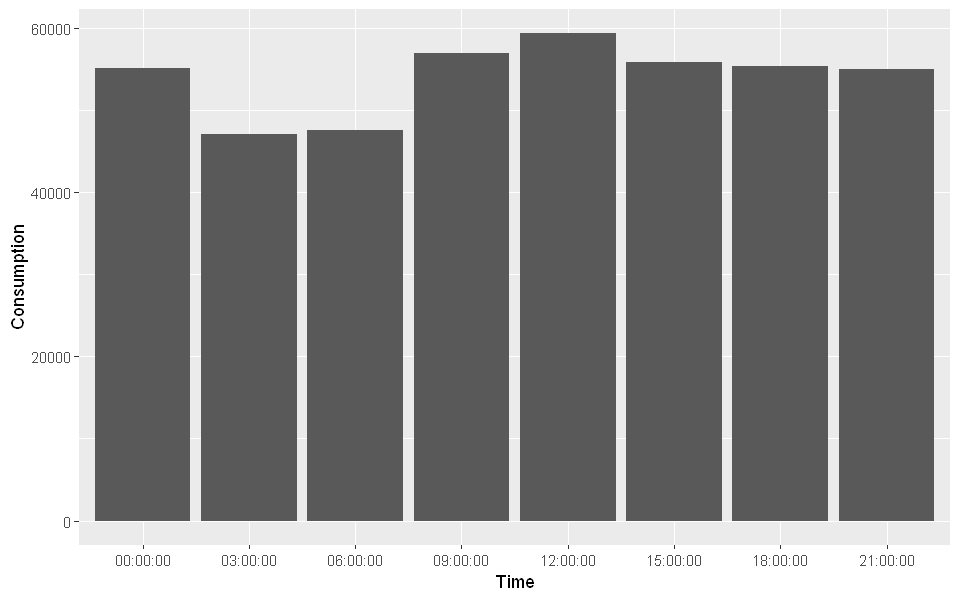

In [77]:
#Consommation électrique pour chaque période de notre journée type
options(repr.plot.width=8, repr.plot.height=5)
ggplot(data=data_train_time_type, aes(x=Time, y=Consumption)) + geom_bar(stat="identity")

Nous observons une forte hausse de la consommation électrique entre 6h et 9 du matin, puis un pic de la consommation à midi. La consommation électrique diminue à 15h puis il y a unelégère baisse jusqu'à minuit qui s'accentue entre minuit et 6h du matin.

##### Etude des jours fériés

In [58]:
#Aggrégation de la consommation électrique par jour férié (en différenciant les jours fériés)
data_train_ferie <- data_train %>%
    group_by(jour_ferie) %>%
    summarise_at(vars("Consumption"), mean)

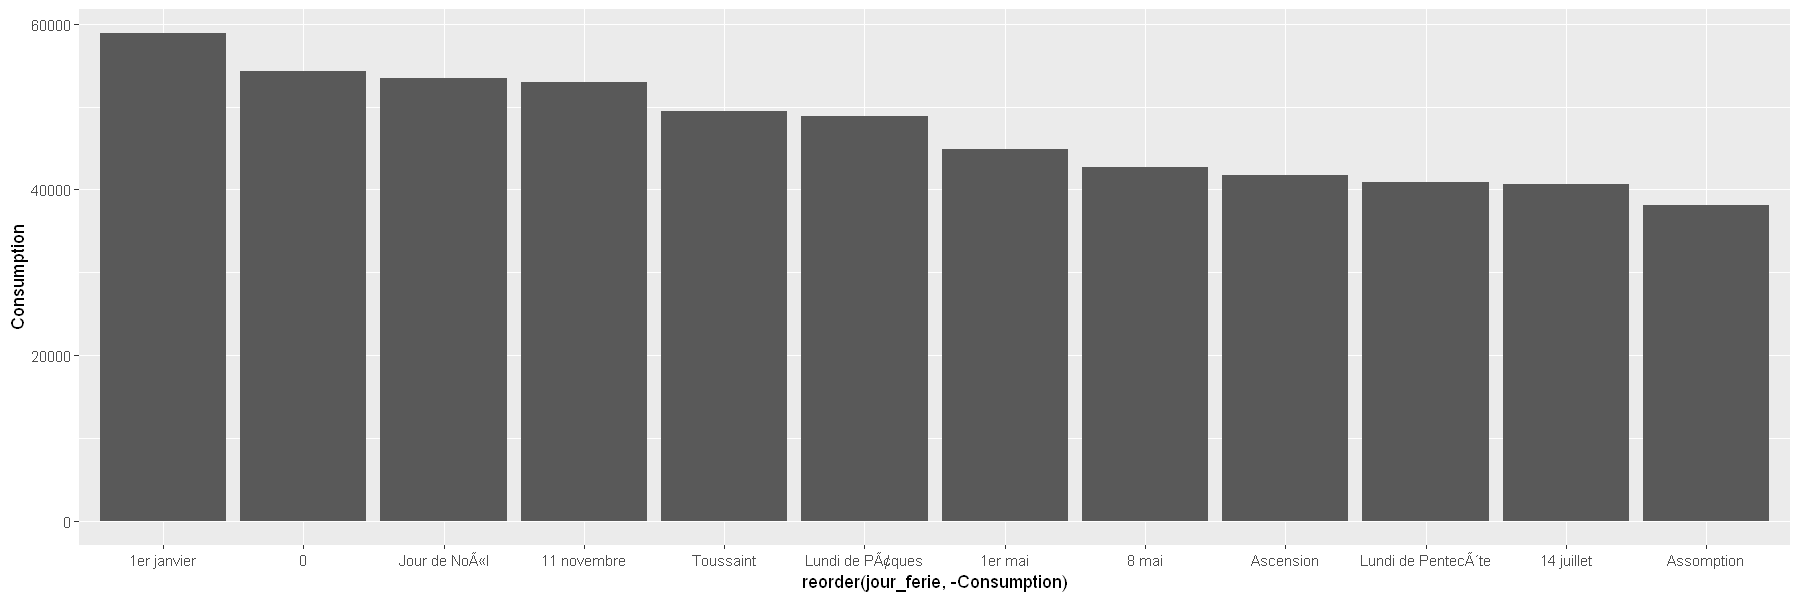

In [59]:
#Consommations électriques cumulées par jour férié entre 2012 et 2020
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data=data_train_ferie, aes(x=reorder(jour_ferie, -Consumption), y=Consumption)) + geom_bar(stat="identity")

In [60]:
#Création d'un jour férié type: aggrégation par jour férié (en ne différenciant pas les jours fériés)
data_train_ferie <- data_train_ferie %>%
  mutate(jour_ferie = case_when(
    data_train_ferie$jour_ferie == 0 ~ 0,
    data_train_ferie$jour_ferie != 0 ~ 1,
    ))

data_train_ferie <- data_train_ferie %>%
    group_by(jour_ferie) %>%
    summarise_at(vars("Consumption"), mean)

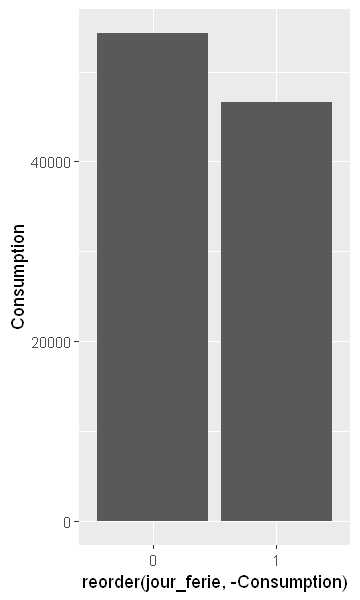

In [61]:
#Consommations électriques cumulées en jour férié ou hors jour férié
options(repr.plot.width=3, repr.plot.height=5)
ggplot(data=data_train_ferie, aes(x=reorder(jour_ferie, -Consumption), y=Consumption)) + geom_bar(stat="identity")

In [62]:
#Calcul de la variation de consommation électrique
data_train_ferie$growth <- with(data_train_ferie, ave(Consumption,
                          FUN=function(x) c(NA, diff(x) / tail(x, -1))))
data_train_ferie

jour_ferie,Consumption,growth
<dbl>,<dbl>,<dbl>
0,54307.45,NA
1,46604.69,-0.1652785


En moyenne, la consommation d'électricité diminue de 16% en jour férié. Mais on constate des disparités selon le type de jour férié: on consomme davantage le 1er janvier et beaucoup moins lors de l'Ascension, lié également à la saison et température liées au mois du jour férié.

##### Etudes des vacances

In [63]:
#Création d'un jour de vacances type: aggrégation faite avec la variable 'Holidays'
data_train_holidays <- data_train %>%
    group_by(Holidays) %>%
    summarise_at(vars("Consumption"), mean)

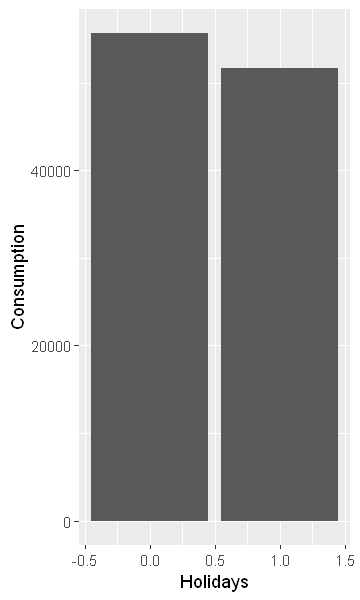

In [64]:
#Consommations électriques cumulées en ou hors vacances entre 2012 et 2020
options(repr.plot.width=3, repr.plot.height=5)
ggplot(data=data_train_holidays, aes(x=Holidays, y=Consumption)) + geom_bar(stat="identity")

In [65]:
#Calcul de la variation de consommation électrique
data_train_holidays$growth <- with(data_train_holidays, ave(Consumption,
                          FUN=function(x) c(NA, diff(x) / tail(x, -1))))
data_train_holidays

Holidays,Consumption,growth
<dbl>,<dbl>,<dbl>
0,55650.48,NA
1,51606.37,-0.0783646


En moyenne, la consommation d'électricité diminue de 7% pendant les vacances.

In [66]:
#On calcule les variations de consommation électrique par zone de vacances
data_train_day_type_holidays_A <- subset(data_train, Holidays_A==1)
data_train_day_type_holidays_A <- data_train_day_type_holidays_A %>%
  mutate(Day_number = case_when(
    data_train_day_type_holidays_A$Weekday == "lundi" ~ 1,
    data_train_day_type_holidays_A$Weekday == "mardi" ~ 2,
    data_train_day_type_holidays_A$Weekday == "mercredi" ~ 3,
    data_train_day_type_holidays_A$Weekday == "jeudi" ~ 4,
    data_train_day_type_holidays_A$Weekday == "vendredi" ~ 5,
    data_train_day_type_holidays_A$Weekday == "samedi" ~ 6,
    data_train_day_type_holidays_A$Weekday == "dimanche" ~ 7,
    ))

data_train_day_type_holidays_A <- data_train_day_type_holidays_A %>%
    group_by(Day_number) %>%
    summarise_at(vars("Consumption"), mean)

data_train_day_type_holidays_B <- subset(data_train, Holidays_B==1)
data_train_day_type_holidays_B <- data_train_day_type_holidays_B %>%
  mutate(Day_number = case_when(
    data_train_day_type_holidays_B$Weekday == "lundi" ~ 1,
    data_train_day_type_holidays_B$Weekday == "mardi" ~ 2,
    data_train_day_type_holidays_B$Weekday == "mercredi" ~ 3,
    data_train_day_type_holidays_B$Weekday == "jeudi" ~ 4,
    data_train_day_type_holidays_B$Weekday == "vendredi" ~ 5,
    data_train_day_type_holidays_B$Weekday == "samedi" ~ 6,
    data_train_day_type_holidays_B$Weekday == "dimanche" ~ 7,
    ))

data_train_day_type_holidays_B <- data_train_day_type_holidays_B %>%
    group_by(Day_number) %>%
    summarise_at(vars("Consumption"), mean)

data_train_day_type_holidays_C <- subset(data_train, Holidays_C==1)
data_train_day_type_holidays_C <- data_train_day_type_holidays_C %>%
  mutate(Day_number = case_when(
    data_train_day_type_holidays_C$Weekday == "lundi" ~ 1,
    data_train_day_type_holidays_C$Weekday == "mardi" ~ 2,
    data_train_day_type_holidays_C$Weekday == "mercredi" ~ 3,
    data_train_day_type_holidays_C$Weekday == "jeudi" ~ 4,
    data_train_day_type_holidays_C$Weekday == "vendredi" ~ 5,
    data_train_day_type_holidays_C$Weekday == "samedi" ~ 6,
    data_train_day_type_holidays_C$Weekday == "dimanche" ~ 7,
    ))

data_train_day_type_holidays_C <- data_train_day_type_holidays_C %>%
    group_by(Day_number) %>%
    summarise_at(vars("Consumption"), mean)

data_train_day_type_holidays <- subset(data_train, Holidays==1)
data_train_day_type_holidays <- data_train_day_type_holidays %>%
  mutate(Day_number = case_when(
    data_train_day_type_holidays$Weekday == "lundi" ~ 1,
    data_train_day_type_holidays$Weekday == "mardi" ~ 2,
    data_train_day_type_holidays$Weekday == "mercredi" ~ 3,
    data_train_day_type_holidays$Weekday == "jeudi" ~ 4,
    data_train_day_type_holidays$Weekday == "vendredi" ~ 5,
    data_train_day_type_holidays$Weekday == "samedi" ~ 6,
    data_train_day_type_holidays$Weekday == "dimanche" ~ 7,
    ))

data_train_day_type_holidays <- data_train_day_type_holidays %>%
    group_by(Day_number) %>%
    summarise_at(vars("Consumption"), mean)

data_train_day_type$Consumption_A <- data_train_day_type_holidays_A$Consumption
data_train_day_type$Consumption_B <- data_train_day_type_holidays_B$Consumption
data_train_day_type$Consumption_C <- data_train_day_type_holidays_C$Consumption
data_train_day_type$Consumption_nozone <- data_train_day_type_holidays$Consumption

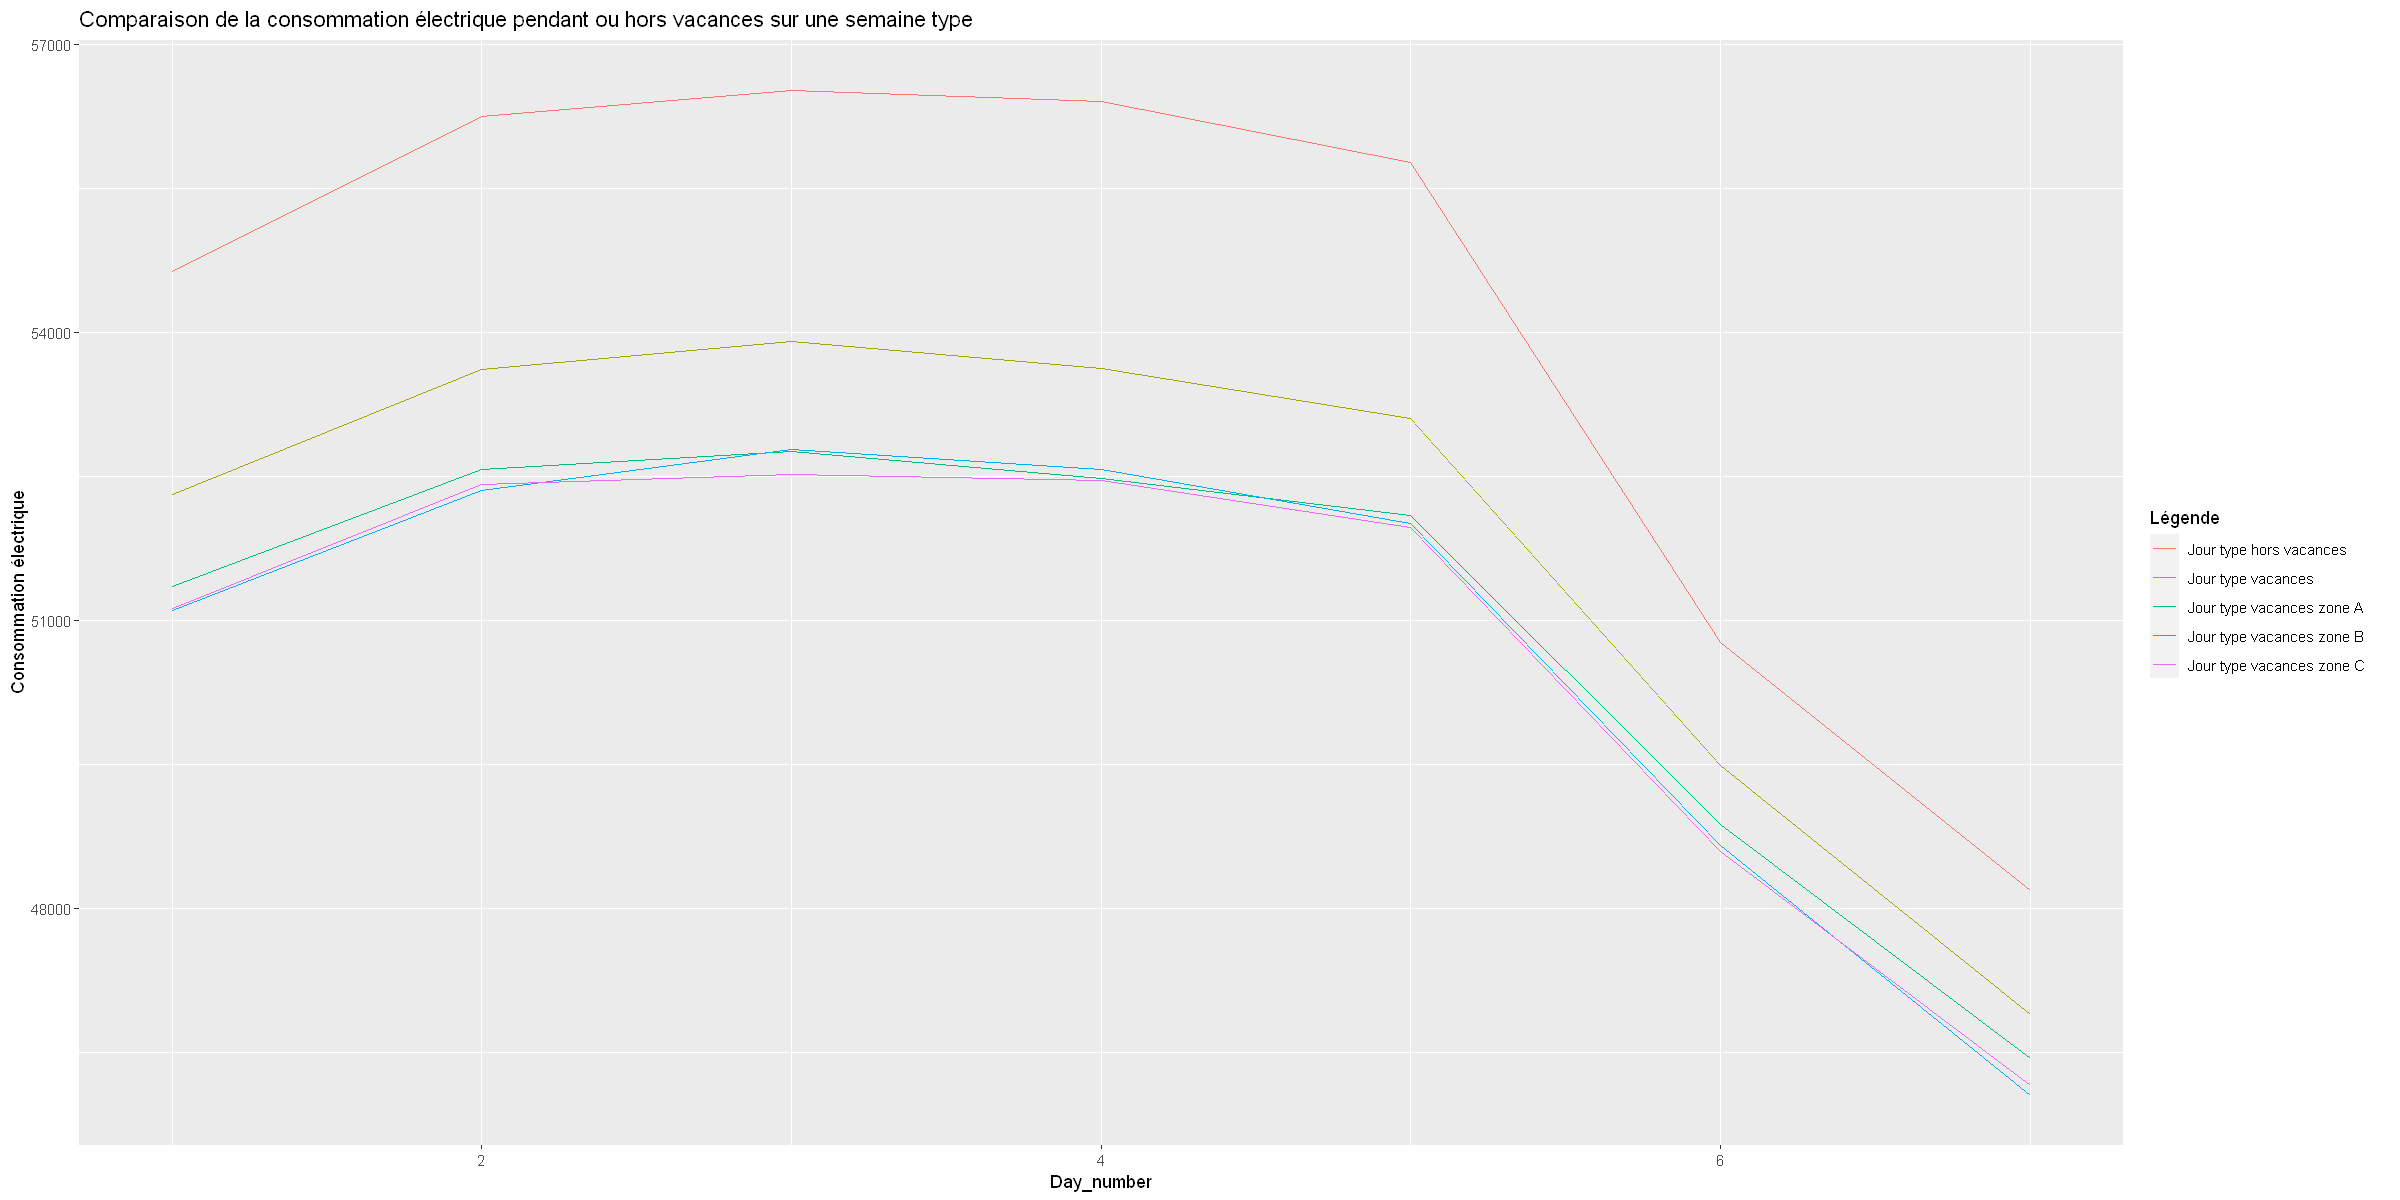

In [68]:
#Représentations graphiques de la consommation électrique hors vacances, et en vacances selon les zones A, B ou C
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_day_type, aes(x=Day_number, y=Consumption, group = 1, color = 'Jour type hors vacances')) + 
    geom_line() +
    geom_line(aes(x=Day_number, y=Consumption_A, colour = 'Jour type vacances zone A')) +
    geom_line(aes(x=Day_number, y=Consumption_B, colour = 'Jour type vacances zone B')) +
    geom_line(aes(x=Day_number, y=Consumption_C, colour = 'Jour type vacances zone C')) +
    geom_line(aes(x=Day_number, y=Consumption_nozone, colour = 'Jour type vacances')) +
    labs(colour = "Légende") +
    labs(title = "Comparaison de la consommation électrique pendant ou hors vacances sur une semaine type") +
    ylab("Consommation électrique")

Comme on pouvait s'y attendre, la consommation électrique est moindre quand on considère chaque zone de vacances individuellement. La diminution de la consommation électrique lors des vacances est semblable entre les zones.

In [69]:
#Pour calculer la variation observée on crée un jour de vacances type zone B
data_train_holidays_B <- data_train %>%
    group_by(Holidays_B) %>%
    summarise_at(vars("Consumption"), mean)
data_train_holidays_B$growth <- with(data_train_holidays_B, ave(Consumption,
                          FUN=function(x) c(NA, diff(x) / tail(x, -1))))
data_train_holidays_B

Holidays_B,Consumption,growth
<int>,<dbl>,<dbl>
0,55889.99,NA
1,50527.50,-0.1061302


Avec plus de précision, on peut donc dire que la consommation électrique diminue en moyenne de 10% lors des vacances scolaires.

##### Etudes des jours ouvrables

In [39]:
#Définition jour ouvrable
data_train <- data_train %>%
  mutate(Jour_ouvrable = case_when(
    data_train$Holidays == 1 ~ 0,
    data_train$jour_ferie != 0 ~ 0,
    data_train$Weekday == "lundi" ~ 1,
    data_train$Weekday == "mardi" ~ 1,
    data_train$Weekday == "mercredi" ~ 1,
    data_train$Weekday == "jeudi" ~ 1,
    data_train$Weekday == "vendredi" ~ 1,
    data_train$Weekday == "samedi" ~ 0,
    data_train$Weekday == "dimanche" ~ 0,
    ))

#Création d'un jour ouvrable type: aggréation par jour ouvrable
data_train_jour_ouvrable <- data_train %>%
    group_by(Jour_ouvrable) %>%
    summarise_at(vars("Consumption"), mean)

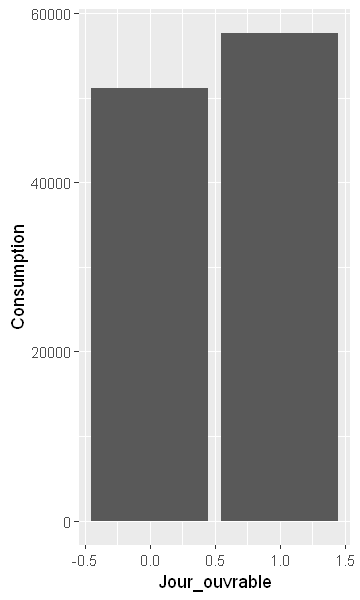

In [71]:
#Consommations électriques cumulées par jour ouvrables entre 2012 et 2020
options(repr.plot.width=3, repr.plot.height=5)
ggplot(data=data_train_jour_ouvrable, aes(x=Jour_ouvrable, y=Consumption)) + geom_bar(stat="identity")

In [72]:
#Calcul de la variation observée
data_train_jour_ouvrable$growth <- with(data_train_jour_ouvrable, ave(Consumption,
                          FUN=function(x) c(NA, diff(x) / tail(x, -1))))
data_train_jour_ouvrable

Jour_ouvrable,Consumption,growth
<dbl>,<dbl>,<dbl>
0,51199.77,NA
1,57675.21,0.1122743


En moyenne, la consommation électrique est supérieure de 11% en jour ouvrable.

###### Etude de l'activité économique

In [12]:
#Téléchargement d'un indice de production industrielle sur le site de l'INSEE
prod_ind <- read.csv("indice_production_industrielle.csv", sep= ";")
prod_ind <- subset(prod_ind, select=c(1,2))
colnames(prod_ind) <- c("Date","Indice_prod")
prod_ind$Year <- substr(prod_ind$Date,1,4)
prod_ind$Month <- substr(prod_ind$Date,6,7)
prod_ind = subset(prod_ind, select = -c(Date) )

In [13]:
#Création d'une base de données avec une ligne par mois (consommations électriques sommées), pour éviter d'avoir des données dupliquées
data_train_month_mean <- data_train %>%
    group_by(Year,Month) %>%
    summarise_at(vars("Consumption"), sum)

#Fusion des 2 bases
data_train_month_mean = left_join(data_train_month_mean, prod_ind ,c("Year","Month"))

#Consommation et indice de production normalisés
data_train_month_mean$Indice_prod_normalized <- (data_train_month_mean$Indice_prod - mean(data_train_month_mean$Indice_prod)) / sd(data_train_month_mean$Indice_prod)
data_train_month_mean$Consumption_normalized <- (data_train_month_mean$Consumption - mean(data_train_month_mean$Consumption)) / sd(data_train_month_mean$Consumption)

In [14]:
#Ajout d'une variable Date
data_train_month_mean$Date <- paste(data_train_month_mean$Year, data_train_month_mean$Month, sep="-")
data_train_month_mean$Date <- paste0(data_train_month_mean$Date,'-01')
data_train_month_mean$Date <- as.Date(data_train_month_mean$Date, format = "%Y-%m-%d")

`geom_smooth()` using formula 'y ~ x'



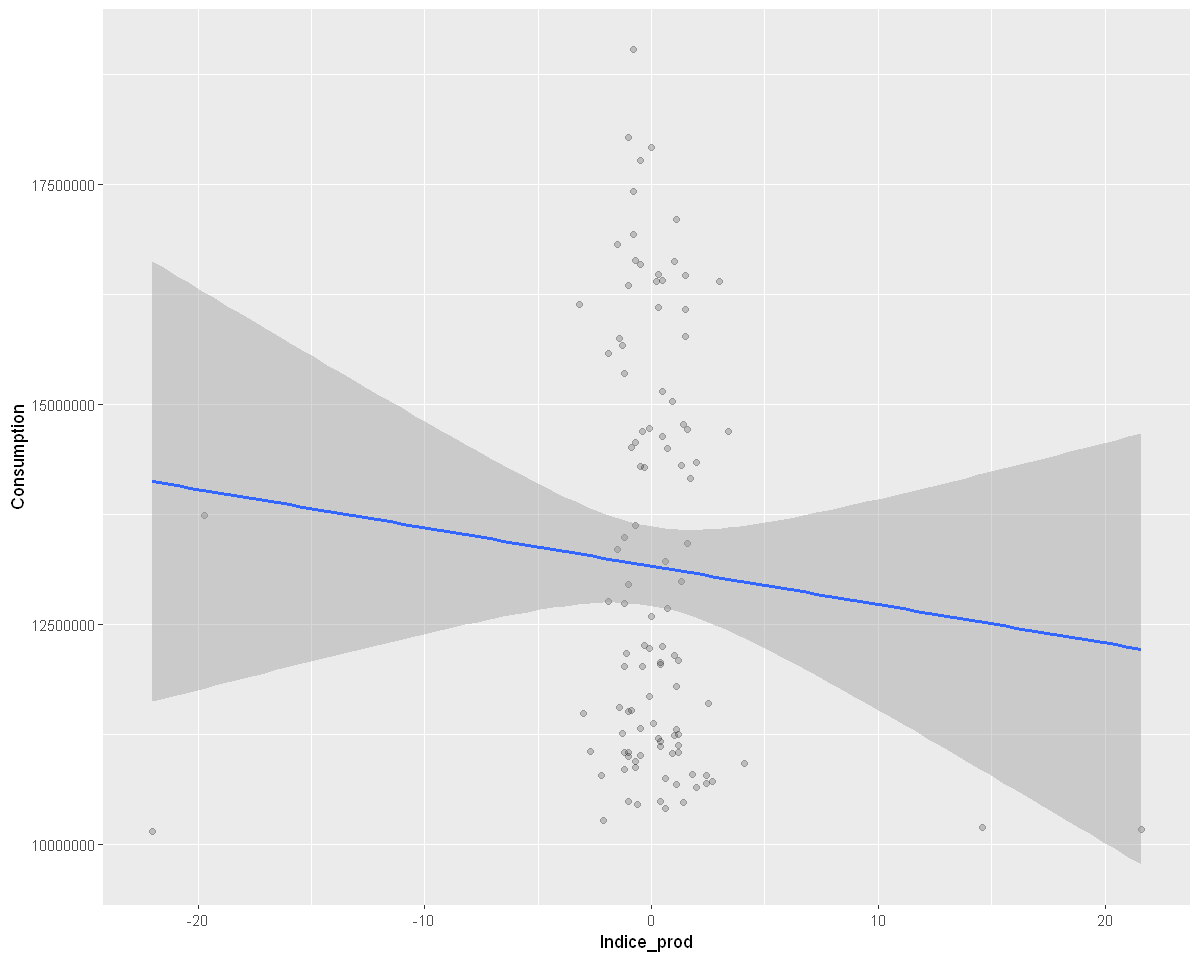

In [17]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data_train_month_mean, aes(x = Indice_prod, y = Consumption)) +geom_point(alpha = 0.2) + geom_smooth(method = "lm")
#Faible corrélation négative

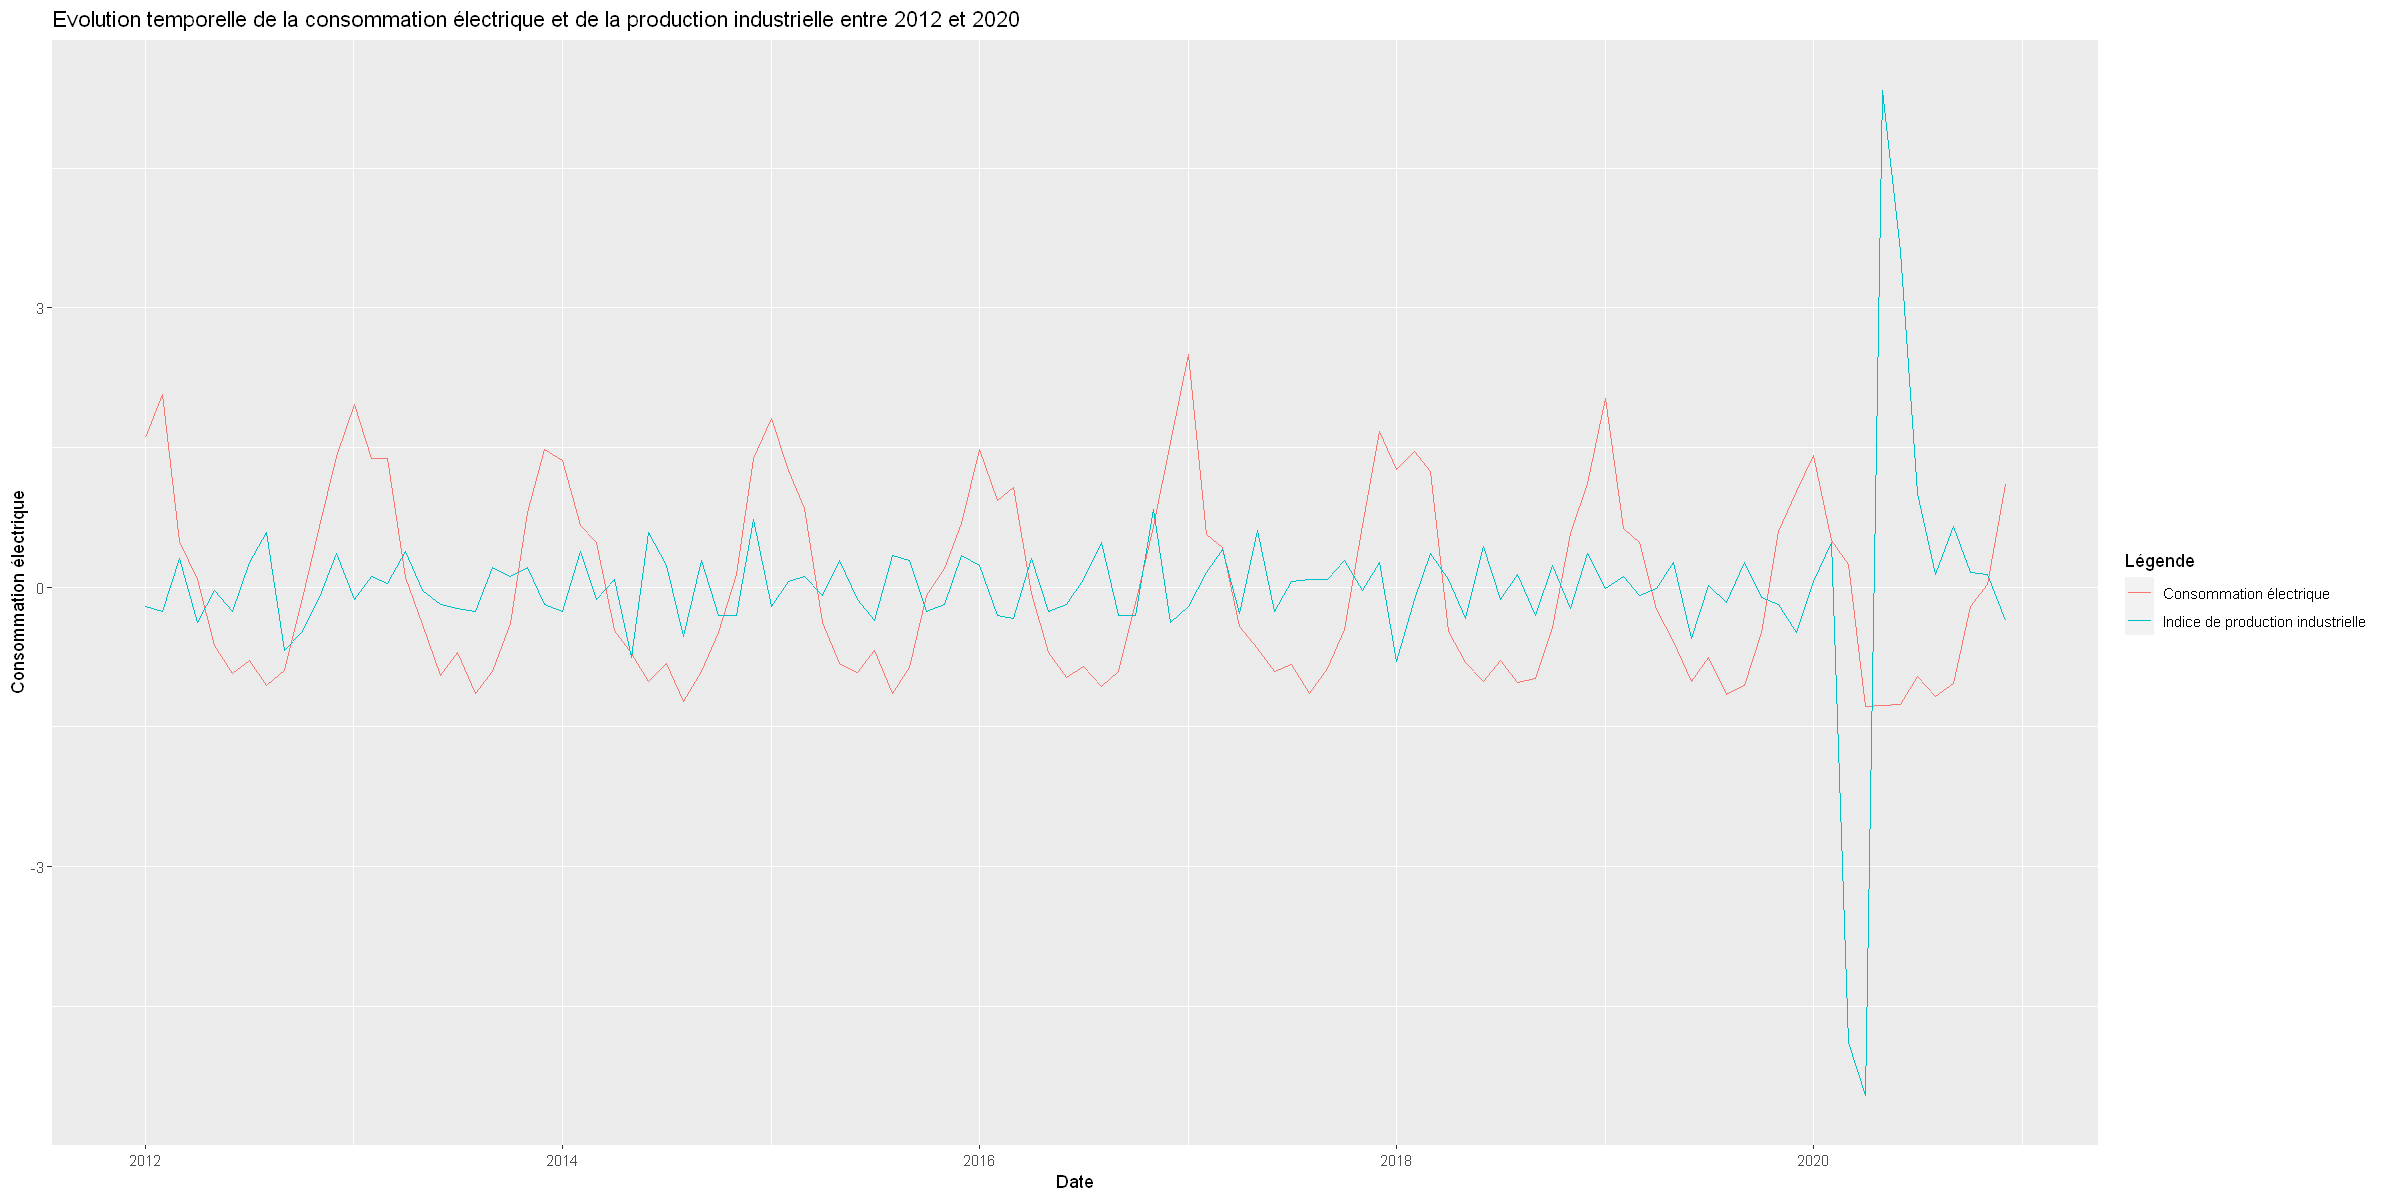

In [20]:
#Représentations graphiques de l'évolution temporelle de la consommmation électrique et de la représentation industrielle
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_month_mean, aes(x=Date, y=Consumption_normalized, group = 1, color = 'Consommation électrique')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Indice_prod_normalized, colour = 'Indice de production industrielle')) +
    labs(colour = "Légende") +
    labs(title = "Evolution temporelle de la consommation électrique et de la production industrielle entre 2012 et 2020") +
    ylab("Consommation électrique")

Nous n'observons pas de corrélation particulière entre la consommation électrique et la production industrielle, et donc avec l'activité économique.

###### Etude des événements exceptionnels

Par exemple, étudions l'incidence du covid sur l'année 2020, par rapport aux années antérieures

In [73]:
#Création d'une année type avec données entre 2012 et 2019
data_train_no2020 <- subset(data_train, Year!=2020)
data_train_no2020 <- data_train_no2020 %>% group_by(Day,Month) %>%  summarise_at(vars("Consumption"), mean)
data_train_no2020 = rename(data_train_no2020, Consumption_no2020 = Consumption)

#Base de données 2020
data_train_2020 <- subset(data_train, Year==2020)
data_train_2020 <- data_train_2020 %>% group_by(Day,Month) %>%  summarise_at(vars("Consumption"), mean)
data_train_2020 = rename(data_train_2020, Consumption_2020 = Consumption)

#Fusion des 2 bases pour réaliser le graphique
data_train_ev_ex <- left_join(data_train_no2020,data_train_2020, by=c("Day","Month"))

data_train_ev_ex$Date = paste(data_train_ev_ex$Month, data_train_ev_ex$Day, sep="-")
data_train_ev_ex$Date = as.Date(data_train_ev_ex$Date, format = "%m-%d")
data_train_ev_ex <- data_train_ev_ex %>% select(Date, everything())
data_train_ev_ex <- data_train_ev_ex %>% drop_na()

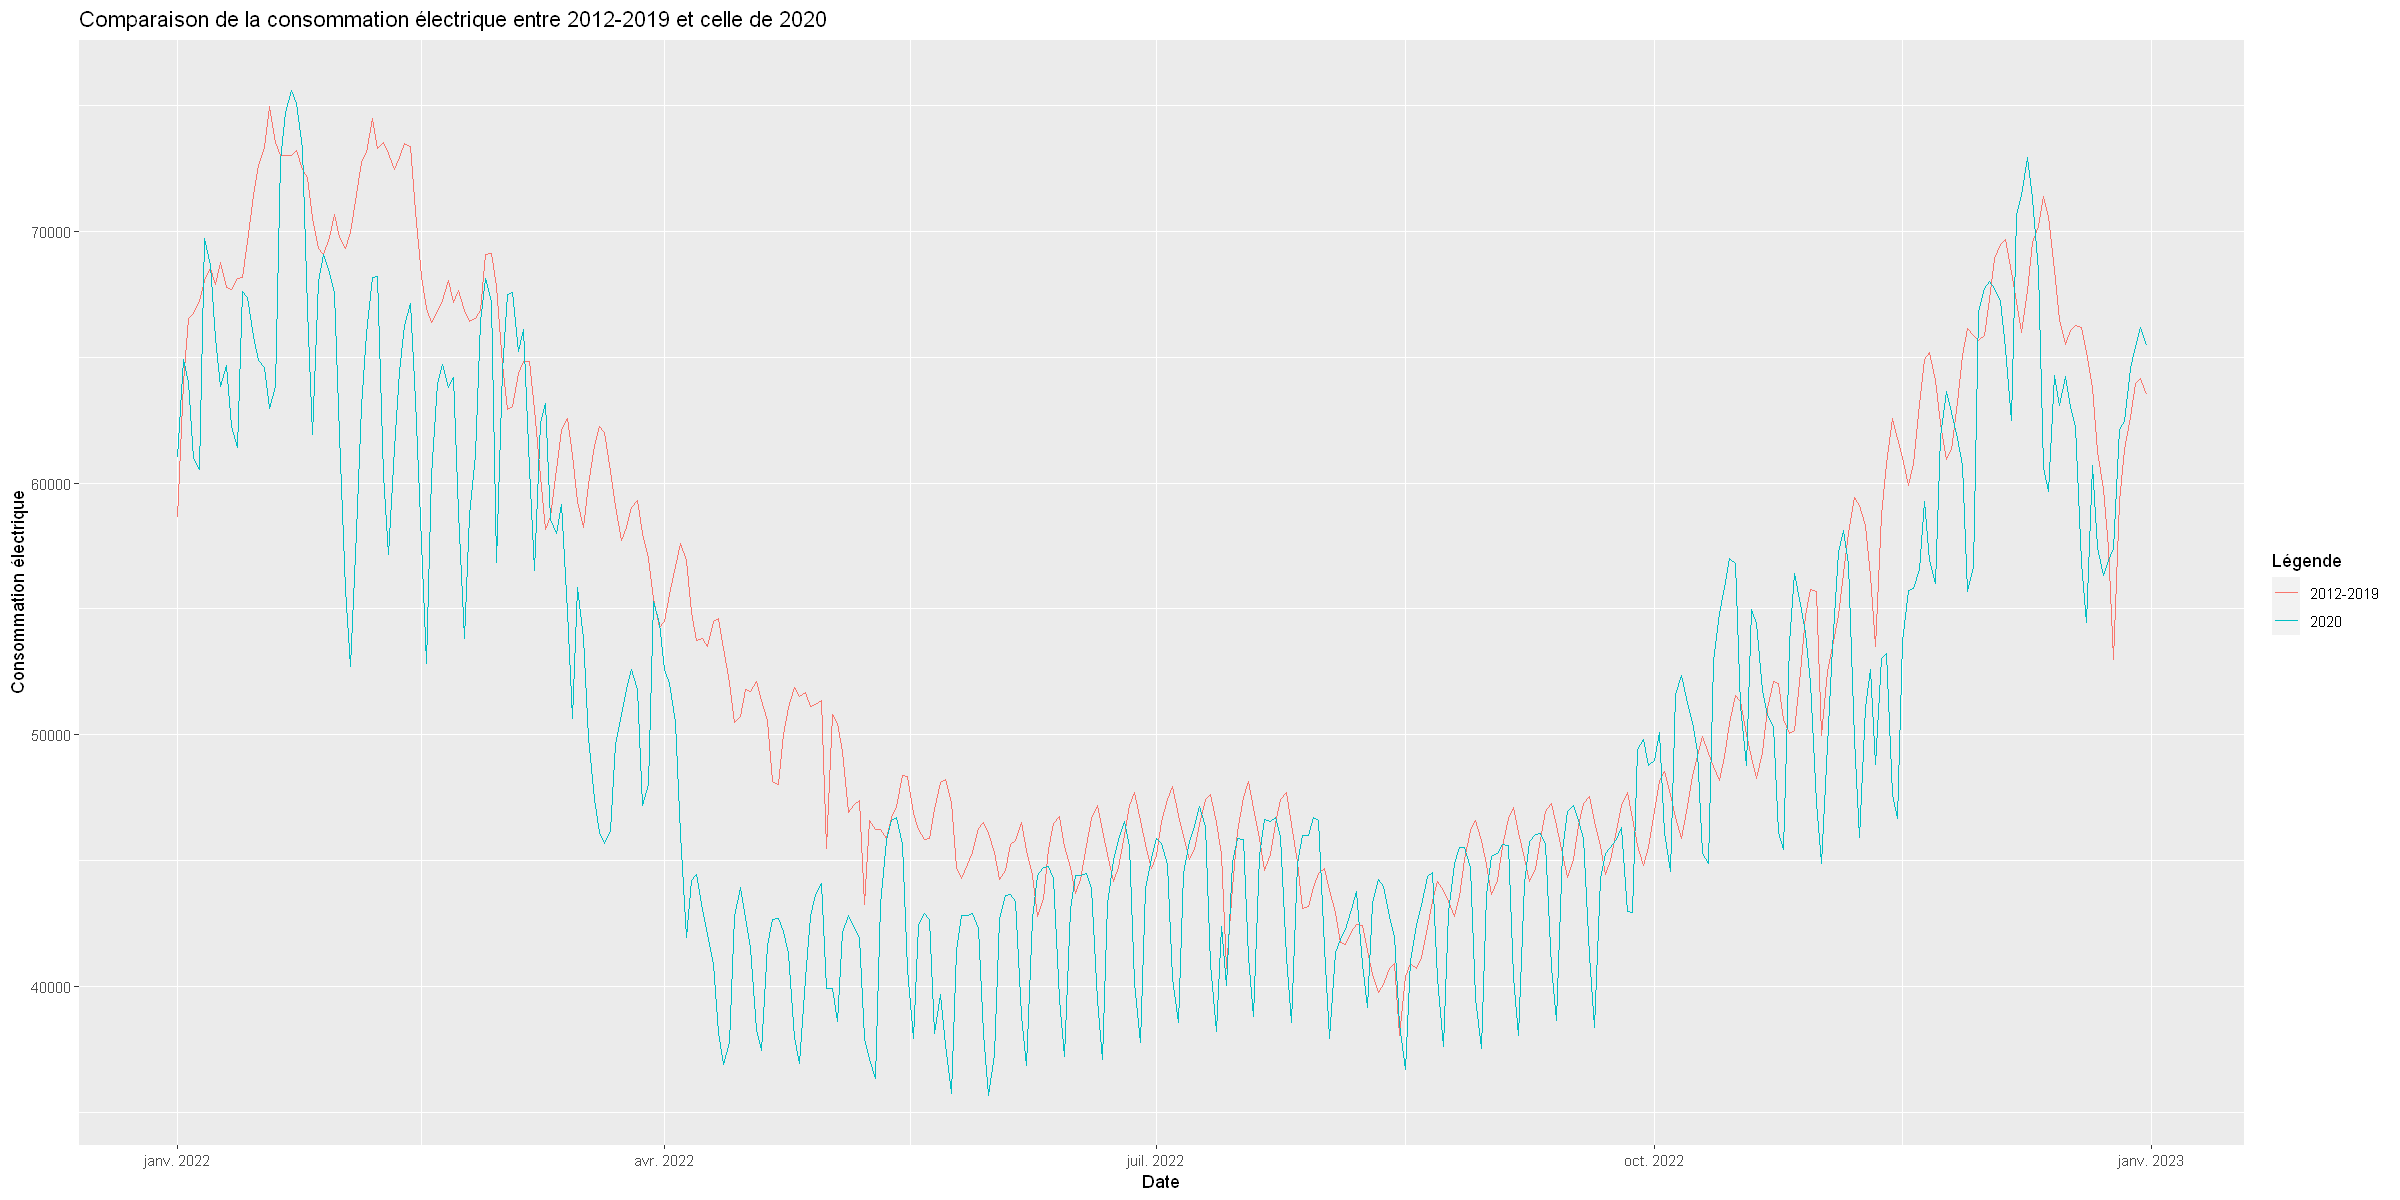

In [74]:
#Représentation graphique de la consommmation électrique en 2020, par rapport à la consommation électrique moyenne des autres années (2012-2019)
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data_train_ev_ex, aes(x=Date, y=Consumption_no2020, group = 1, color = '2012-2019')) + 
    geom_line() +
    geom_line(aes(x=Date, y=Consumption_2020, colour = '2020')) +
    labs(colour = "Légende") +
    labs(title = "Comparaison de la consommation électrique entre 2012-2019 et celle de 2020") +
    ylab("Consommation électrique")

On remarque nettement une forte diminution de la consommation électrique en 2020 par rapport à la moyenne 2012-2019 à partir de mars 2020 et puis un "retour à la normal" à partir de juin-juillet 2020

##### Température lissée, retardée ??

Demander définitions à Margaux 

### Régression linéaire

### Régression linéaire pénalisée (régression Ridge, régression Lasso)

### Modèles GAM

In [24]:
library(mgcv)
library(mgcViz)
library(visreg)

Warning message:
"le package 'mgcv' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : nlme

Warning message:
"le package 'nlme' a été compilé avec la version R 4.1.3"

Attachement du package : 'nlme'


L'objet suivant est masqué depuis 'package:dplyr':

    collapse


This is mgcv 1.8-39. For overview type 'help("mgcv-package")'.

Warning message:
"le package 'mgcViz' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : qgam

Warning message:
"le package 'qgam' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Registered S3 method overwritten by 'mgcViz':
  method from  
  +.gg   GGally


Attachement du package : 'mgcViz'


Les objets suivants sont masqués depuis 'package:stats':

    qqline, qqnorm, qqplot


Warning message:
"le package 'visreg' a été compilé avec la version R 4.1.3"


##### 1er exemple: variables explicatives = Temperature, Humidity, Nébulosité

In [19]:
mod_lm1 <- lm(Consumption ~ Temperature + Humidity + Nebulosity, data=data_train)
summary(mod_lm1)


Family: gaussian 
Link function: identity 

Formula:
Consumption ~ Temperature + Humidity + Nebulosity

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 128573.784    658.149  195.36   <2e-16 ***
Temperature  -2201.469     13.589 -162.00   <2e-16 ***
Humidity      -692.204      7.111  -97.34   <2e-16 ***
Nebulosity     136.924      3.414   40.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


R-sq.(adj) =  0.519   Deviance explained = 51.9%
GCV = 6.8683e+07  Scale est. = 6.8673e+07  n = 26286

Toutes les variables explicatives sont significatives.

In [80]:
#Modèle GAM
mod_gam1 <- gam(Consumption ~ s(Temperature, bs="cr", k=6) + s(Humidity, bs="cr", k=6) + s(Nebulosity, bs="cr", k=6), data=data_train)
summary(mod_gam1)
#Varier les paramètres de lissage ne change pas les résultats...


Family: gaussian 
Link function: identity 

Formula:
Consumption ~ s(Temperature, bs = "cr", k = 6) + s(Humidity, 
    bs = "cr", k = 6) + s(Nebulosity, bs = "cr", k = 6)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 54075.36      46.59    1161   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df      F p-value    
s(Temperature) 4.895  4.994 6953.3  <2e-16 ***
s(Humidity)    4.936  4.998 1705.1  <2e-16 ***
s(Nebulosity)  4.929  4.997  486.2  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.601   Deviance explained = 60.1%
GCV = 5.7086e+07  Scale est. = 5.7051e+07  n = 26286

Toutes les variables explicatives paramétriques et non-linéaires sont significatives au seuil de 1%.


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 10 iterations.
The RMS GCV score gradient at convergence was 21.58496 .
The Hessian was positive definite.
Model rank =  16 / 16 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                 k'  edf k-index p-value
s(Temperature) 5.00 4.90    1.01    0.71
s(Humidity)    5.00 4.94    0.99    0.12
s(Nebulosity)  5.00 4.93    1.03    0.95


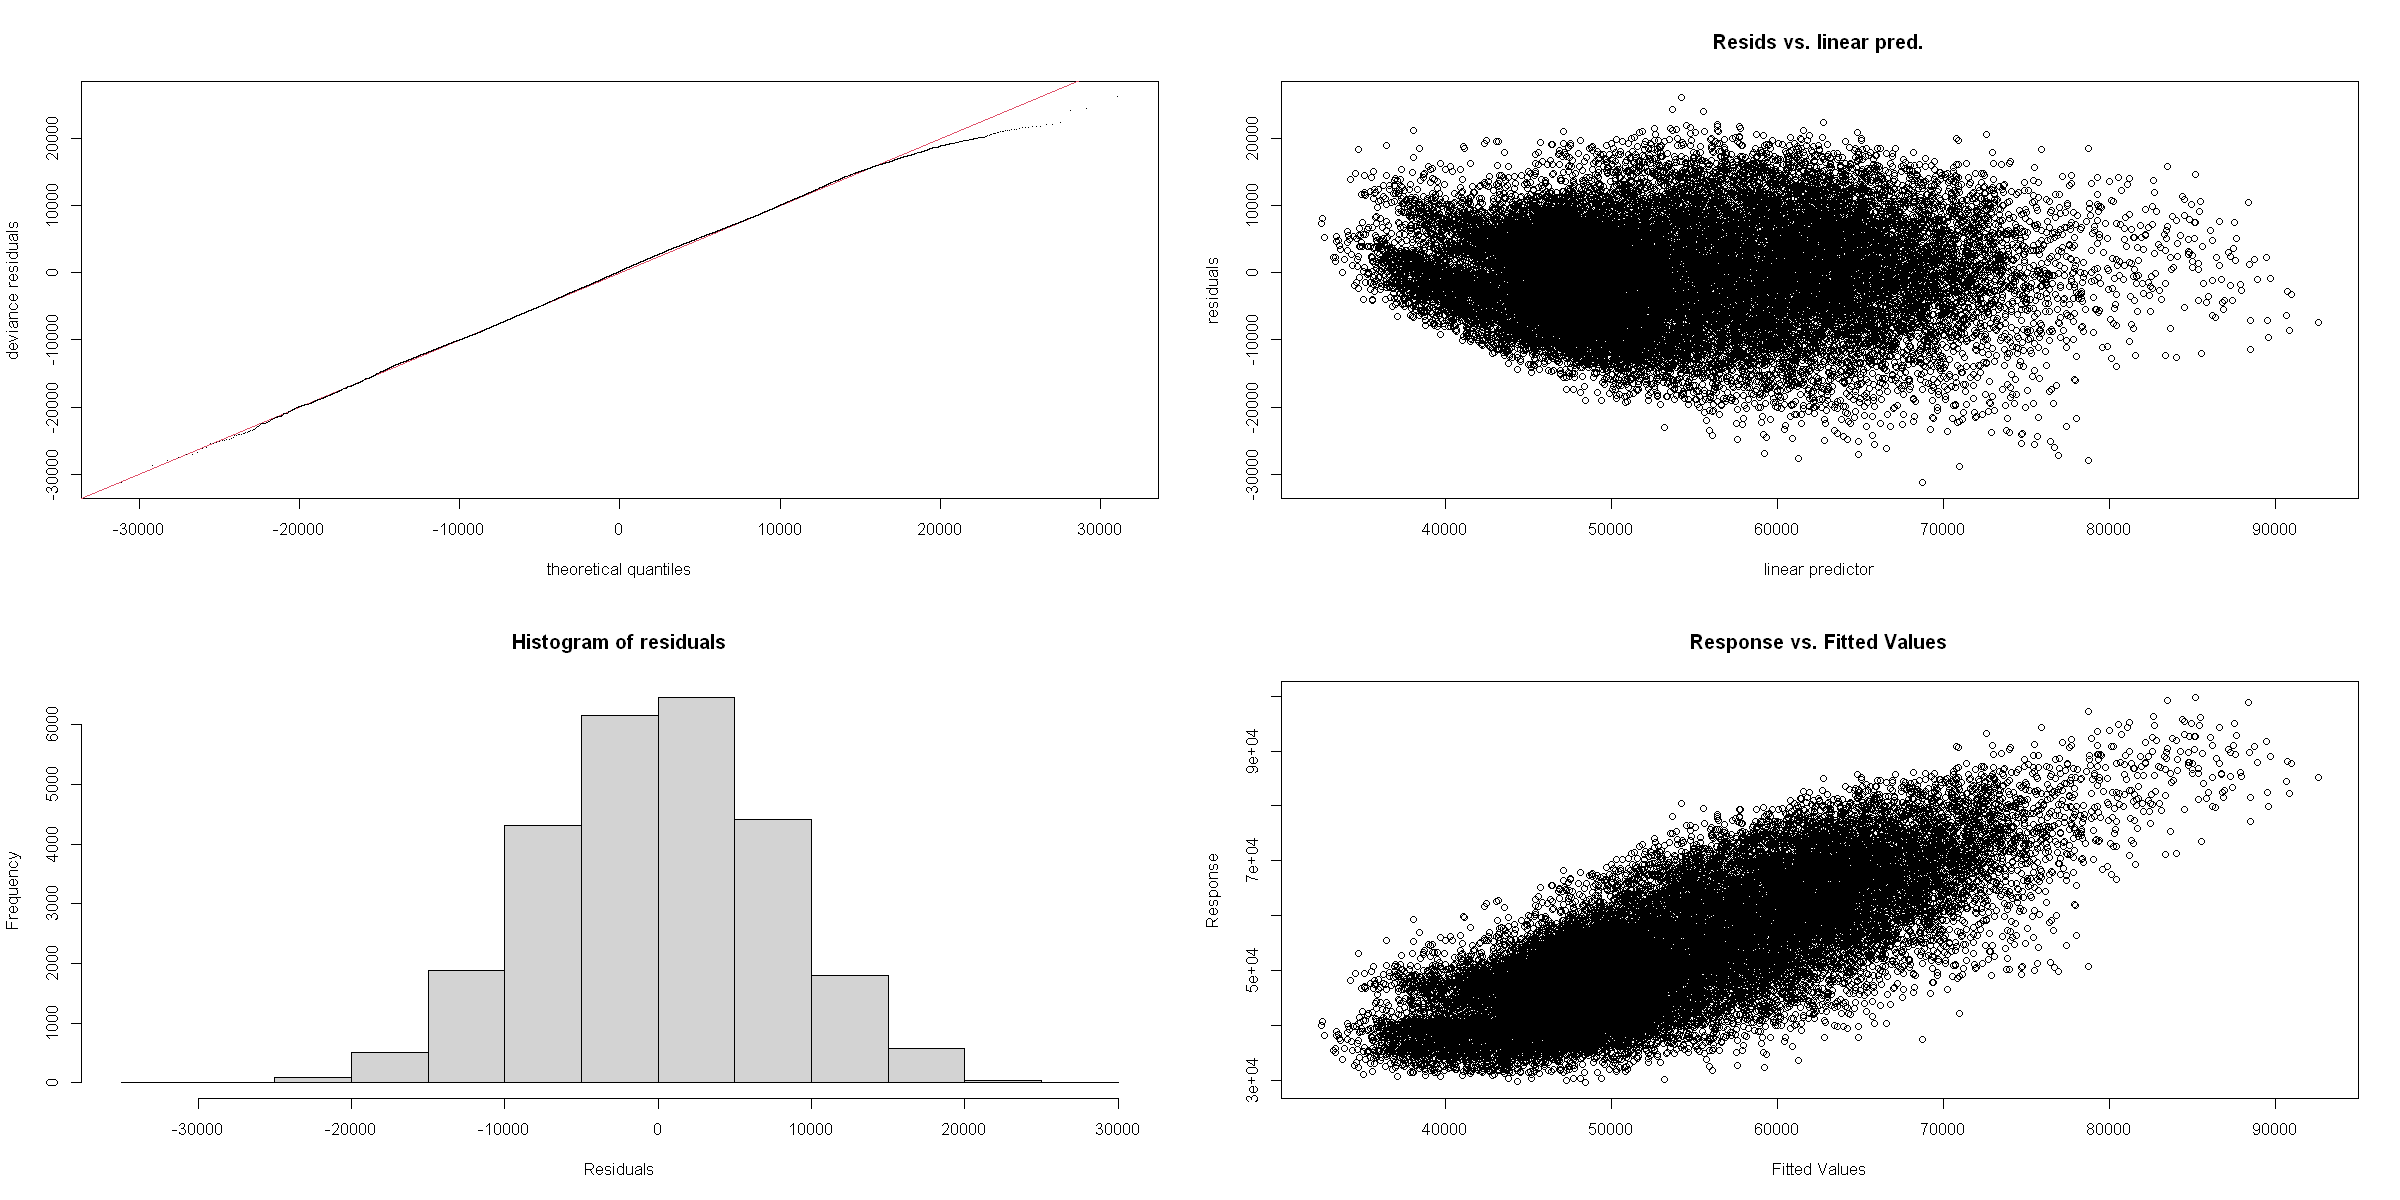

In [81]:
#Vérification GAM pour savoir si le k a bien été choisi
gam.check(mod_gam1) #k trop petit pour la variable Humidity

In [82]:
gam(residuals(mod_gam1)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57029431     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57029431     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57029431     


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 10 iterations.
The RMS GCV score gradient at convergence was 23.77132 .
The Hessian was positive definite.
Model rank =  22 / 22 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'   edf k-index p-value
s(Temperature)  5.00  4.90    1.00    0.38
s(Humidity)    11.00  6.81    0.99    0.27
s(Nebulosity)   5.00  4.93    0.99    0.23



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57030984     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57030984     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57030984     

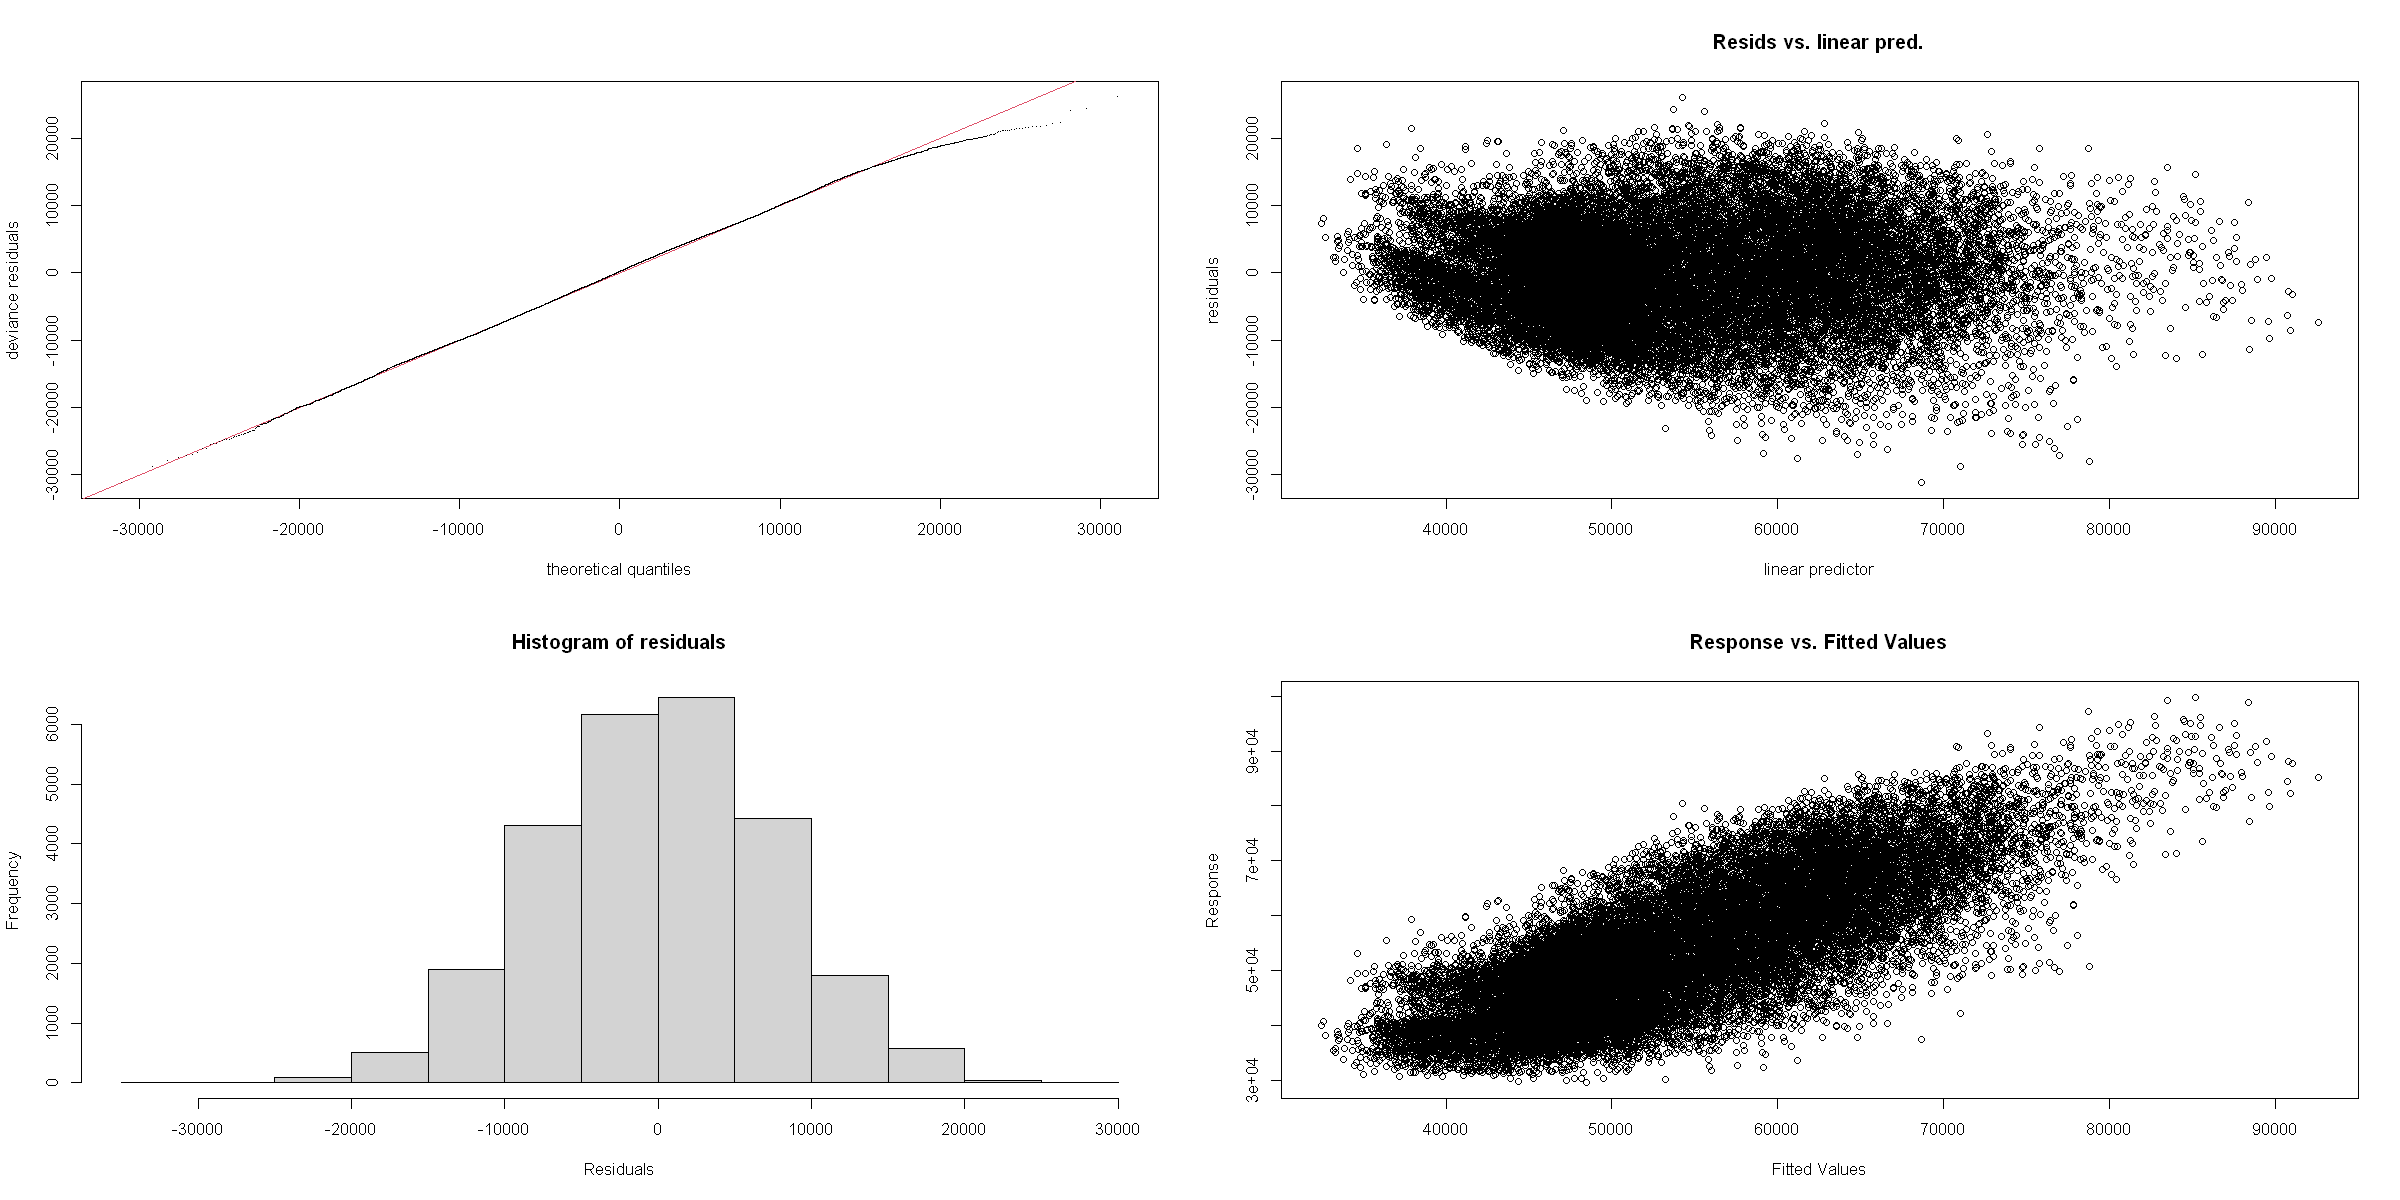

In [83]:
#Changement de k pour la variable Humidity
mod_gam1 <- gam(Consumption ~ s(Temperature, bs="cr", k=6) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=6), data=data_train)
gam.check(mod_gam1) #k trop petit pour la variable Nebulosity
gam(residuals(mod_gam1)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 10 iterations.
The RMS GCV score gradient at convergence was 23.64208 .
The Hessian was positive definite.
Model rank =  28 / 28 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'   edf k-index p-value
s(Temperature)  5.00  4.90    0.99    0.17
s(Humidity)    11.00  6.81    1.00    0.40
s(Nebulosity)  11.00  7.91    0.99    0.14



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57021629     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57021629     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57021629     

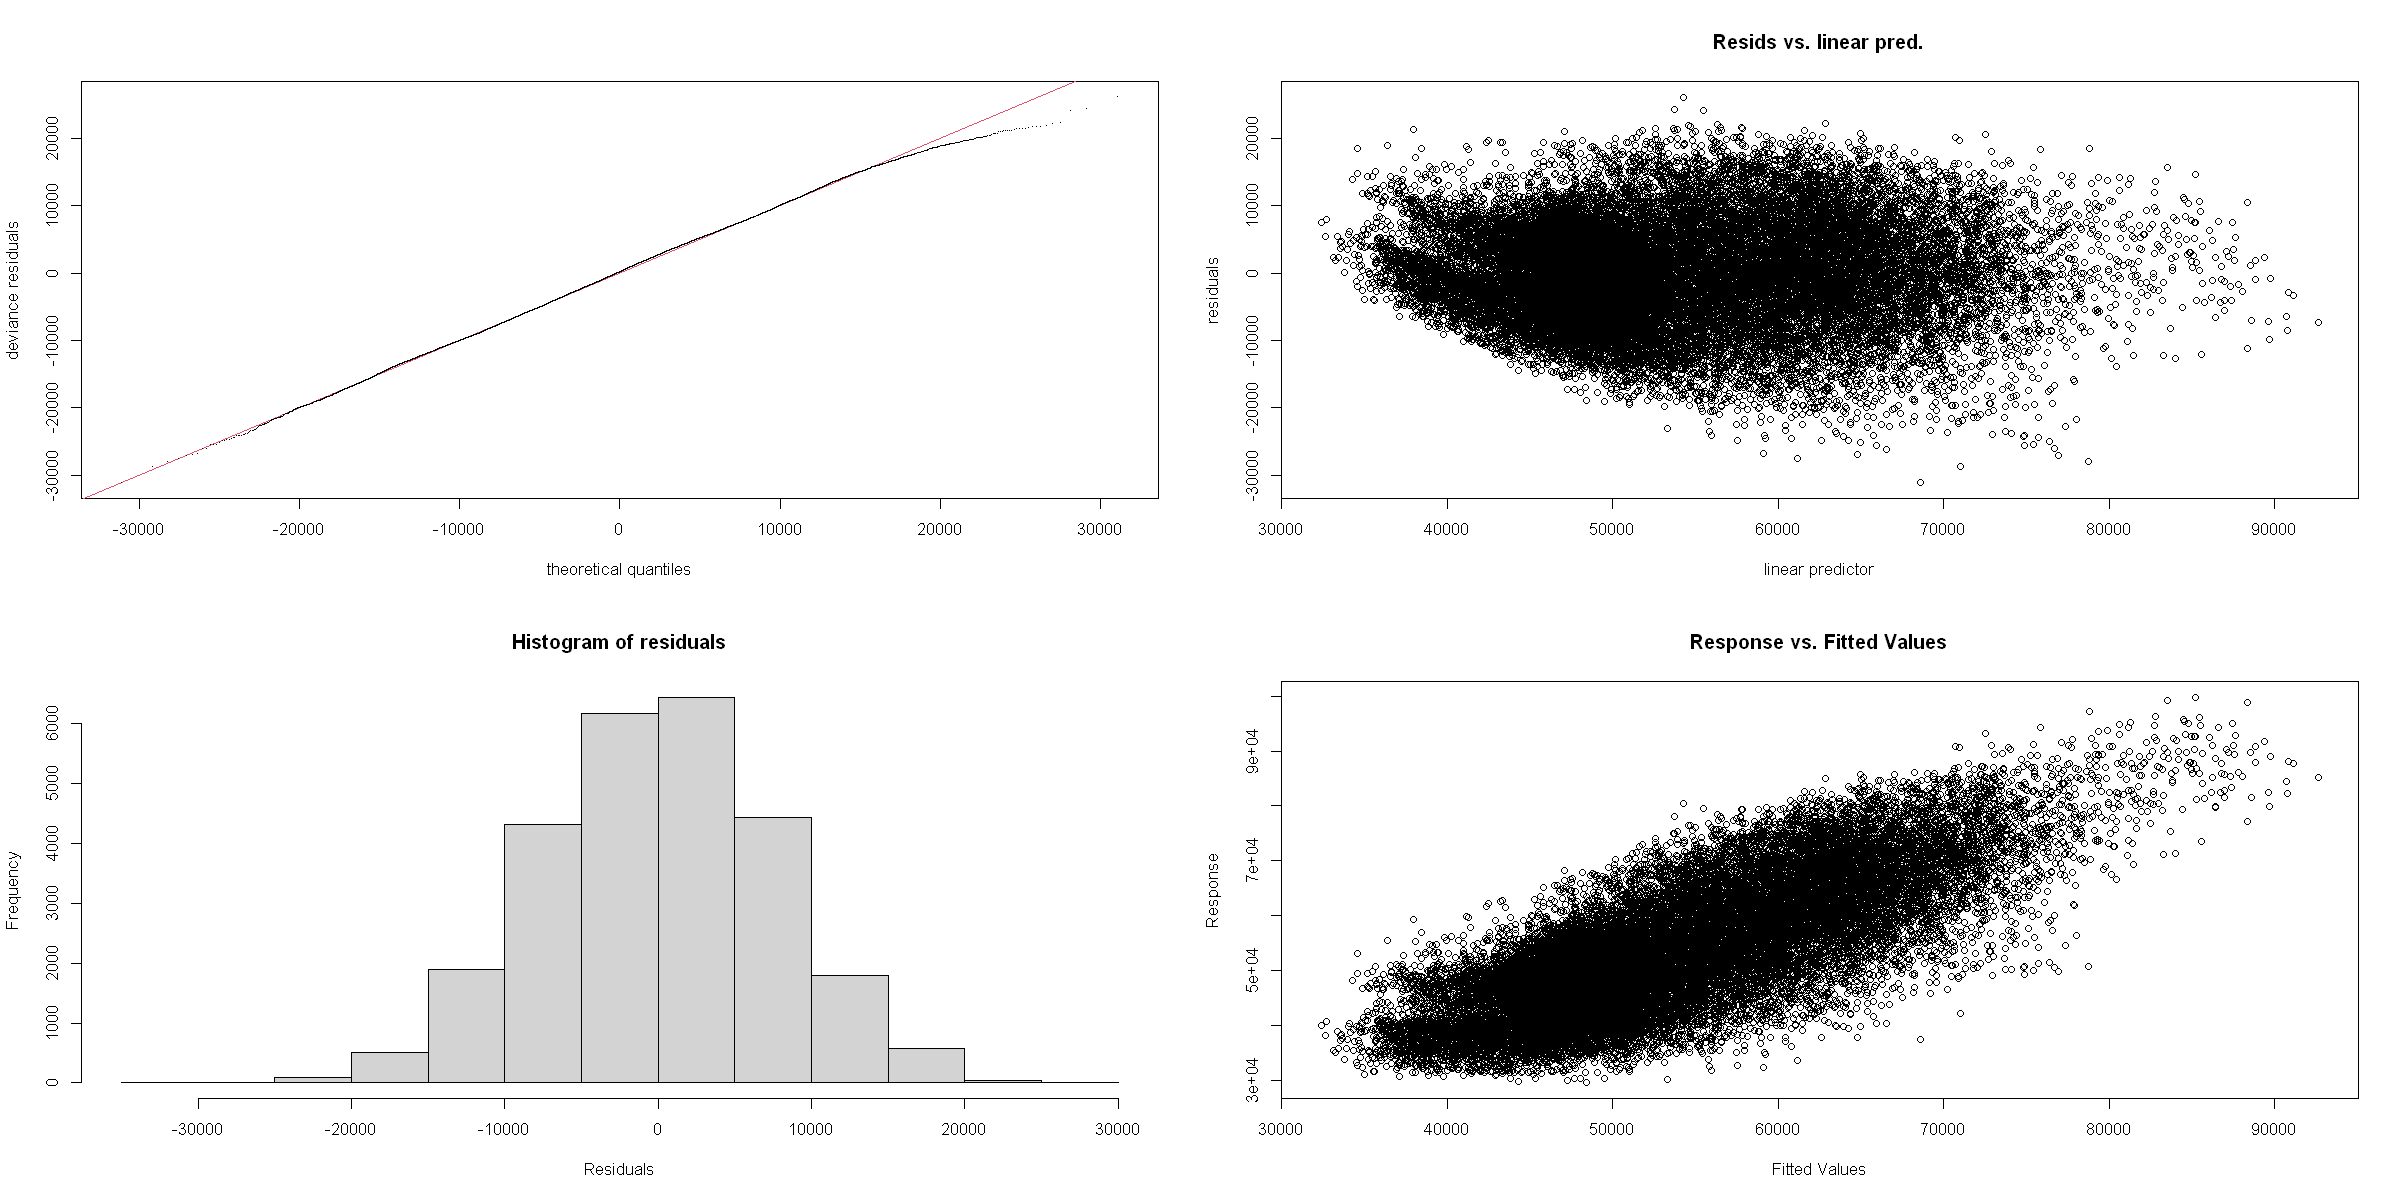

In [84]:
#Changement de k pour la variable Humidity
mod_gam1 <- gam(Consumption ~ s(Temperature, bs="cr", k=6) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=12), data=data_train)
gam.check(mod_gam1) #k trop petit pour la variable Temperature
gam(residuals(mod_gam1)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 4 iterations.
The RMS GCV score gradient at convergence was 83.69763 .
The Hessian was positive definite.
Model rank =  34 / 34 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'   edf k-index p-value
s(Temperature) 11.00  7.45    0.99    0.21
s(Humidity)    11.00  6.80    1.00    0.48
s(Nebulosity)  11.00  7.98    1.01    0.72



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57004612     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57004612     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam1) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 57004612     

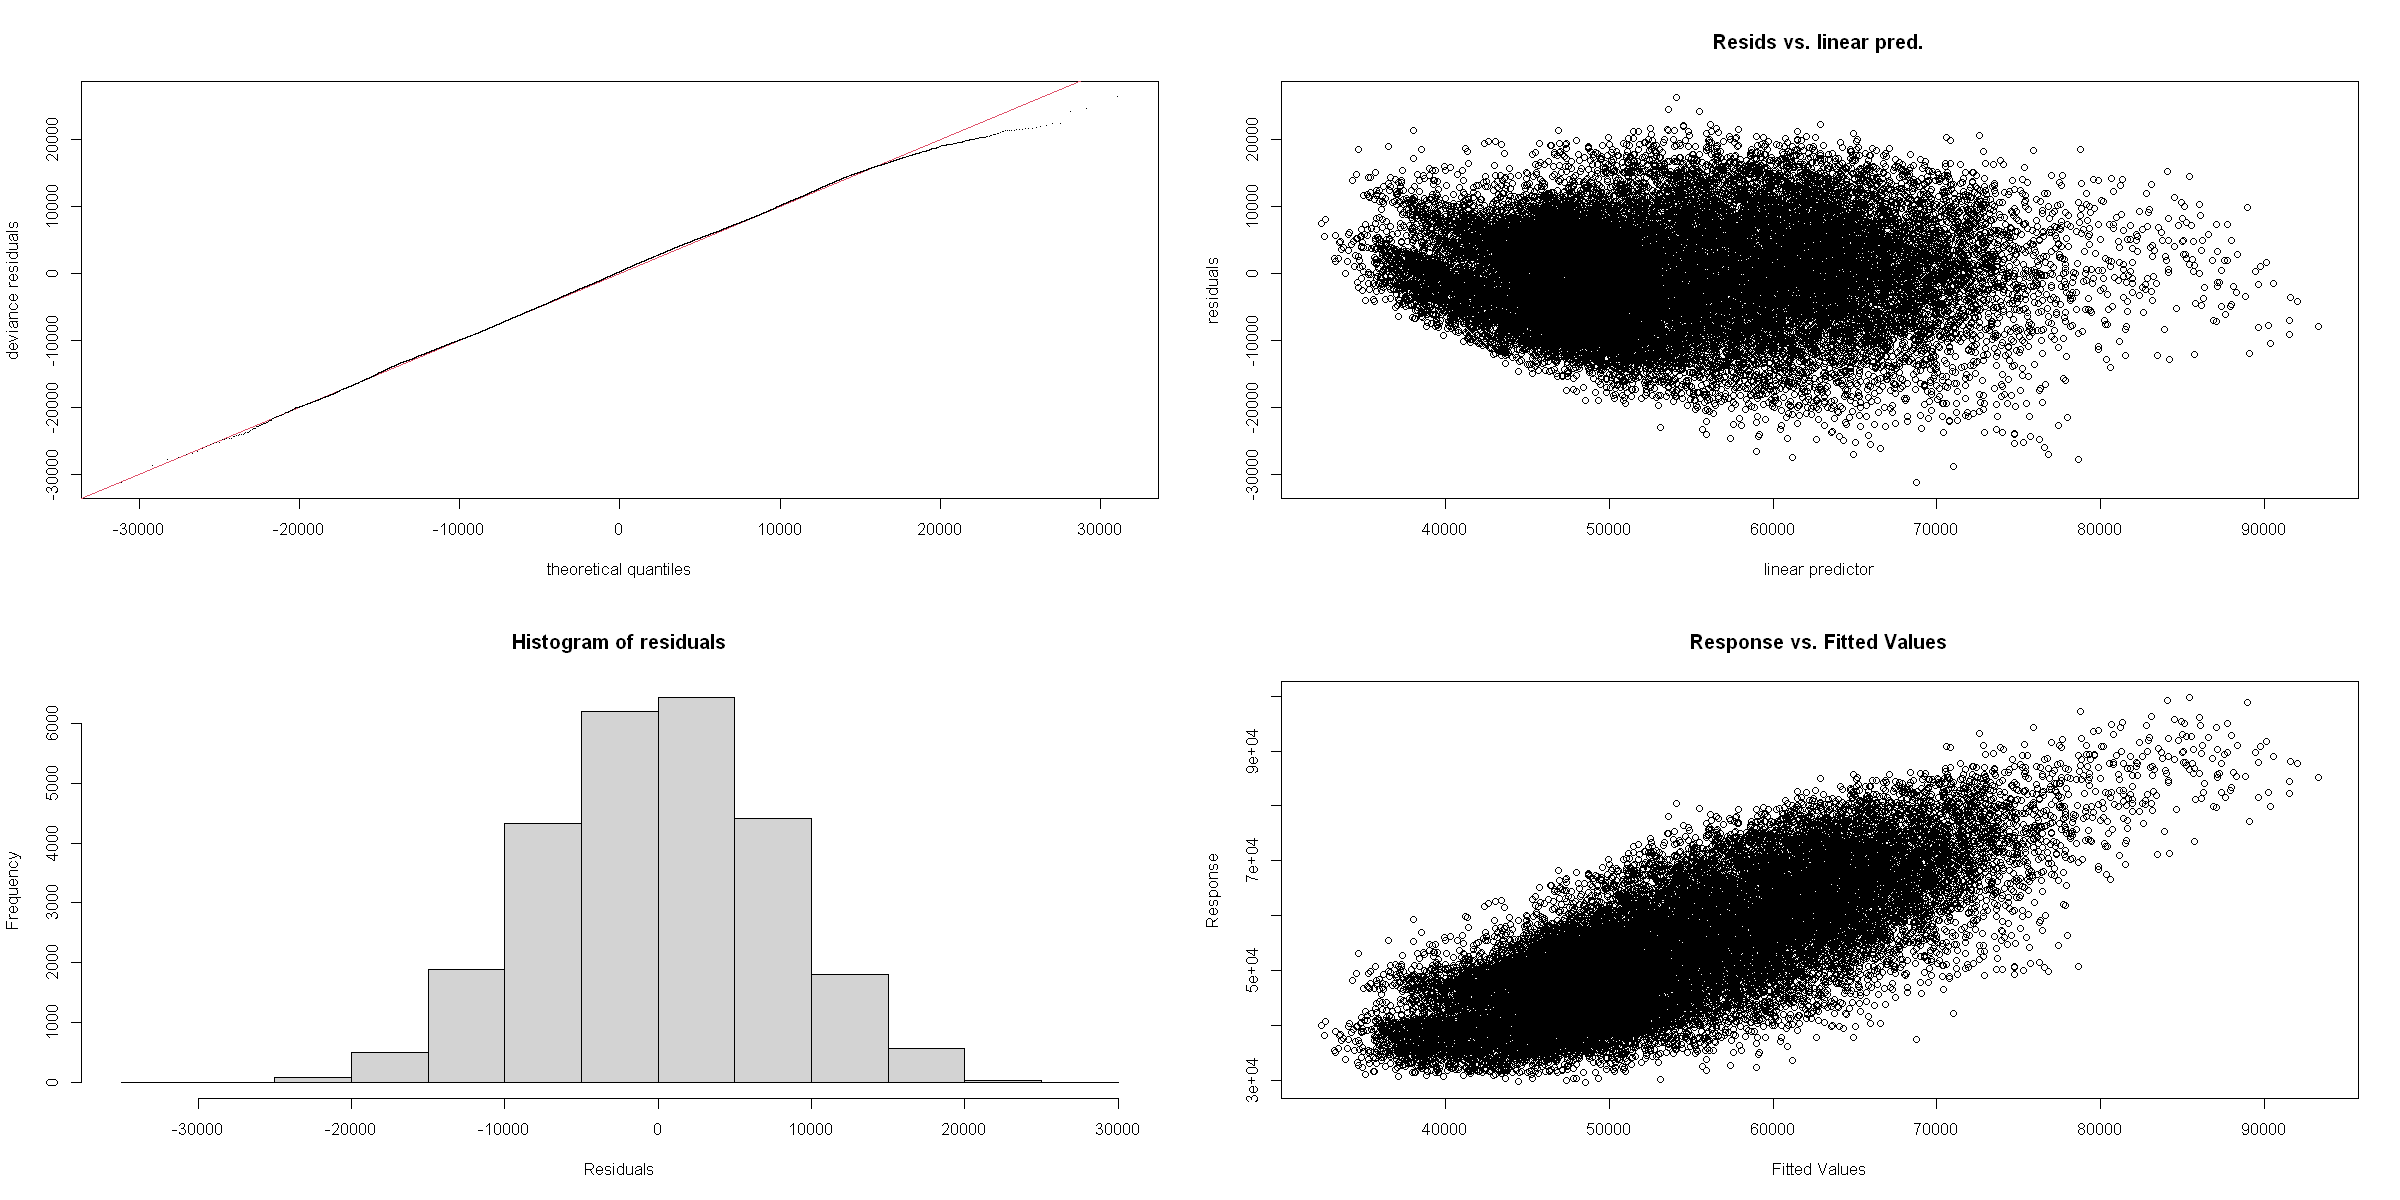

In [85]:
#Changement de k pour la variable Temperature
mod_gam1 <- gam(Consumption ~ s(Temperature, bs="cr", k=12) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=12), data=data_train)
gam.check(mod_gam1) #ok
gam(residuals(mod_gam1)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam1)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok

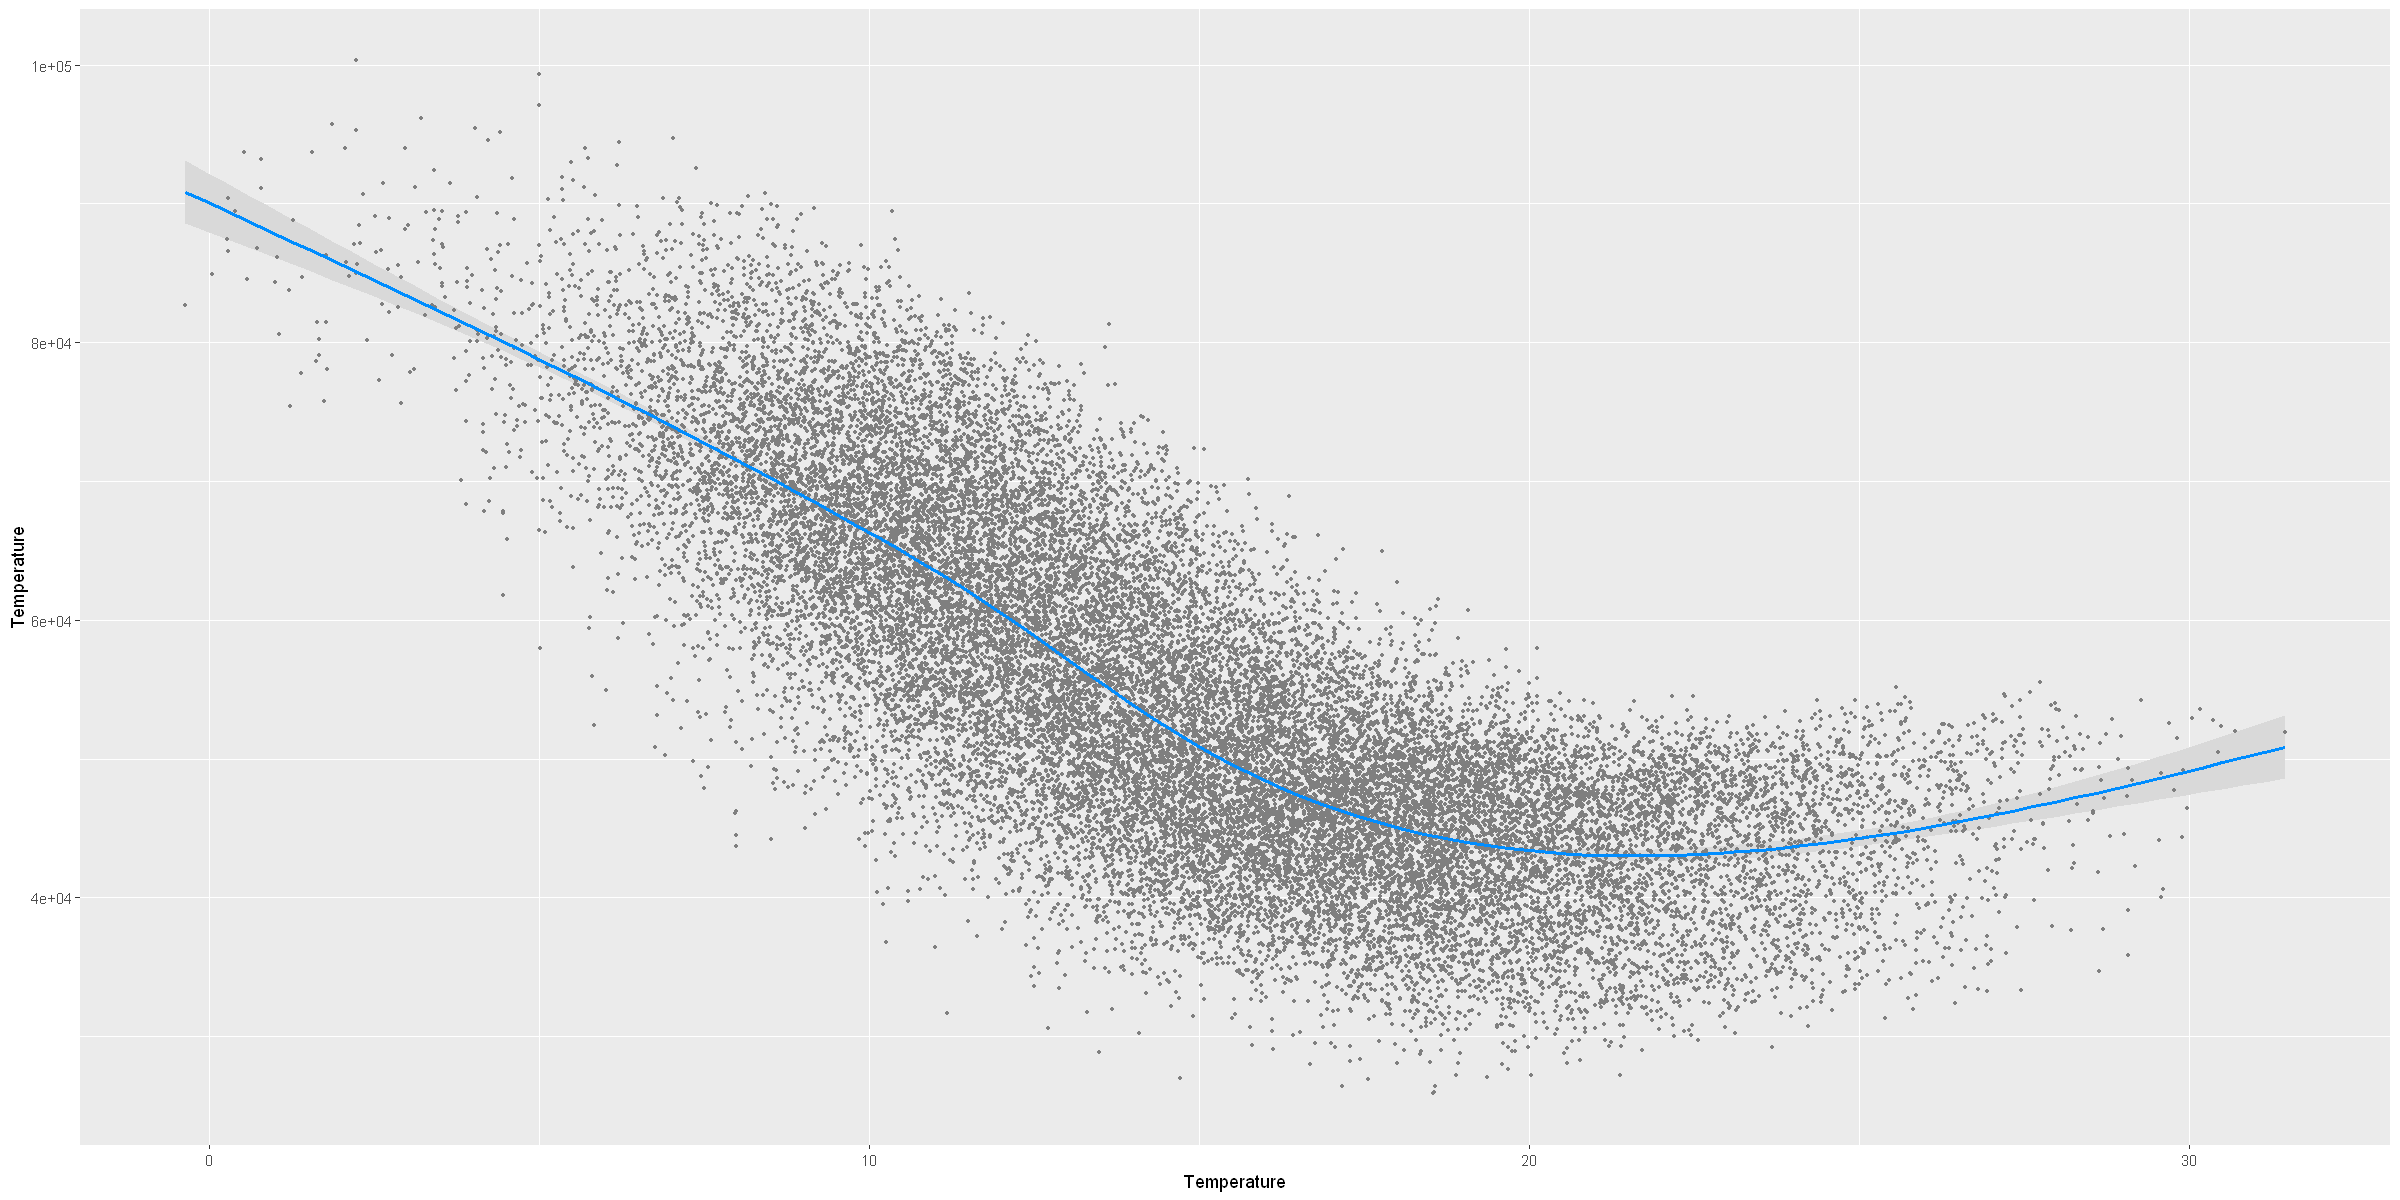

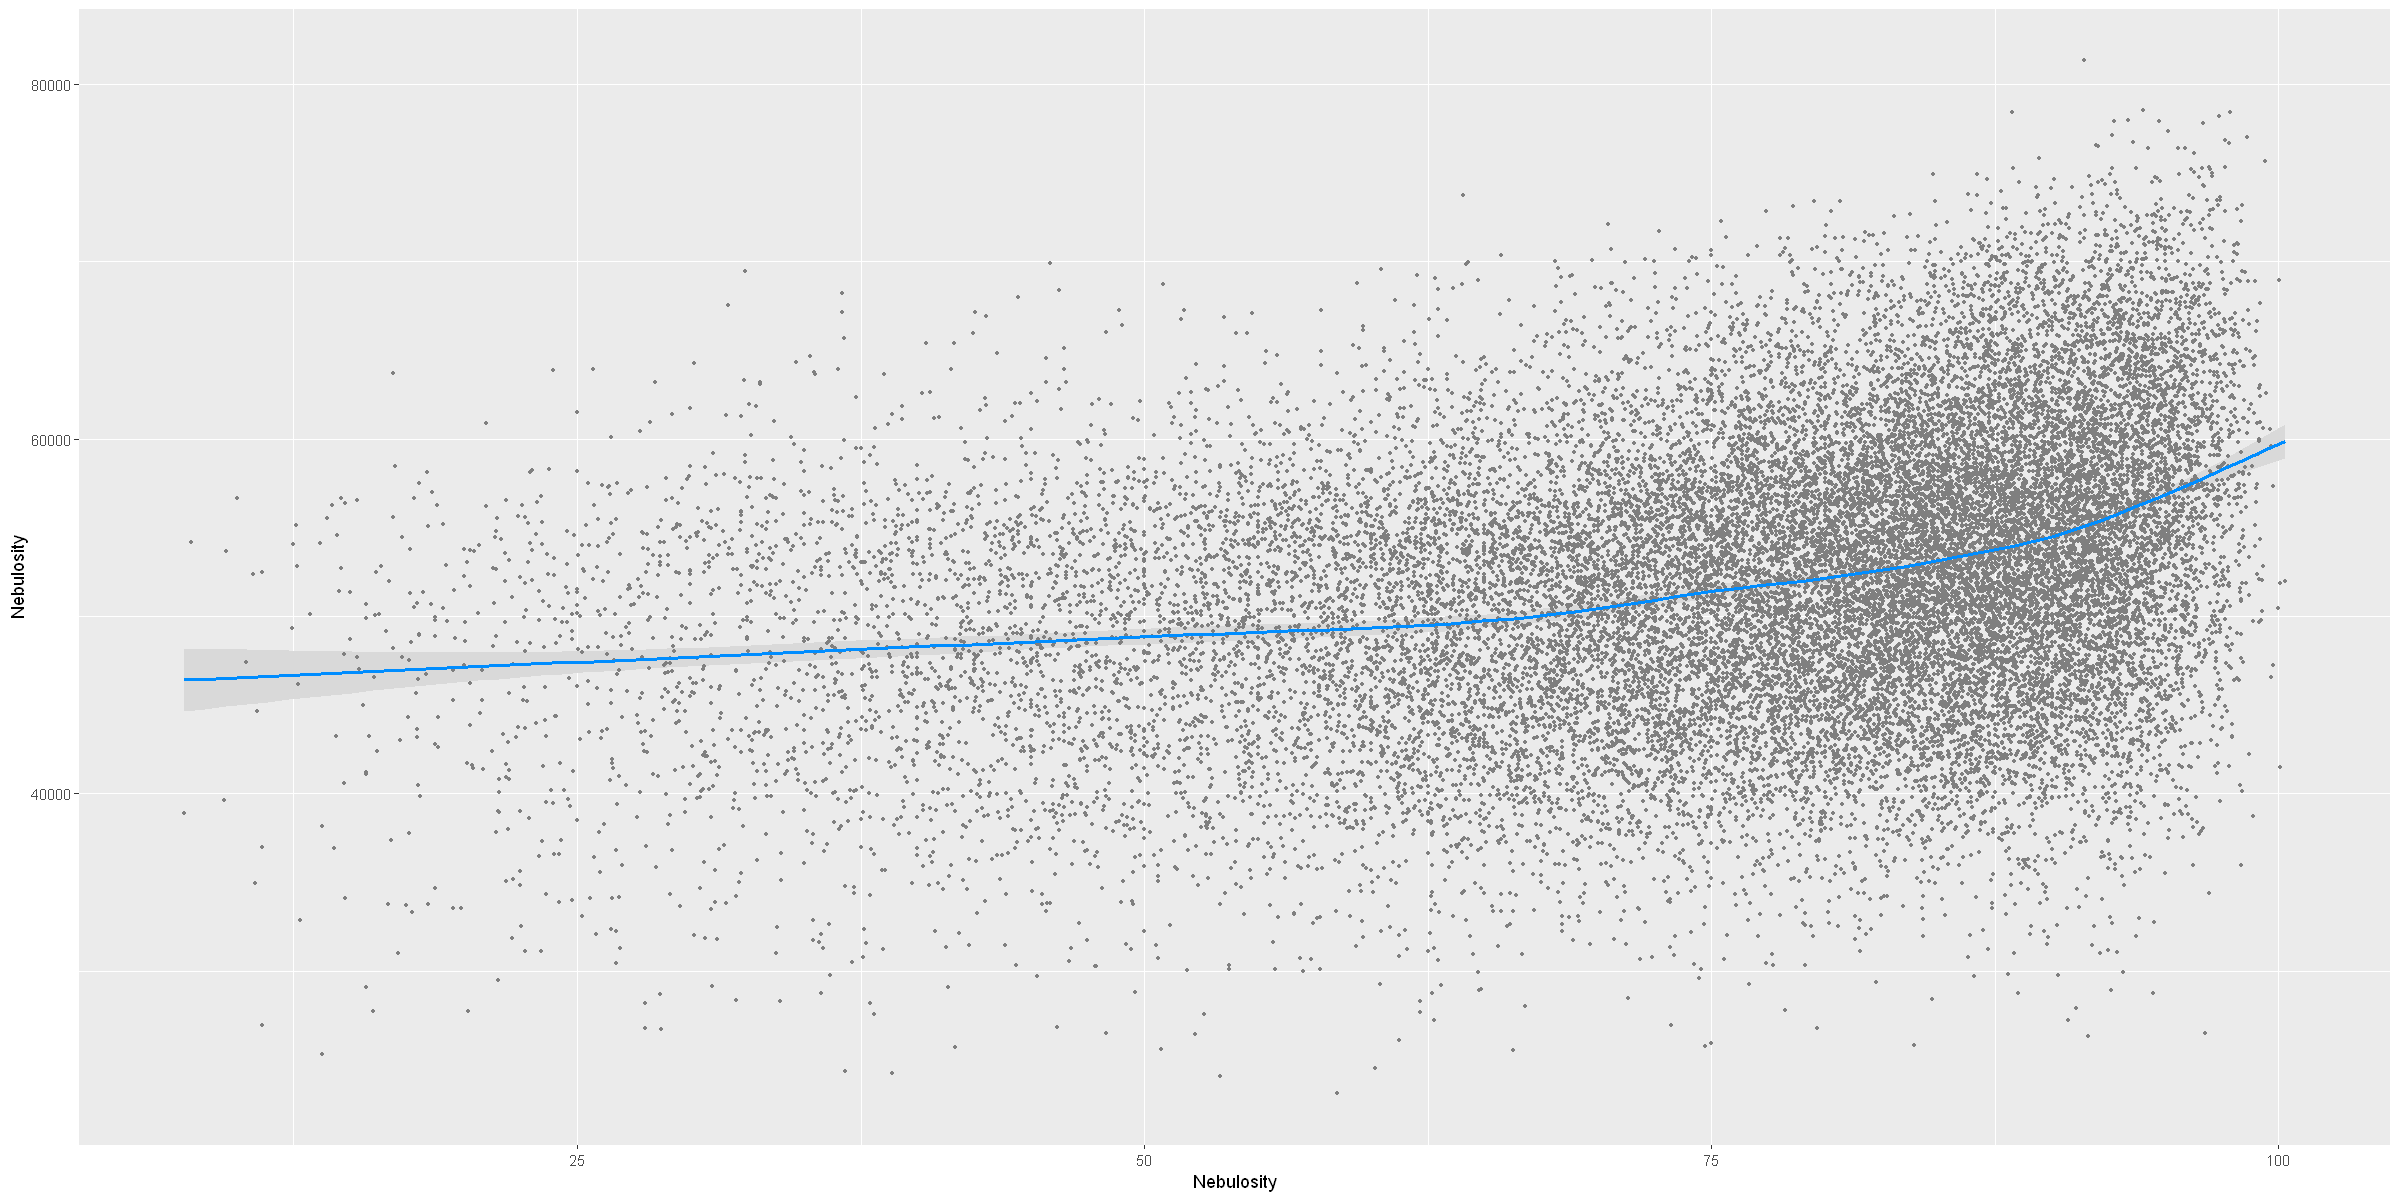

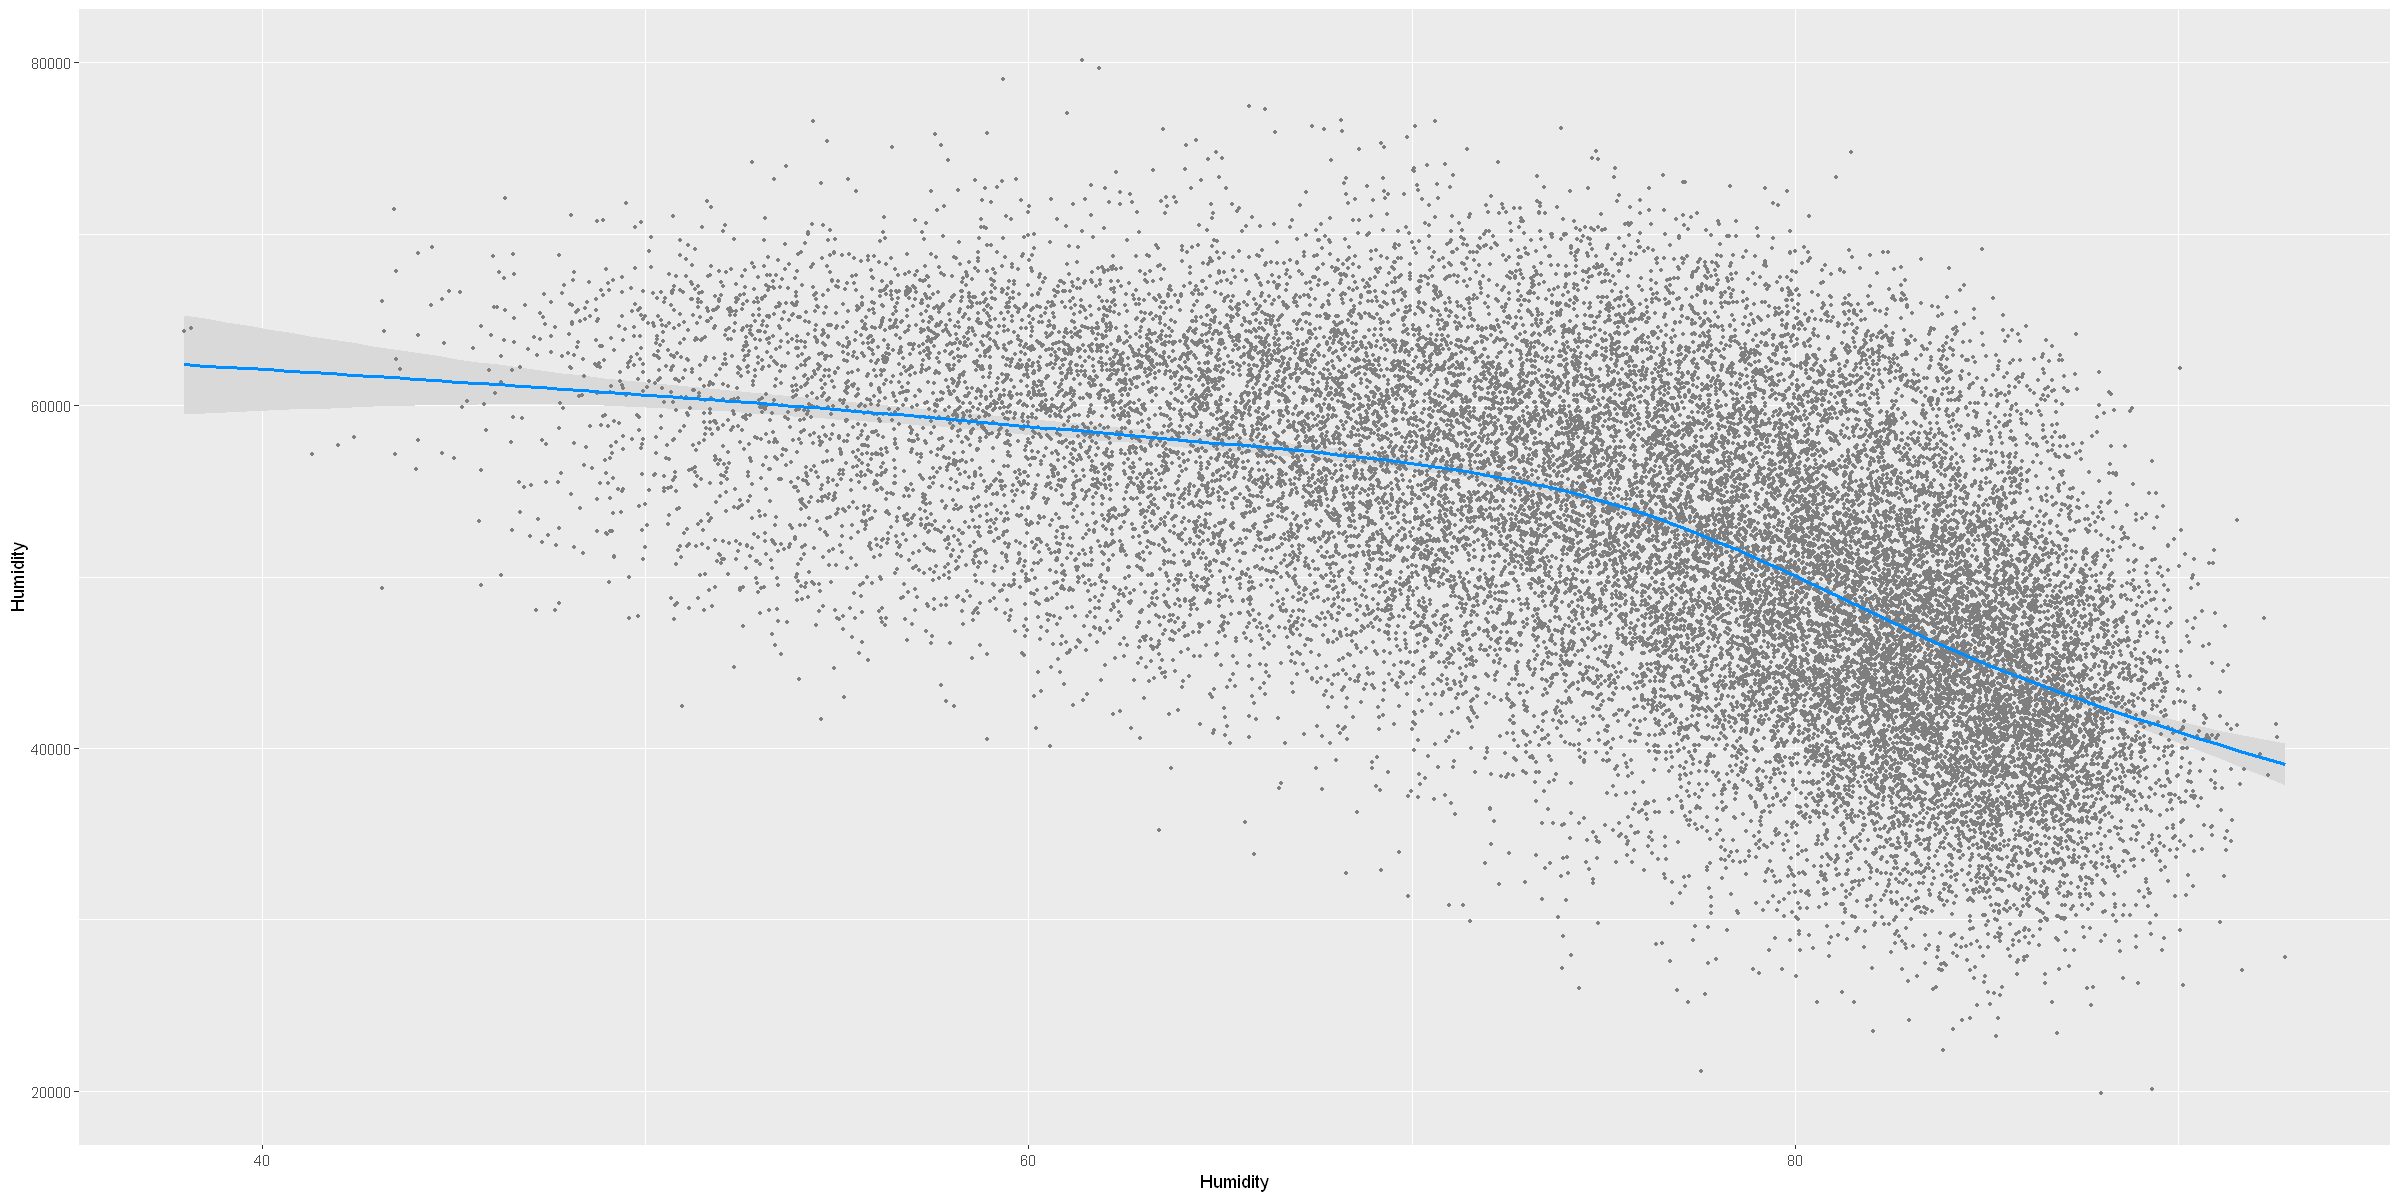

In [86]:
#Représentation graphique du modèle par variable explicative
options(repr.plot.width=20, repr.plot.height=10)
visreg(mod_gam1, "Temperature", gg=TRUE, ylab="Temperature")
visreg(mod_gam1, "Nebulosity", gg=TRUE, ylab="Nebulosity")
visreg(mod_gam1, "Humidity", gg=TRUE, ylab="Humidity")

In [87]:
#Prediction
fits = predict(mod_gam1, newdata=data_test, type='response', se=T)
predicts = data.frame(data_test, fits) %>% mutate(lower= fit-1.96*se.fit, upper = fit + 1.96*se.fit)

In [88]:
#Comparaison Prédiction - Benchmark
predicts <- subset(predicts, select = c("Date", "Time", "fit", "se.fit", "lower", "upper"))
comparison_mod_gam1 = left_join(predicts,benchmark,c("Date","Time"))

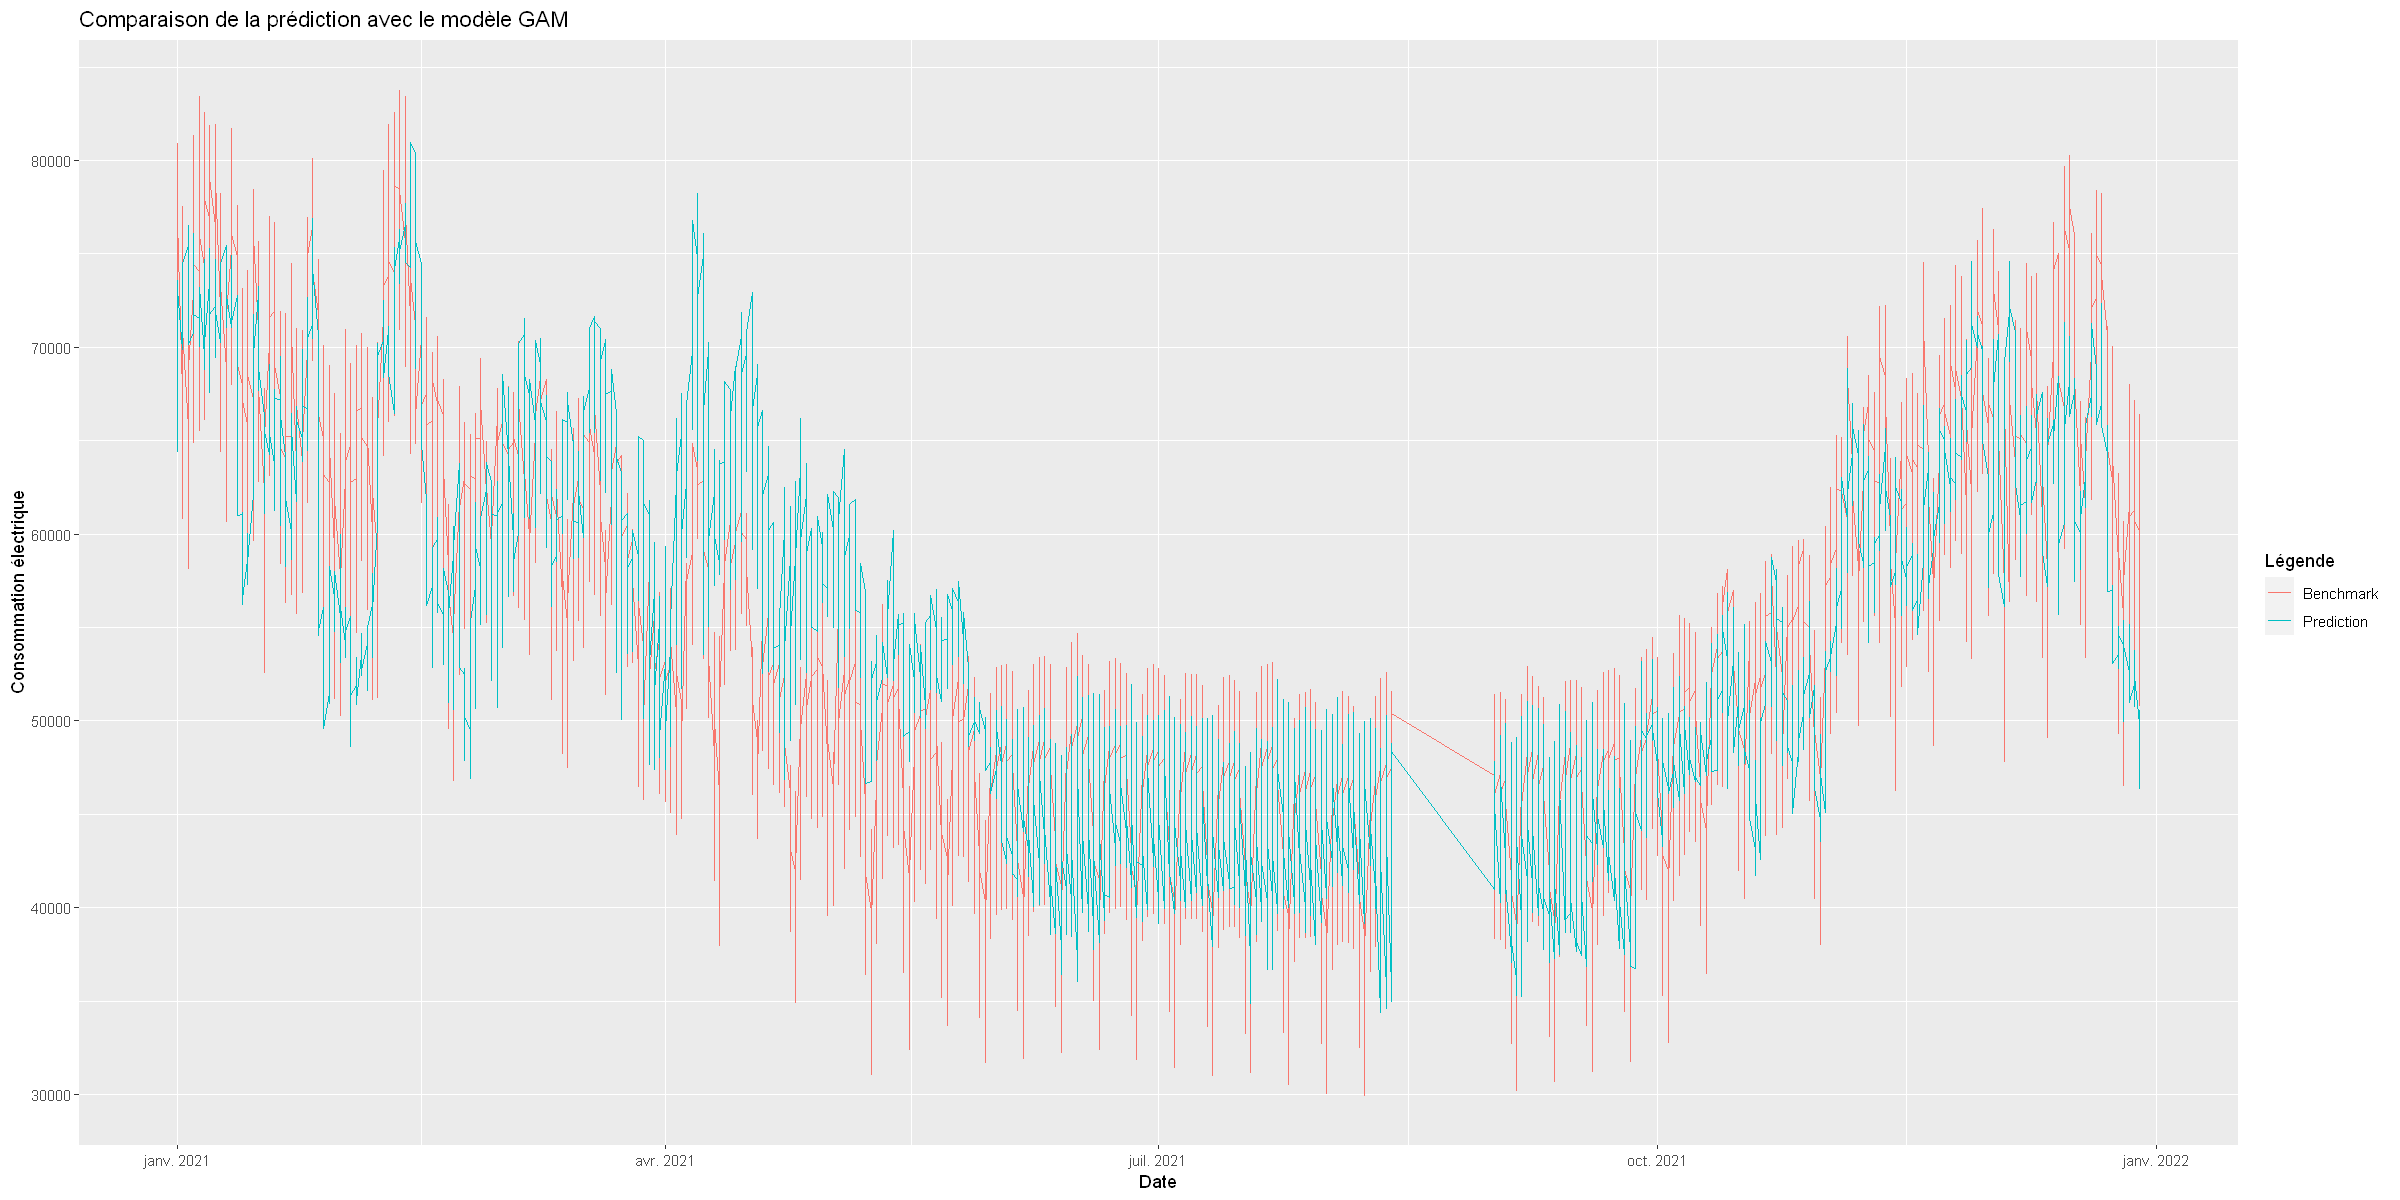

In [89]:
#Représentation graphique Prédiction vs Benchmark
ggplot(comparison_mod_gam1, aes(x=Date, y=Consumption, group = 1, color = 'Benchmark')) + 
    geom_line() +
    geom_line(aes(x=Date, y=fit, colour = 'Prediction')) +
    labs(colour = "Légende") +
    labs(title = "Comparaison de la prédiction avec le modèle GAM") +
    ylab("Consommation électrique")

In [90]:
#Validation du modèle
AIC(mod_gam1); summary(mod_gam1)$sp.criterion; summary(mod_gam1)$r.sq

[1] 544071.6

GCV.Cp 
57093323

[1] 0.6007133

In [91]:
#Calcul MAPE
mean(abs((comparison_mod_gam1$Consumption-comparison_mod_gam1$fit)/comparison_mod_gam1$Consumption)) * 100

[1] 10.47783

In [92]:
#Comparaison modèles
anova(mod_lm1, mod_gam1, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26282.00,1.804857e+12,NA,NA,NA
2,26259.04,1.498104e+12,22.96381,306752545818,0


##### 2ème exemple: intégration de la saisonnalité annuelle

In [98]:
data_train$Month <- as.integer(data_train$Month)
data_test$Month <- as.integer(data_test$Month)

In [21]:
mod_lm2 <- lm(Consumption ~ Temperature + Humidity + Nebulosity + Month, data=data_train)
summary(mod_lm2)


Call:
lm(formula = Consumption ~ Temperature + Humidity + Nebulosity + 
    Month, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-28095.5  -5885.3    -38.9   5838.3  26570.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 129087.959    669.678  192.76  < 2e-16 ***
Temperature  -2223.087     14.563 -152.65  < 2e-16 ***
Humidity      -700.936      7.418  -94.49  < 2e-16 ***
Nebulosity     137.414      3.415   40.24  < 2e-16 ***
Month           65.677     15.940    4.12 3.79e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8284 on 26281 degrees of freedom
Multiple R-squared:  0.5197,	Adjusted R-squared:  0.5196 
F-statistic:  7108 on 4 and 26281 DF,  p-value: < 2.2e-16


Toutes les variables explicatives sont significatives.

In [27]:
#Modèle GAM
mod_gam2 <- gam(Consumption ~ s(Temperature, bs="cr", k=12) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=12) + s(Month, bs="cc",k=6), data=data_train)
summary(mod_gam2)
#Varier les paramètres de lissage ne change pas les résultats...


Family: gaussian 
Link function: identity 

Formula:
Consumption ~ s(Temperature, bs = "cr", k = 12) + s(Humidity, 
    bs = "cr", k = 12) + s(Nebulosity, bs = "cr", k = 12) + s(Month, 
    bs = "cc", k = 6)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 54075.36      38.09    1420   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df       F p-value    
s(Temperature) 7.047  8.301  697.95  <2e-16 ***
s(Humidity)    6.404  7.734  807.82  <2e-16 ***
s(Nebulosity)  6.844  8.021   80.48  <2e-16 ***
s(Month)       3.991  4.000 3268.97  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.733   Deviance explained = 73.3%
GCV = 3.8165e+07  Scale est. = 3.8129e+07  n = 26286

Toutes les variables explicatives paramétriques et non-linéaires sont significatives au seuil de 1%.


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 14 iterations.
The RMS GCV score gradient at convergence was 6.957204 .
The Hessian was positive definite.
Model rank =  38 / 38 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'   edf k-index p-value   
s(Temperature) 11.00  7.05    1.01   0.755   
s(Humidity)    11.00  6.40    1.00   0.360   
s(Nebulosity)  11.00  6.84    0.99   0.120   
s(Month)        4.00  3.99    0.97   0.005 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 38100097     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 38100097     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 38100097     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Month, k = 12)

Estimated degrees of freedom:
10.9  total = 11.86 

GCV score: 37182790     

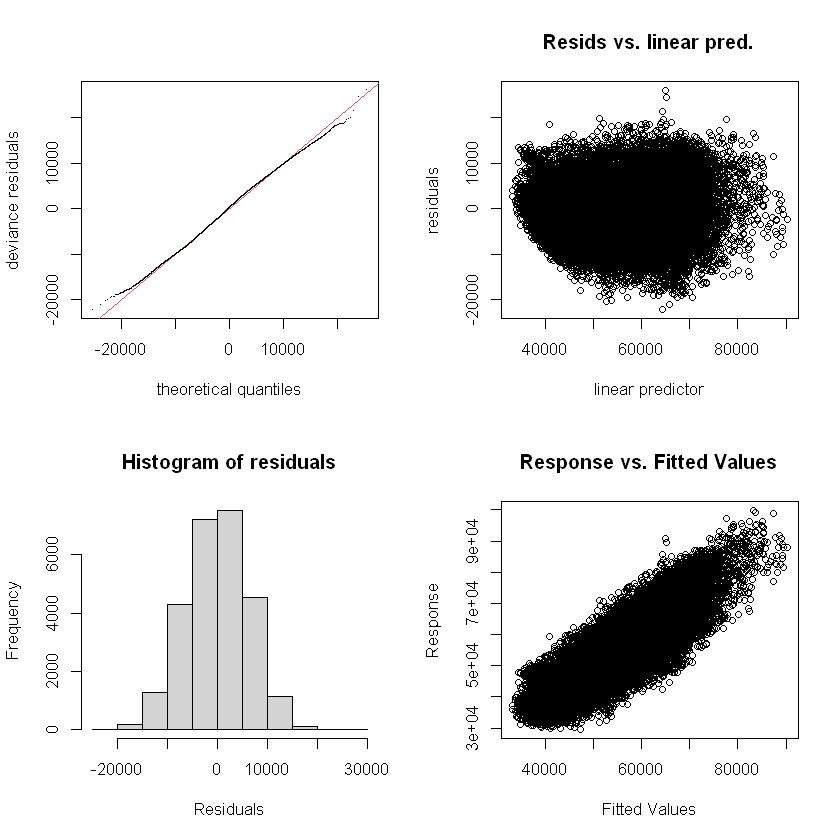

In [29]:
#Vérification GAM pour savoir si le k a bien été choisi
gam.check(mod_gam2) #k trop petit pour la variable Month
gam(residuals(mod_gam2)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam2)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam2)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam2)~s(Month,k=12),gamma=1.4,data=data_train) ## k trop petit


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 9 iterations.
The RMS GCV score gradient at convergence was 24.23172 .
The Hessian was positive definite.
Model rank =  44 / 44 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'   edf k-index p-value
s(Temperature) 11.00  7.05    0.99    0.18
s(Humidity)    11.00  6.44    0.98    0.12
s(Nebulosity)  11.00  7.19    1.00    0.59
s(Month)       10.00  9.88    1.01    0.60



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 37364306     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 37364306     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 37364306     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam2) ~ s(Month, k = 12)

Estimated degrees of freedom:
7.39  total = 8.39 

GCV score: 37162493     

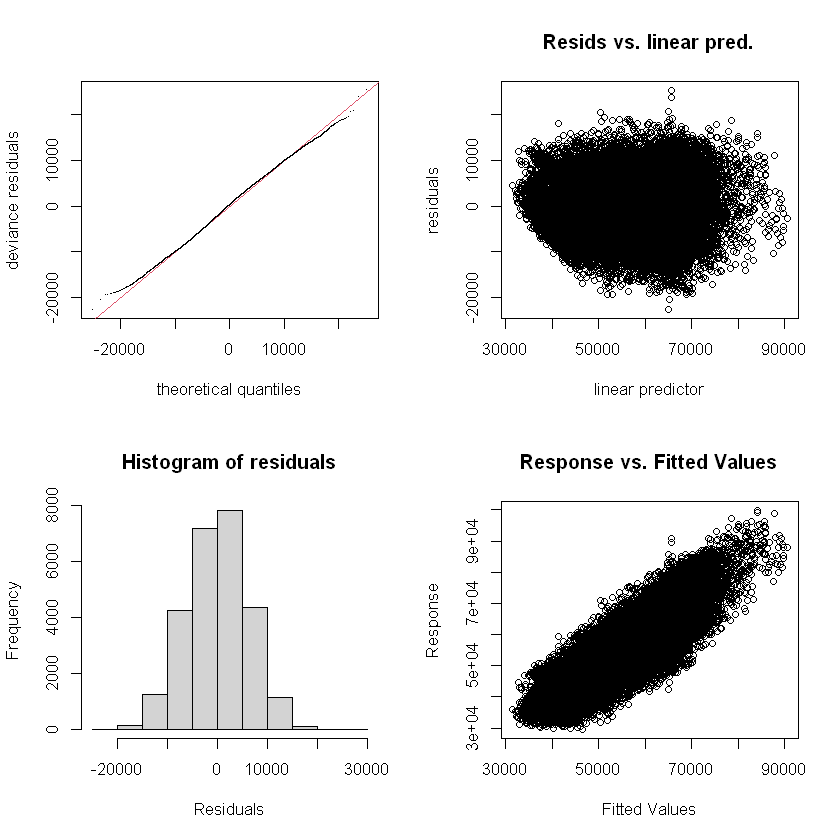

In [32]:
#Changement k pour la variable Month
mod_gam2 <- gam(Consumption ~ s(Temperature, bs="cr", k=12) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=12) + s(Month, bs="cc",k=12), data=data_train)
gam.check(mod_gam2) #ok
gam(residuals(mod_gam2)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam2)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam2)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam2)~s(Month,k=12),gamma=1.4,data=data_train) ## ok
#=> nombre de noeuds maximal pour Month

In [36]:
#Prediction
fits = predict(mod_gam2, newdata=data_test, type='response', se=T)
predicts = data.frame(data_test, fits) %>% mutate(lower= fit-1.96*se.fit, upper = fit + 1.96*se.fit)
#Comparaison Prédiction - Benchmark
predicts <- subset(predicts, select = c("Date", "Time", "fit", "se.fit", "lower", "upper"))
comparison_mod_gam2 = left_join(predicts,benchmark,c("Date","Time"))
#Calcul MAPE
mean(abs((comparison_mod_gam2$Consumption-comparison_mod_gam2$fit)/comparison_mod_gam2$Consumption)) * 100

[1] 7.651088

Bien mieux que le 1er modèle !

##### 3ème exemple: intégration de la saisonnalité mensuelle et de la saisonnalité hebdomadaire

In [99]:
data_train$Day <- as.integer(data_train$Day)
data_test$Day <- as.integer(data_test$Day)

#Définition Day_number dans les Statistiques Descriptives
data_train <- data_train %>%
  mutate(Day_number = case_when(
    data_train$Weekday == "lundi" ~ 1,
    data_train$Weekday == "mardi" ~ 2,
    data_train$Weekday == "mercredi" ~ 3,
    data_train$Weekday == "jeudi" ~ 4,
    data_train$Weekday == "vendredi" ~ 5,
    data_train$Weekday == "samedi" ~ 6,
    data_train$Weekday == "dimanche" ~ 7,
    ))
data_test <- data_test %>%
  mutate(Day_number = case_when(
    data_test$Weekday == "lundi" ~ 1,
    data_test$Weekday == "mardi" ~ 2,
    data_test$Weekday == "mercredi" ~ 3,
    data_test$Weekday == "jeudi" ~ 4,
    data_test$Weekday == "vendredi" ~ 5,
    data_test$Weekday == "samedi" ~ 6,
    data_test$Weekday == "dimanche" ~ 7,
    ))

data_train$Day_number <- as.integer(data_train$Day_number)
data_test$Day_number <- as.integer(data_test$Day_number)

In [22]:
mod_lm3 <- lm(Consumption ~ Temperature + Humidity + Nebulosity + Month + Day + Day_number, data=data_train)
summary(mod_lm3)


Call:
lm(formula = Consumption ~ Temperature + Humidity + Nebulosity + 
    Month + Day + Day_number, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-28565.5  -5655.6     28.1   5691.1  26623.3 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 132845.147    658.157  201.844  < 2e-16 ***
Temperature  -2213.392     14.077 -157.233  < 2e-16 ***
Humidity      -696.941      7.170  -97.206  < 2e-16 ***
Nebulosity     139.173      3.300   42.170  < 2e-16 ***
Month           62.062     15.405    4.029 5.63e-05 ***
Day             -3.475      5.612   -0.619    0.536    
Day_number   -1064.702     24.694  -43.115  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8006 on 26279 degrees of freedom
Multiple R-squared:  0.5514,	Adjusted R-squared:  0.5513 
F-statistic:  5384 on 6 and 26279 DF,  p-value: < 2.2e-16


Toutes les variables explicatives sont significatives, sauf la variable explicative Day


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 11 iterations.
The RMS GCV score gradient at convergence was 6.459038 .
The Hessian was positive definite.
Model rank =  55 / 55 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'   edf k-index p-value
s(Temperature) 11.00  7.73    1.02    0.90
s(Humidity)    11.00  6.27    1.02    0.90
s(Nebulosity)  11.00  7.71    1.00    0.47
s(Month)       10.00  9.91    0.99    0.29
s(Day)          5.00  4.95    1.01    0.85
s(Day_number)   6.00  5.97    0.99    0.26



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam3) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 28303568     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam3) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 28303568     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam3) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 28303568     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam3) ~ s(Month, k = 12)

Estimated degrees of freedom:
7.81  total = 8.81 

GCV score: 28111333     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam3) ~ s(Day, k = 6)

Estimated degrees of freedom:
1  total = 2 

GCV score: 28303568     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam3) ~ s(Day_number, k = 7)

Estimated degrees of freedom:
1  total = 2 

GCV score: 28303568     

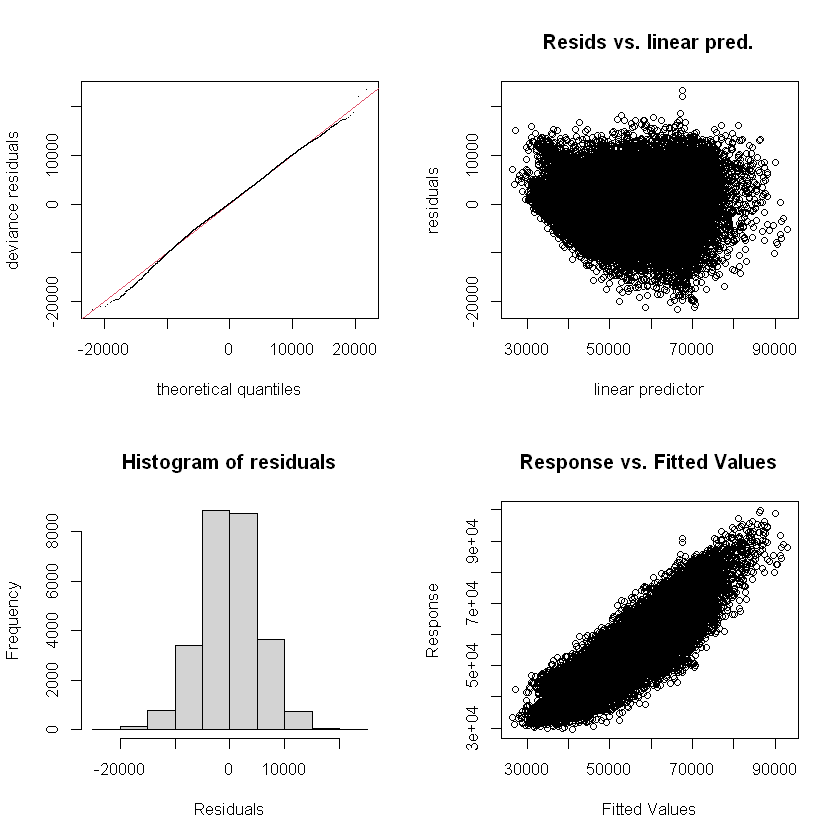

In [118]:
mod_gam3 <- gam(Consumption ~ s(Temperature, bs="cr", k=12) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=12) + s(Month, bs="cc",k=12) + s(Day, bs="cr",k=6) + s(Day_number, bs="cr",k=7), data=data_train)
gam.check(mod_gam3)
#=>maximum knots
gam(residuals(mod_gam3)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam3)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam3)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam3)~s(Month,k=12),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam3)~s(Day,k=6),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam3)~s(Day_number,k=7),gamma=1.4,data=data_train) ## ok

In [119]:
#Prediction
fits = predict(mod_gam3, newdata=data_test, type='response', se=T)
predicts = data.frame(data_test, fits) %>% mutate(lower= fit-1.96*se.fit, upper = fit + 1.96*se.fit)
#Comparaison Prédiction - Benchmark
predicts <- subset(predicts, select = c("Date", "Time", "fit", "se.fit", "lower", "upper"))
comparison_mod_gam3 = left_join(predicts,benchmark,c("Date","Time"))
#Calcul MAPE
mean(abs((comparison_mod_gam3$Consumption-comparison_mod_gam3$fit)/comparison_mod_gam3$Consumption)) * 100

[1] 6.055582

Encore mieux ! Mais on pourrait enlever la saisonnalité mensuelle (Day)...

##### 4ème exemple: intégration de la saisonnalité journalière

In [100]:
#Création d'une varible Time en nombre entier
data_train$Time_number <- as.integer(substr(data_train$Time,1,2))
data_test$Time_number <- as.integer(substr(data_test$Time,1,2))

In [102]:
#Régression linéaire (sans Day)
mod_lm4 <- lm(Consumption ~ Temperature + Humidity + Nebulosity + Month + Day_number + Time_number, data=data_train)
summary(mod_lm4)


Call:
lm(formula = Consumption ~ Temperature + Humidity + Nebulosity + 
    Month + Day_number + Time_number, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-28624.7  -5487.2     20.5   5481.6  26678.6 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 122053.694    700.373  174.269   <2e-16 ***
Temperature  -2182.324     13.753 -158.680   <2e-16 ***
Humidity      -575.871      7.727  -74.525   <2e-16 ***
Nebulosity     116.884      3.275   35.691   <2e-16 ***
Month           25.397     15.056    1.687   0.0916 .  
Day_number   -1068.167     24.082  -44.356   <2e-16 ***
Time_number    295.076      8.017   36.804   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7808 on 26279 degrees of freedom
Multiple R-squared:  0.5734,	Adjusted R-squared:  0.5733 
F-statistic:  5887 on 6 and 26279 DF,  p-value: < 2.2e-16


Toutes les variables explicatives sont significatives au seuil de 1%, sauf la variable Month qui est significative au seuil de 10%


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 18 iterations.
The RMS GCV score gradient at convergence was 0.6878835 .
The Hessian was positive definite.
Model rank =  57 / 57 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                  k'   edf k-index p-value   
s(Temperature) 11.00  8.90    0.99   0.390   
s(Humidity)    11.00  9.47    1.00   0.595   
s(Nebulosity)  11.00  6.62    1.00   0.395   
s(Month)       10.00  9.97    0.97   0.005 **
s(Day_number)   6.00  5.99    1.02   0.930   
s(Time_number)  7.00  6.99    1.01   0.755   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam4) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 14036434     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam4) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 14036434     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam4) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 14036434     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam4) ~ s(Month, k = 12)

Estimated degrees of freedom:
8.81  total = 9.81 

GCV score: 13859637     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam4) ~ s(Day_number, k = 7)

Estimated degrees of freedom:
1  total = 2 

GCV score: 14036434     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam4) ~ s(Time_number, k = 8)

Estimated degrees of freedom:
1  total = 2 

GCV score: 14036434     

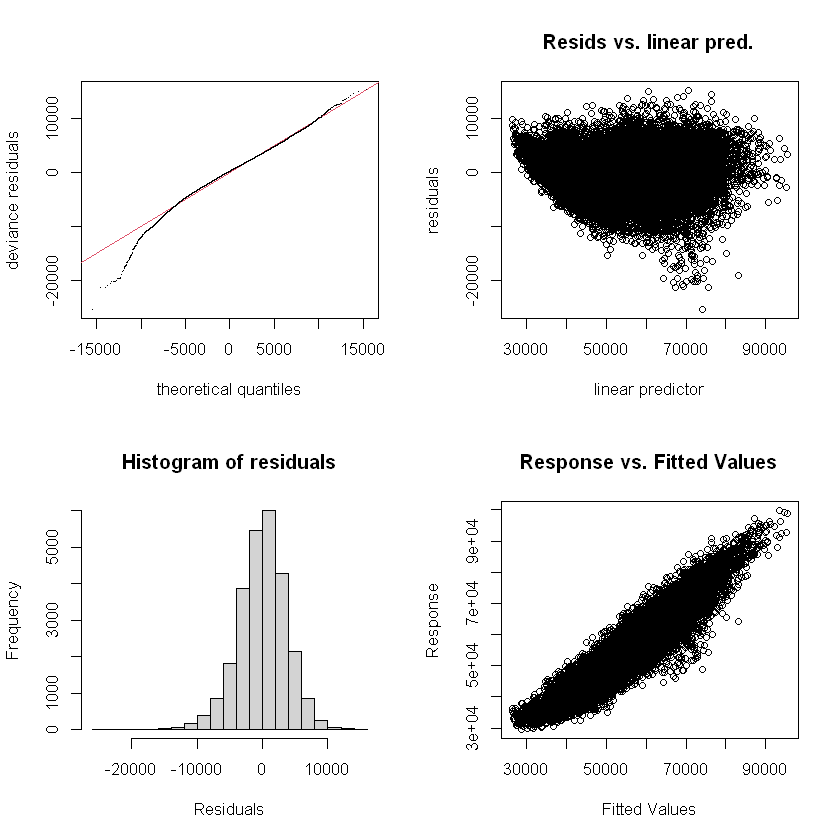

In [125]:
mod_gam4 <- gam(Consumption ~ s(Temperature, bs="cr", k=12) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=12) + s(Month, bs="cc",k=12) + s(Day_number, bs="cr",k=7) + s(Time_number, bs="cr", k=8), data=data_train)
gam.check(mod_gam4)
#=>not good for Month but we have the maximum knots, not possible to increase...
gam(residuals(mod_gam4)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam4)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam4)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam4)~s(Month,k=12),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam4)~s(Day_number,k=7),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam4)~s(Time_number, k=8),gamma=1.4,data=data_train) ## ok

In [126]:
#Prediction
fits = predict(mod_gam4, newdata=data_test, type='response', se=T)
predicts = data.frame(data_test, fits) %>% mutate(lower= fit-1.96*se.fit, upper = fit + 1.96*se.fit)
#Comparaison Prédiction - Benchmark
predicts <- subset(predicts, select = c("Date", "Time", "fit", "se.fit", "lower", "upper"))
comparison_mod_gam4 = left_join(predicts,benchmark,c("Date","Time"))
#Calcul MAPE
mean(abs((comparison_mod_gam4$Consumption-comparison_mod_gam4$fit)/comparison_mod_gam4$Consumption)) * 100

[1] 2.410947

Youpi

##### 5ème exemple: intégration des jours fériés et des vacances

In [134]:
#Création d'une dummy jour férié
data_train <- data_train %>%
  mutate(jour_ferie = case_when(
    data_train$jour_ferie == 0 ~ 0,
    data_train$jour_ferie != 0 ~ 1,
    ))

data_test <- data_test %>%
  mutate(jour_ferie = case_when(
    data_test$jour_ferie == 0 ~ 0,
    data_test$jour_ferie != 0 ~ 1,
    ))

In [138]:
mod_lm5 <- lm(Consumption ~ Temperature + Humidity + Nebulosity + Month + Day_number + Time_number + jour_ferie + Holidays, data=data_train)
summary(mod_lm5)


Call:
lm(formula = Consumption ~ Temperature + Humidity + Nebulosity + 
    Month + Day_number + Time_number + jour_ferie + Holidays, 
    data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-26514.8  -5404.3     38.3   5397.4  25901.4 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 122378.987    689.013  177.615  < 2e-16 ***
Temperature  -2164.211     13.653 -158.512  < 2e-16 ***
Humidity      -574.823      7.600  -75.634  < 2e-16 ***
Nebulosity     116.965      3.228   36.231  < 2e-16 ***
Month           22.474     14.830    1.515     0.13    
Day_number   -1092.454     23.771  -45.957  < 2e-16 ***
Time_number    292.576      7.889   37.088  < 2e-16 ***
jour_ferie   -7829.590    278.673  -28.096  < 2e-16 ***
Holidays      -774.371     99.556   -7.778 7.62e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7678 on 26277 degrees of freedom
Multiple R-squared:  0.5875,	Adjuste

Toutes les variables explicatives sont significatives, à l'exception de la variable Month, qui cette fois n'est plus significative à 10%...


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 16 iterations.
The RMS GCV score gradient at convergence was 0.5243862 .
The Hessian was positive definite.
Model rank =  59 / 59 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                   k'    edf k-index p-value    
s(Temperature) 11.000  8.833    1.01   0.610    
s(Humidity)    11.000  6.174    1.01   0.705    
s(Nebulosity)  11.000  7.792    1.04   1.000    
s(Month)       10.000  9.963    0.95  <2e-16 ***
s(Day_number)   6.000  5.986    0.97   0.015 *  
s(Time_number)  7.000  6.993    0.98   0.080 .  
s(jour_ferie)   1.000  0.999    0.99   0.225    
s(Holidays)     1.000  0.997    0.96   0.005 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam5) ~ s(Temperature, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 12670806     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam5) ~ s(Humidity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 12670806     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam5) ~ s(Nebulosity, k = 40)

Estimated degrees of freedom:
1  total = 2 

GCV score: 12670806     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam5) ~ s(Month, k = 12)

Estimated degrees of freedom:
8.61  total = 9.61 

GCV score: 12529942     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam5) ~ s(Day_number, k = 7)

Estimated degrees of freedom:
1  total = 2 

GCV score: 12670806     


Family: gaussian 
Link function: identity 

Formula:
residuals(mod_gam5) ~ s(Time_number, k = 8)

Estimated degrees of freedom:
1  total = 2 

GCV score: 12670806     

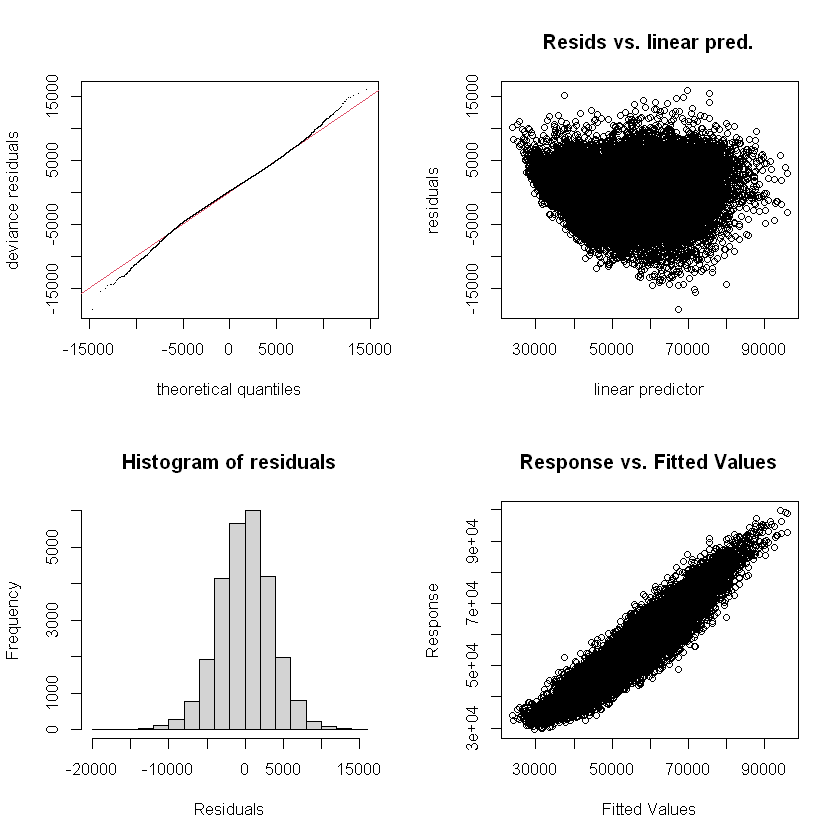

In [153]:
mod_gam5 <- gam(Consumption ~ s(Temperature, bs="cr", k=12) + s(Humidity, bs="cr", k=12) + s(Nebulosity, bs="cr", k=12) + s(Month, bs="cc",k=12) + s(Day_number, bs="cr",k=7) + s(Time_number, bs="cr", k=8) + s(jour_ferie, bs="re") + s(Holidays, bs="re"), data=data_train)
gam.check(mod_gam5)
#Option re to integrate jour_ferie and Holidays
gam(residuals(mod_gam5)~s(Temperature,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam5)~s(Humidity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam5)~s(Nebulosity,k=40),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam5)~s(Month,k=12),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam5)~s(Day_number,k=7),gamma=1.4,data=data_train) ## ok
gam(residuals(mod_gam5)~s(Time_number, k=8),gamma=1.4,data=data_train) ## ok

In [154]:
#Prediction
fits = predict(mod_gam5, newdata=data_test, type='response', se=T)
predicts = data.frame(data_test, fits) %>% mutate(lower= fit-1.96*se.fit, upper = fit + 1.96*se.fit)
#Comparaison Prédiction - Benchmark
predicts <- subset(predicts, select = c("Date", "Time", "fit", "se.fit", "lower", "upper"))
comparison_mod_gam5 = left_join(predicts,benchmark,c("Date","Time"))
#Calcul MAPE
mean(abs((comparison_mod_gam5$Consumption-comparison_mod_gam5$fit)/comparison_mod_gam5$Consumption)) * 100

[1] 2.741692

Intégrer les jours fériés et les vacances ne réduit pas l'erreur de mesure...